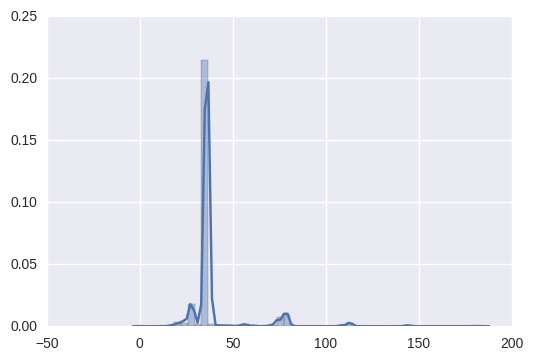

In [12]:
import seaborn as sns
import numpy as np
import os
import sys
%matplotlib inline

l = []

x = np.random.normal(size=100)
#sns.distplot(x)

with open('/projects/biocompan/201609_ESPCI_Ibanez_DemultiplexHepCap_B2016/Run_L83/170214/Rotten/failed_tooShortR1.lengths.tsv', 'r') as lengths_file:
    for line in lengths_file:
        l.append(int(line.rstrip()))

sns.distplot(l)

In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def draw_subplot(df, x, y, n, vmin, vmax, field, title):
    specific_data = pd.pivot_table(df, values=field, index=["Row"], columns=["Column"])
    plt.subplot(x, y, n)
    plt.title(title, fontsize=20)
    ax = sns.heatmap(specific_data, vmin=vmin, vmax=vmax)
    ax.set(xlabel="Row (Index2)", ylabel="Col (Index1)")

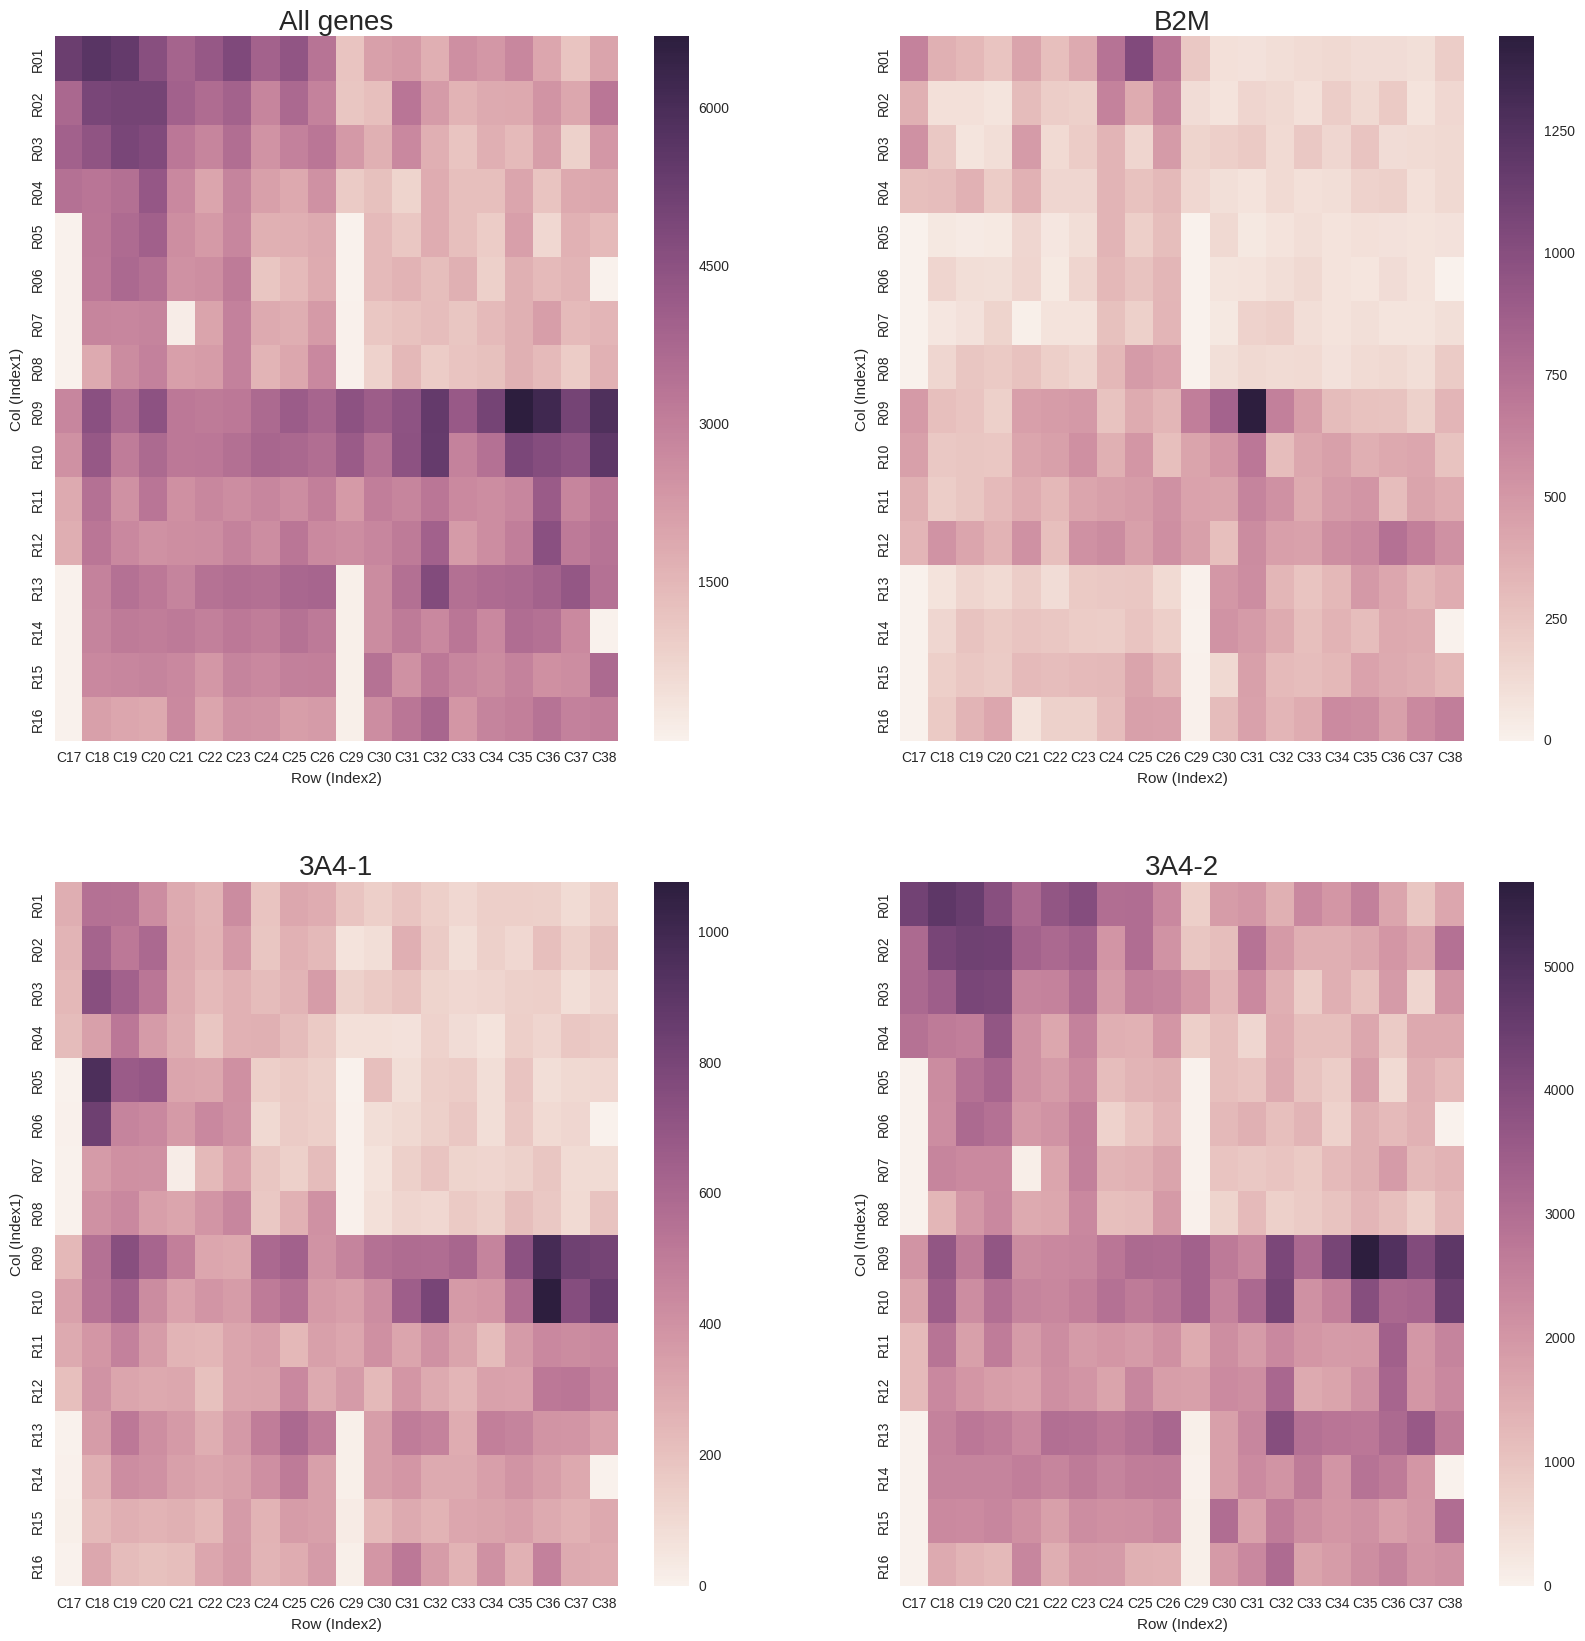

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing the data
data = pd.read_csv("/projects/biocompan/201609_ESPCI_Ibanez_DemultiplexHepCap_B2016/Run_L106/170216/L106.tsv",
                   sep="\t", header=0)

# Formatting data
data["Total"] = data["UMI count in B2M"] + data["UMI count in 3A4-1"] + data["UMI count in 3A4-2"]

# Drawing the plots
plt.figure(1, figsize=(20, 20))
draw_subplot(data, 2, 2, 1, "Total", "All genes")
draw_subplot(data, 2, 2, 2, "UMI count in B2M", "B2M")
draw_subplot(data, 2, 2, 3, "UMI count in 3A4-1", "3A4-1")
draw_subplot(data, 2, 2, 4, "UMI count in 3A4-2", "3A4-2")

Set1 - Total 6369472
Set2 - Total 4842162
Set1 - B2M 816228
Set2 - B2M 671099
Set1 - 3A4-1 796187
Set2 - 3A4-1 692919
Set1 - 3A4-2 4757057
Set2 - 3A4-2 3478144
17940 12565
5444 4620
3629 2799
13964 10037
count    960.000000
mean            inf
std             NaN
min        0.101403
25%        0.561521
50%        0.985783
75%        1.861057
max             inf
Name: 3A4-1_ctrl, dtype: float64 count    992.000000
mean            inf
std             NaN
min        0.131685
25%        0.573830
50%        1.165422
75%        2.907909
max             inf
Name: 3A4-1_ctrl, dtype: float64
count    960.000000
mean            inf
std             NaN
min        0.965369
25%        4.002728
50%        6.150949
75%       10.417712
max             inf
Name: 3A4-2_ctrl, dtype: float64 count    992.000000
mean            inf
std             NaN
min        0.445310
25%        2.793410
50%        6.760990
75%       16.485692
max             inf
Name: 3A4-2_ctrl, dtype: float64


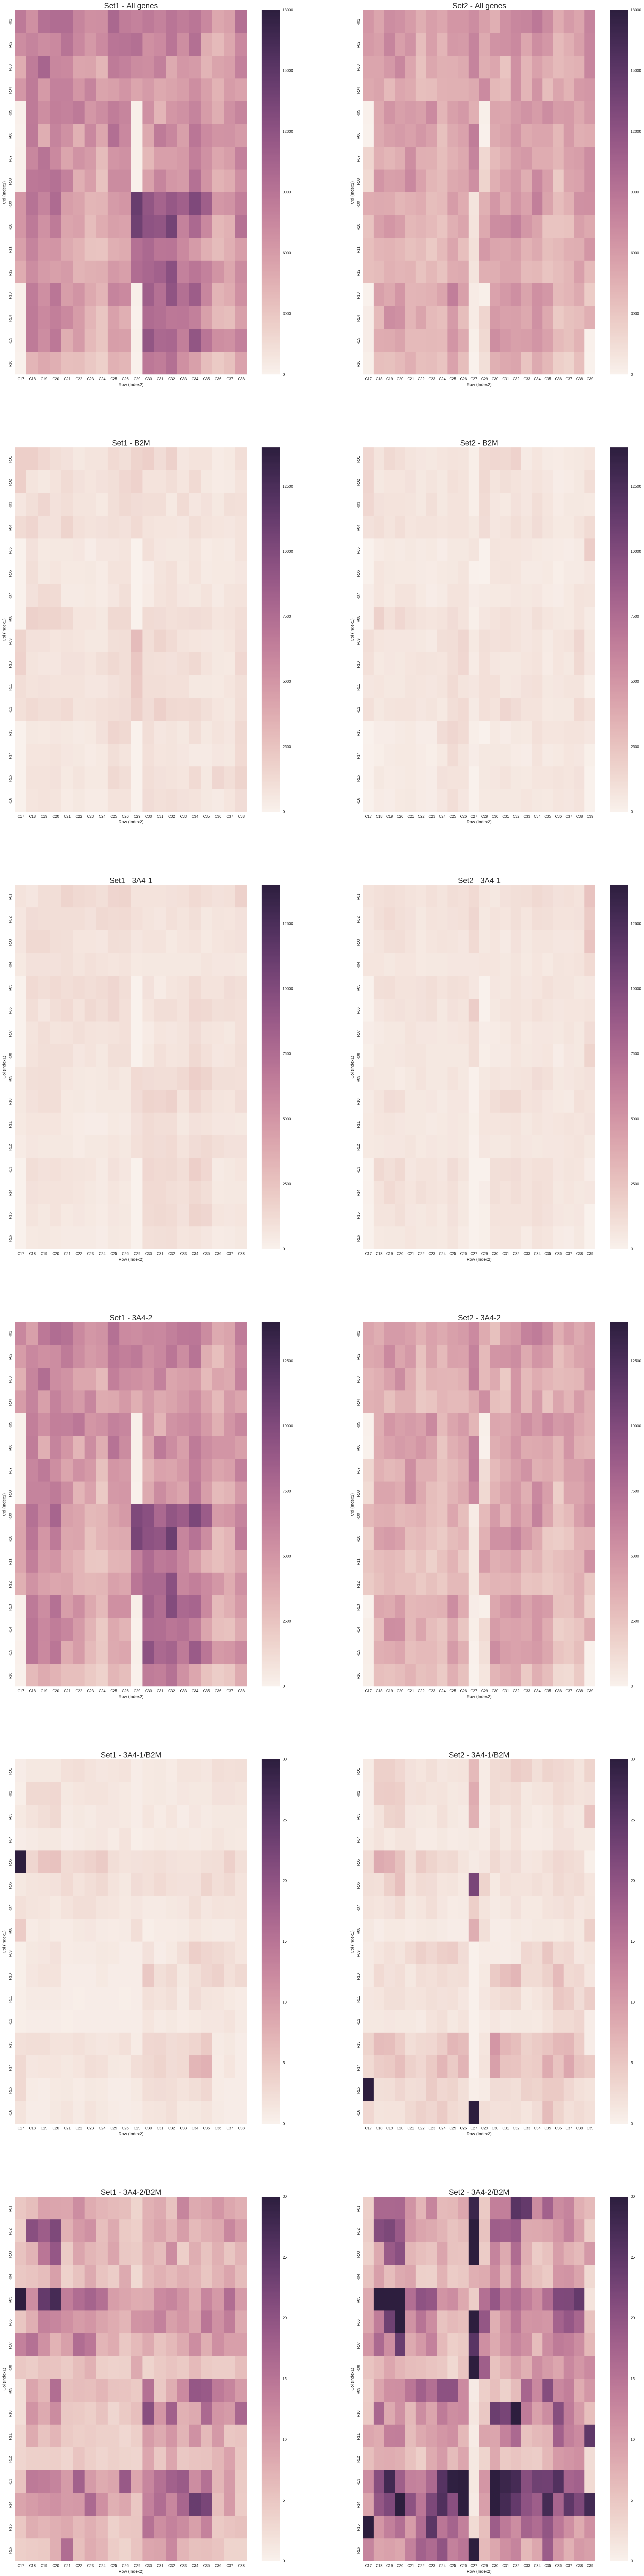

In [135]:
import pandas as pd
import sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing data
data = pd.read_csv("/projects/biocompan/201609_ESPCI_Ibanez_DemultiplexHepCap_B2016/Run_L174/170515/L174.tsv",
                   sep="\t", header=0)

# Partitionning set1 and set2
cols1 = ["C17", "C18", "C19", "C20", "C21", "C22", "C23", "C24", "C25", "C26"]
cols1bis = ["C17", "C18", "C19", "C20", "C21", "C22", "C23", "C24", "C25", "C26", "C27"]
cols2 = ["C29", "C30", "C31", "C32", "C33", "C34", "C35", "C36", "C37", "C38"]
cols2bis = ["C29", "C30", "C31", "C32", "C33", "C34", "C35", "C36", "C37", "C38", "C39"]
rows1 = ["R01", "R02", "R03", "R04", "R05", "R06", "R07", "R08"]
rows2 = ["R09", "R10", "R11", "R12", "R13", "R14", "R15", "R16"]
set1 = data[(data["Plate"].isin(["P41", "P44"]) & data["Column"].isin(cols1 + cols2) & data["Row"].isin(rows1)) |
           ((data["Plate"] == "P42") & data["Column"].isin(cols1) & data["Row"].isin(rows1)) |
           (data["Plate"].isin(["P42", "P46"]) & data["Column"].isin(cols2) & data["Row"].isin(rows2)) |
           ((data["Plate"] == "P43") & data["Column"].isin(cols1 + cols2) & data["Row"].isin(rows2)) |
           ((data["Plate"] == "P45") & data["Column"].isin(cols2) & data["Row"].isin(rows1)) |
           (data["Plate"].isin(["P45", "P47"]) & data["Column"].isin(cols1) & data["Row"].isin(rows2))].copy()
set2 = data[(data["Plate"].isin(["P41", "P44"]) & data["Column"].isin(cols1) & data["Row"].isin(rows2)) |
           ((data["Plate"] == "P41") & data["Column"].isin(cols2bis) & data["Row"].isin(rows2)) |
           ((data["Plate"] == "P42") & data["Column"].isin(cols2bis) & data["Row"].isin(rows1)) |
           ((data["Plate"] == "P42") & data["Column"].isin(cols1bis) & data["Row"].isin(rows2)) |
           ((data["Plate"] == "P43") & data["Column"].isin(cols1bis) & data["Row"].isin(rows1)) |
           ((data["Plate"] == "P45") & data["Column"].isin(cols1) & data["Row"].isin(rows1)) |
           (data["Plate"].isin(["P45", "P47"]) & data["Column"].isin(cols2) & data["Row"].isin(rows2)) |
           ((data["Plate"] == "P46") & data["Column"].isin(cols1 + cols2) & data["Row"].isin(rows1)) |
           ((data["Plate"] == "P47") & data["Column"].isin(cols2) & data["Row"].isin(rows1))].copy()

# Detecting inconsistencies
set1_2 = pd.concat([set1, set2])
rats = data.merge(set1_2, on=["Plate", "Column", "Row"], how="left")
#print rats[rats["Row barcode_y"].isnull()][["Plate", "Column", "Row"]][(rats["Plate"] != "P41") & (rats["Column"] != "C39") & (rats["Row"].isin(rows1) == False)]

# Getting the total per row/column
#data["Total"] = data["UMI count in B2M"] + data["UMI count in 3A4-1"] + data["UMI count in 3A4-2"]
set1["Total"] = set1["UMI count in B2M"] + set1["UMI count in 3A4-1"] + set1["UMI count in 3A4-2"]
set2["Total"] = set2["UMI count in B2M"] + set2["UMI count in 3A4-1"] + set2["UMI count in 3A4-2"]
set1["3A4-1_ctrl"] = set1["UMI count in 3A4-1"] / set1["UMI count in B2M"]
set2["3A4-1_ctrl"] = set2["UMI count in 3A4-1"] / set2["UMI count in B2M"]
set1["3A4-2_ctrl"] = set1["UMI count in 3A4-2"] / set1["UMI count in B2M"]
set2["3A4-2_ctrl"] = set2["UMI count in 3A4-2"] / set2["UMI count in B2M"]
print "Set1 - Total", set1["Total"].sum()
print "Set2 - Total", set2["Total"].sum()
print "Set1 - B2M", set1["UMI count in B2M"].sum()
print "Set2 - B2M", set2["UMI count in B2M"].sum()
print "Set1 - 3A4-1", set1["UMI count in 3A4-1"].sum()
print "Set2 - 3A4-1", set2["UMI count in 3A4-1"].sum()
print "Set1 - 3A4-2", set1["UMI count in 3A4-2"].sum()
print "Set2 - 3A4-2", set2["UMI count in 3A4-2"].sum()
print set1["Total"].max(), set2["Total"].max()
print set1["UMI count in B2M"].max(), set2["UMI count in B2M"].max()
print set1["UMI count in 3A4-1"].max(), set2["UMI count in 3A4-1"].max()
print set1["UMI count in 3A4-2"].max(), set2["UMI count in 3A4-2"].max()
print set1["3A4-1_ctrl"].describe(), set2["3A4-1_ctrl"].describe()
print set1["3A4-2_ctrl"].describe(), set2["3A4-2_ctrl"].describe()

# Drawing the plot
plt.figure(1, figsize=(30,120))
x = 6
y = 2
vmin = 0
vmax = 18000
draw_subplot(set1, x, y, 1, vmin, 18000, "Total", "Set1 - All genes")
draw_subplot(set2, x, y, 2, vmin, 18000, "Total", "Set2 - All genes")
draw_subplot(set1, x, y, 3, vmin, 14000, "UMI count in B2M", "Set1 - B2M")
draw_subplot(set2, x, y, 4, vmin, 14000, "UMI count in B2M", "Set2 - B2M")
draw_subplot(set1, x, y, 5, vmin, 14000, "UMI count in 3A4-1", "Set1 - 3A4-1")
draw_subplot(set2, x, y, 6, vmin, 14000, "UMI count in 3A4-1", "Set2 - 3A4-1")
draw_subplot(set1, x, y, 7, vmin, 14000, "UMI count in 3A4-2", "Set1 - 3A4-2")
draw_subplot(set2, x, y, 8, vmin, 14000, "UMI count in 3A4-2", "Set2 - 3A4-2")
draw_subplot(set1, x, y, 9, vmin, 30, "3A4-1_ctrl", "Set1 - 3A4-1/B2M")
draw_subplot(set2, x, y, 10, vmin, 30, "3A4-1_ctrl", "Set2 - 3A4-1/B2M")
draw_subplot(set1, x, y, 11, vmin, 30, "3A4-2_ctrl", "Set1 - 3A4-2/B2M")
draw_subplot(set2, x, y, 12, vmin, 30, "3A4-2_ctrl", "Set2 - 3A4-2/B2M")

In [151]:
import pandas as pd
import sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing data
data = pd.read_csv("/projects/biocompan/201609_ESPCI_Ibanez_DemultiplexHepCap_B2016/Run_L174/170518/L174.tsv",
                   sep="\t", header=0)
print data.shape

# Partitionning set1 and set2
cols1 = ["C17", "C18", "C19", "C20", "C21", "C22", "C23", "C24", "C25", "C26"]
cols1bis = ["C17", "C18", "C19", "C20", "C21", "C22", "C23", "C24", "C25", "C26", "C27"]
cols2 = ["C29", "C30", "C31", "C32", "C33", "C34", "C35", "C36", "C37", "C38"]
cols2bis = ["C29", "C30", "C31", "C32", "C33", "C34", "C35", "C36", "C37", "C38", "C39"]
rows1 = ["R01", "R02", "R03", "R04", "R05", "R06", "R07", "R08"]
rows2 = ["R09", "R10", "R11", "R12", "R13", "R14", "R15", "R16"]
set1 = data[(data["Plate"].isin(["P41", "P44"]) & data["Column"].isin(cols1 + cols2) & data["Row"].isin(rows1)) |
           ((data["Plate"] == "P42") & data["Column"].isin(cols1) & data["Row"].isin(rows1)) |
           (data["Plate"].isin(["P42", "P46"]) & data["Column"].isin(cols2) & data["Row"].isin(rows2)) |
           ((data["Plate"] == "P43") & data["Column"].isin(cols1 + cols2) & data["Row"].isin(rows2)) |
           ((data["Plate"] == "P45") & data["Column"].isin(cols2) & data["Row"].isin(rows1)) |
           (data["Plate"].isin(["P45", "P47"]) & data["Column"].isin(cols1) & data["Row"].isin(rows2))].copy()
set2 = data[(data["Plate"].isin(["P41", "P44"]) & data["Column"].isin(cols1) & data["Row"].isin(rows2)) |
           ((data["Plate"] == "P41") & data["Column"].isin(cols2bis) & data["Row"].isin(rows2)) |
           ((data["Plate"] == "P42") & data["Column"].isin(cols2bis) & data["Row"].isin(rows1)) |
           ((data["Plate"] == "P42") & data["Column"].isin(cols1bis) & data["Row"].isin(rows2)) |
           ((data["Plate"] == "P43") & data["Column"].isin(cols1bis) & data["Row"].isin(rows1)) |
           ((data["Plate"] == "P45") & data["Column"].isin(cols1) & data["Row"].isin(rows1)) |
           (data["Plate"].isin(["P45", "P47"]) & data["Column"].isin(cols2) & data["Row"].isin(rows2)) |
           ((data["Plate"] == "P46") & data["Column"].isin(cols1 + cols2) & data["Row"].isin(rows1)) |
           ((data["Plate"] == "P47") & data["Column"].isin(cols2) & data["Row"].isin(rows1))].copy()
print set1.shape
print set2.shape

# Detecting inconsistencies
set1_2 = pd.concat([set1, set2])
rats = data.merge(set1_2, on=["Plate", "Column", "Row"], how="left")
print rats[["Plate", "Column", "Row", "UMI count in B2M_x", "UMI count in 3A4-1_x", "UMI count in 3A4-2_y"]].head(2)
residues = rats[rats["Row barcode_y"].isnull()][["Plate", "Column", "Row", "UMI count in B2M_x", "UMI count in 3A4-1_x", "UMI count in 3A4-2_y"]][(rats["Plate"] != "P41") & (rats["Column"] != "C39") & (rats["Row"].isin(rows1) == False)]
print residues["UMI count in B2M_x"].sum()
print residues["UMI count in 3A4-1_x"].sum()
print residues["UMI count in 3A4-2_y"]

(2304, 12)
(960, 12)
(992, 12)
  Plate Column  Row  UMI count in B2M_x  UMI count in 3A4-1_x  \
0   P41    C22  R01                 267                   272   
1   P41    C22  R16                  79                   779   

   UMI count in 3A4-2_y  
0                4562.0  
1                3389.0  
0
0
769    NaN
776    NaN
778    NaN
779    NaN
780    NaN
781    NaN
782    NaN
783    NaN
1137   NaN
1144   NaN
1146   NaN
1147   NaN
1148   NaN
1149   NaN
1150   NaN
1151   NaN
1153   NaN
1160   NaN
1162   NaN
1163   NaN
1164   NaN
1165   NaN
1166   NaN
1167   NaN
1201   NaN
1208   NaN
1210   NaN
1211   NaN
1212   NaN
1213   NaN
        ..
1770   NaN
1771   NaN
1772   NaN
1773   NaN
1774   NaN
1775   NaN
1809   NaN
1816   NaN
1818   NaN
1819   NaN
1820   NaN
1821   NaN
1822   NaN
1823   NaN
1825   NaN
1832   NaN
1834   NaN
1835   NaN
1836   NaN
1837   NaN
1838   NaN
1839   NaN
1921   NaN
1928   NaN
1930   NaN
1931   NaN
1932   NaN
1933   NaN
1934   NaN
1935   NaN
Name: UMI count in 3

/import/bc_users/biocomp/bahin/Python_virtual_env/Env_general/Env01/lib/python2.7/site-packages/ipykernel/__main__.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


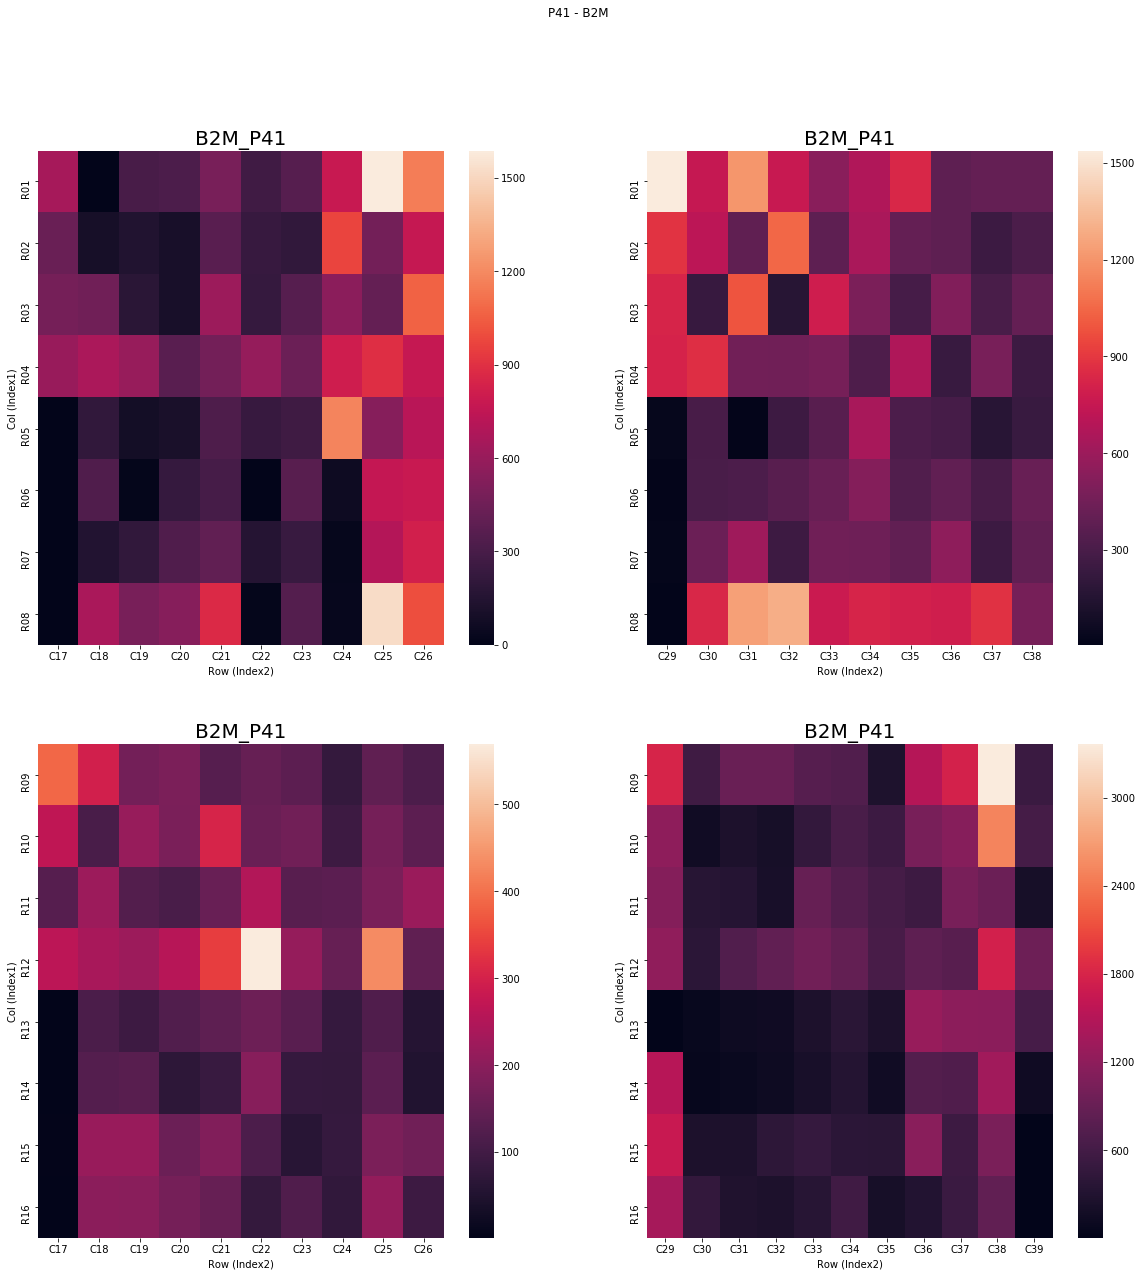

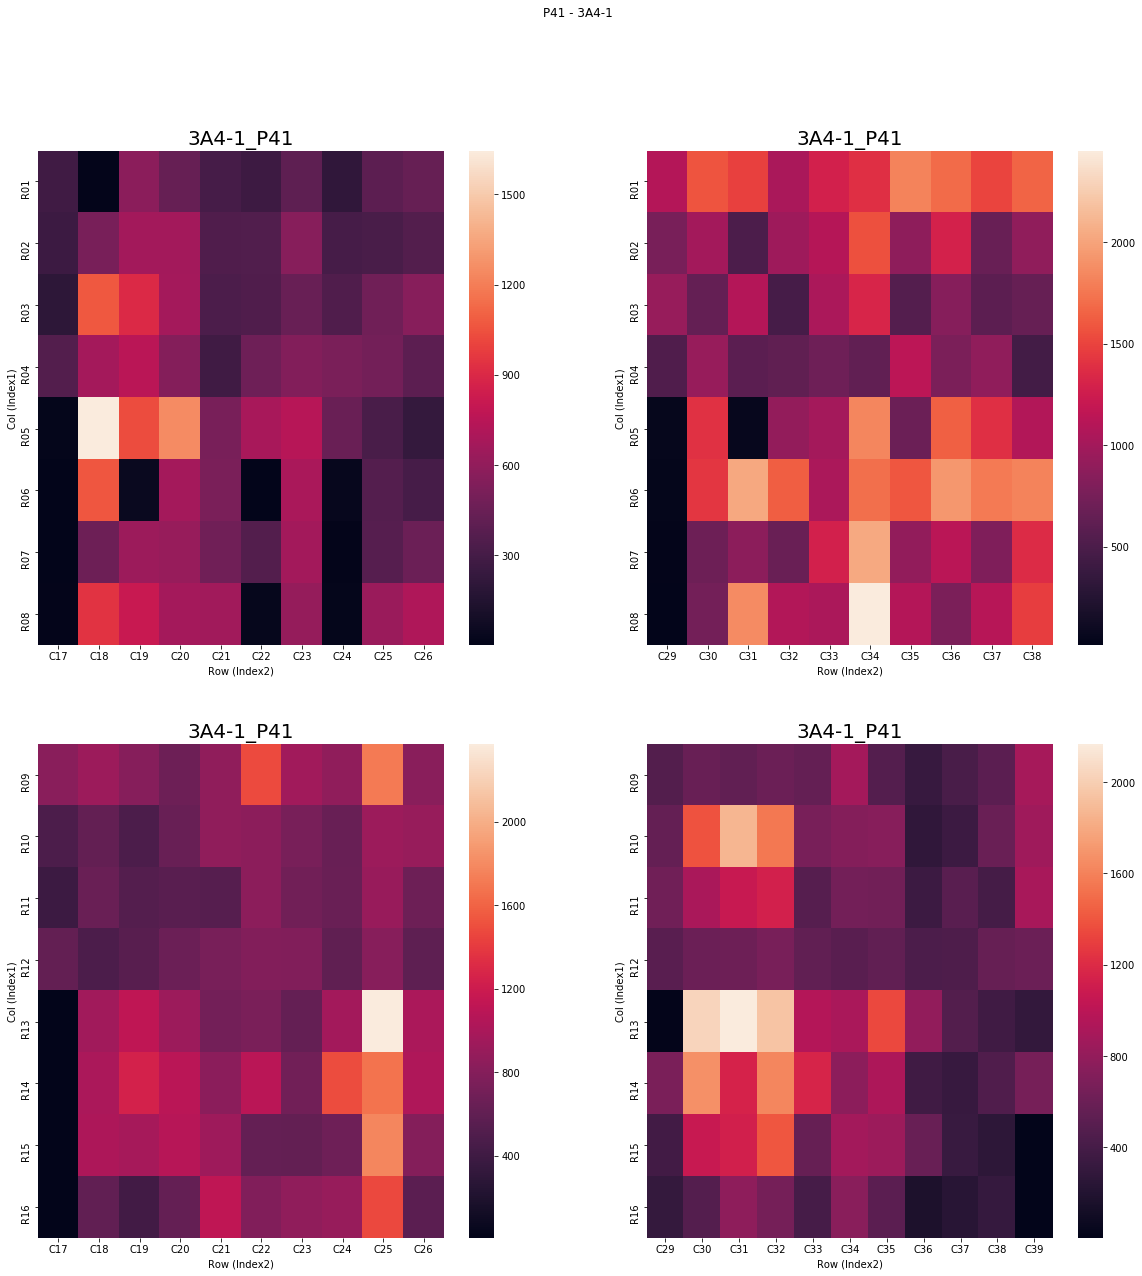

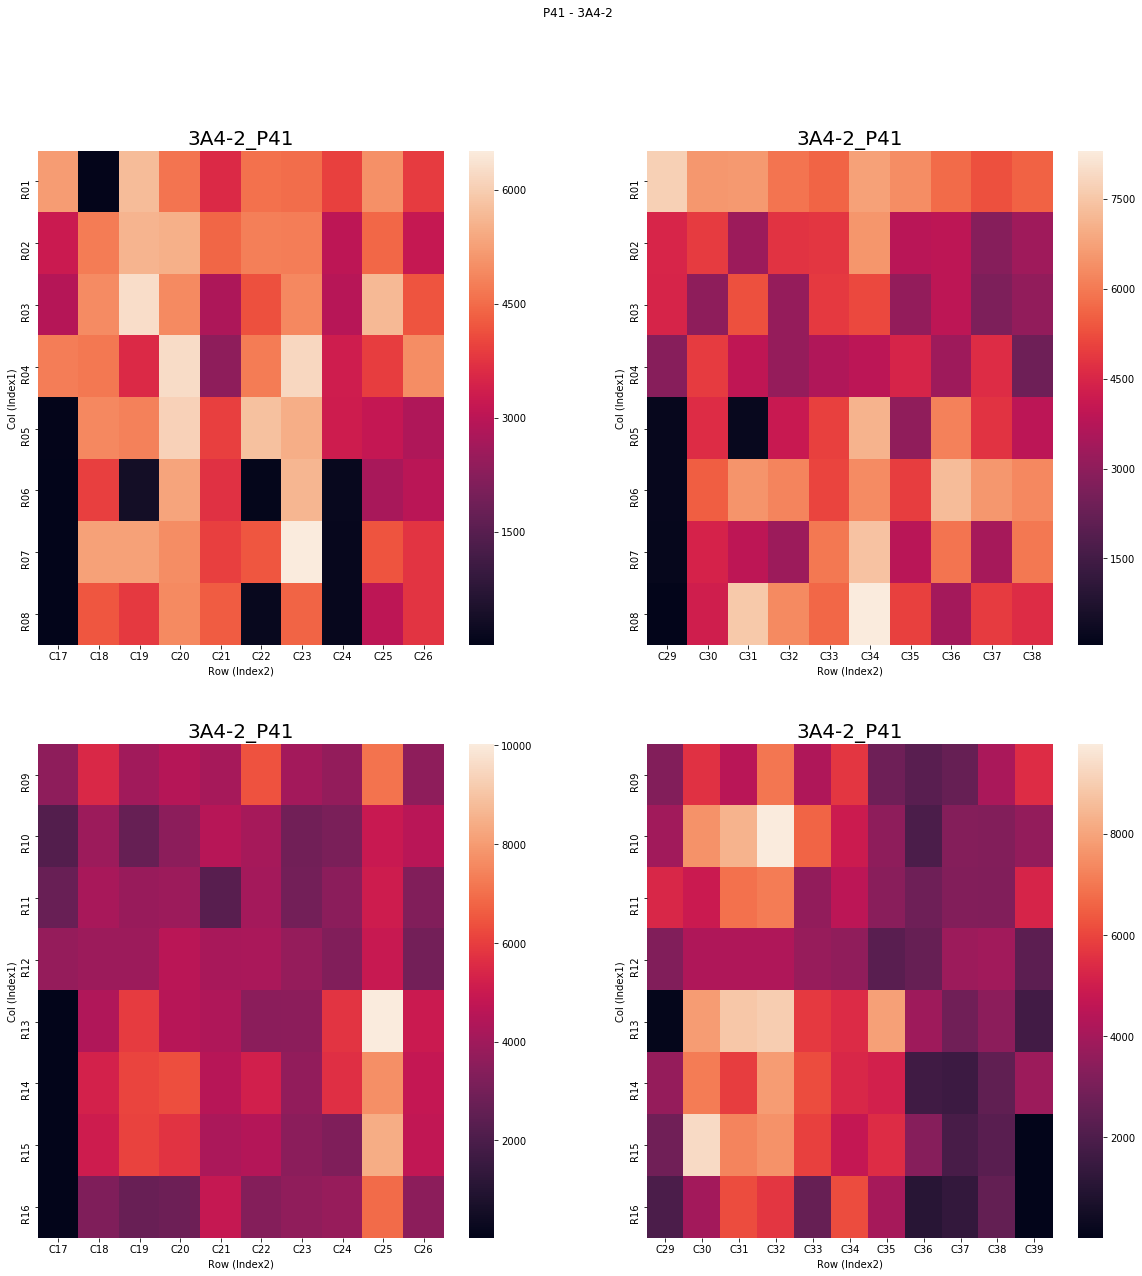

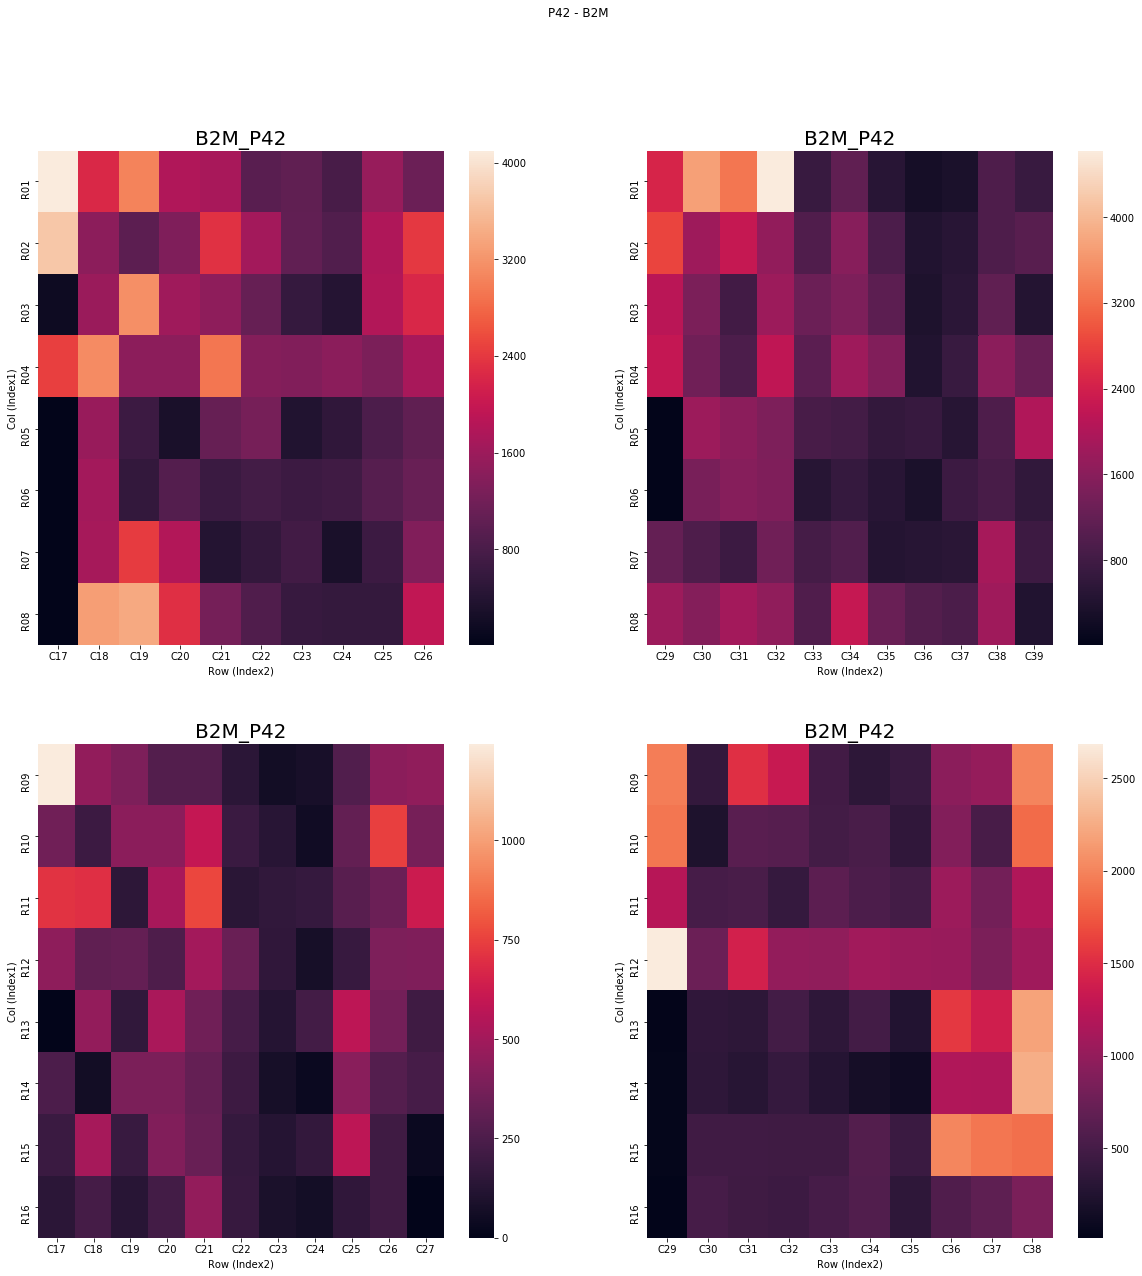

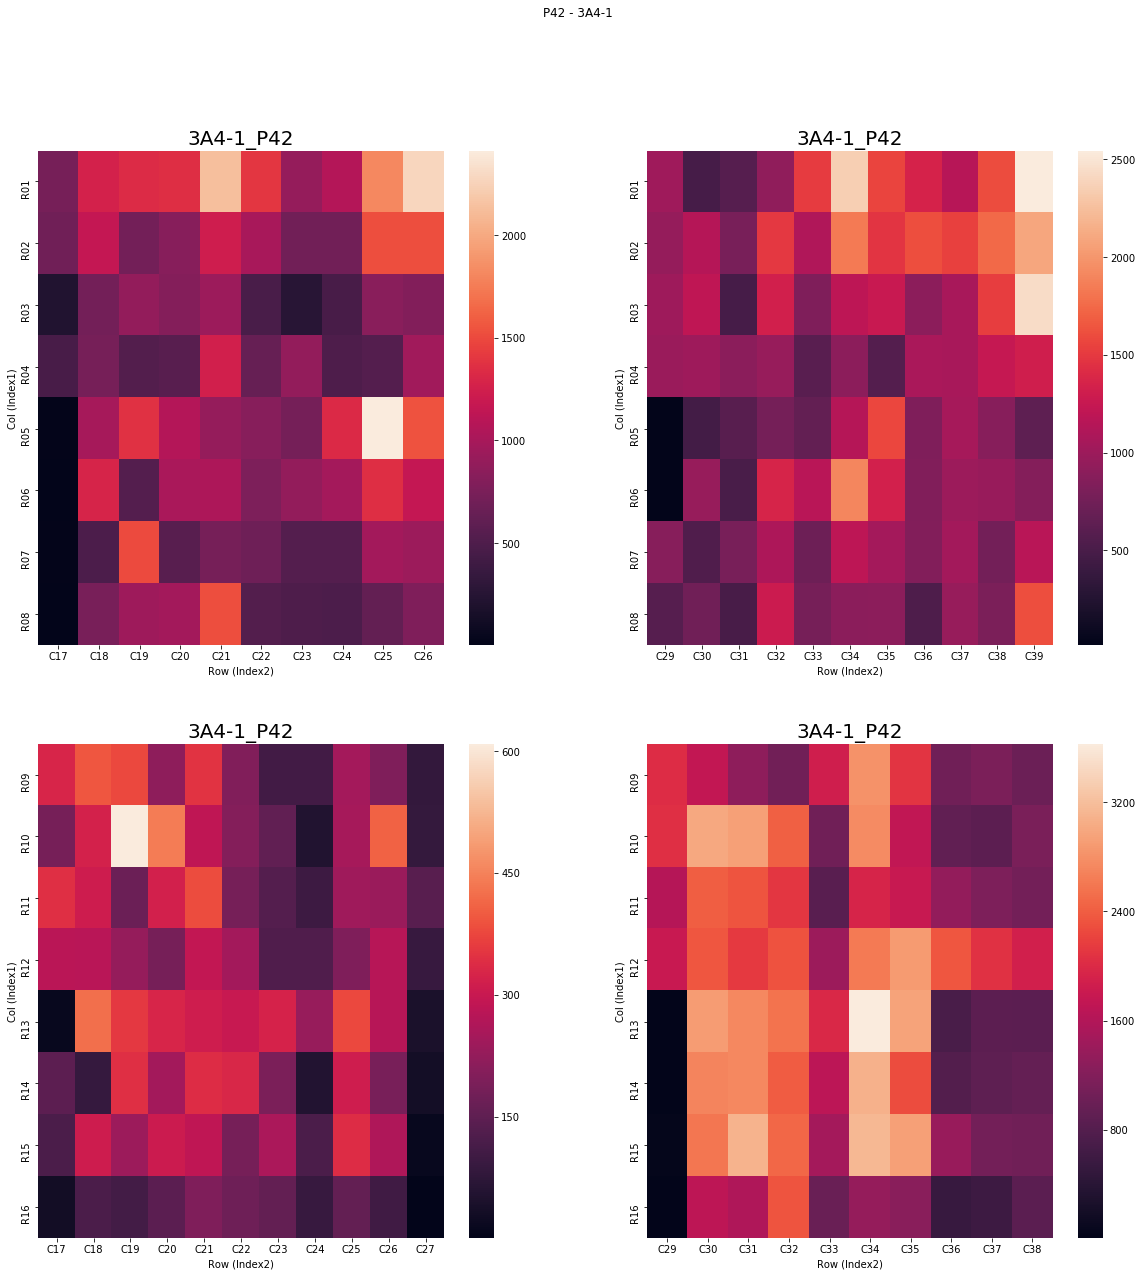

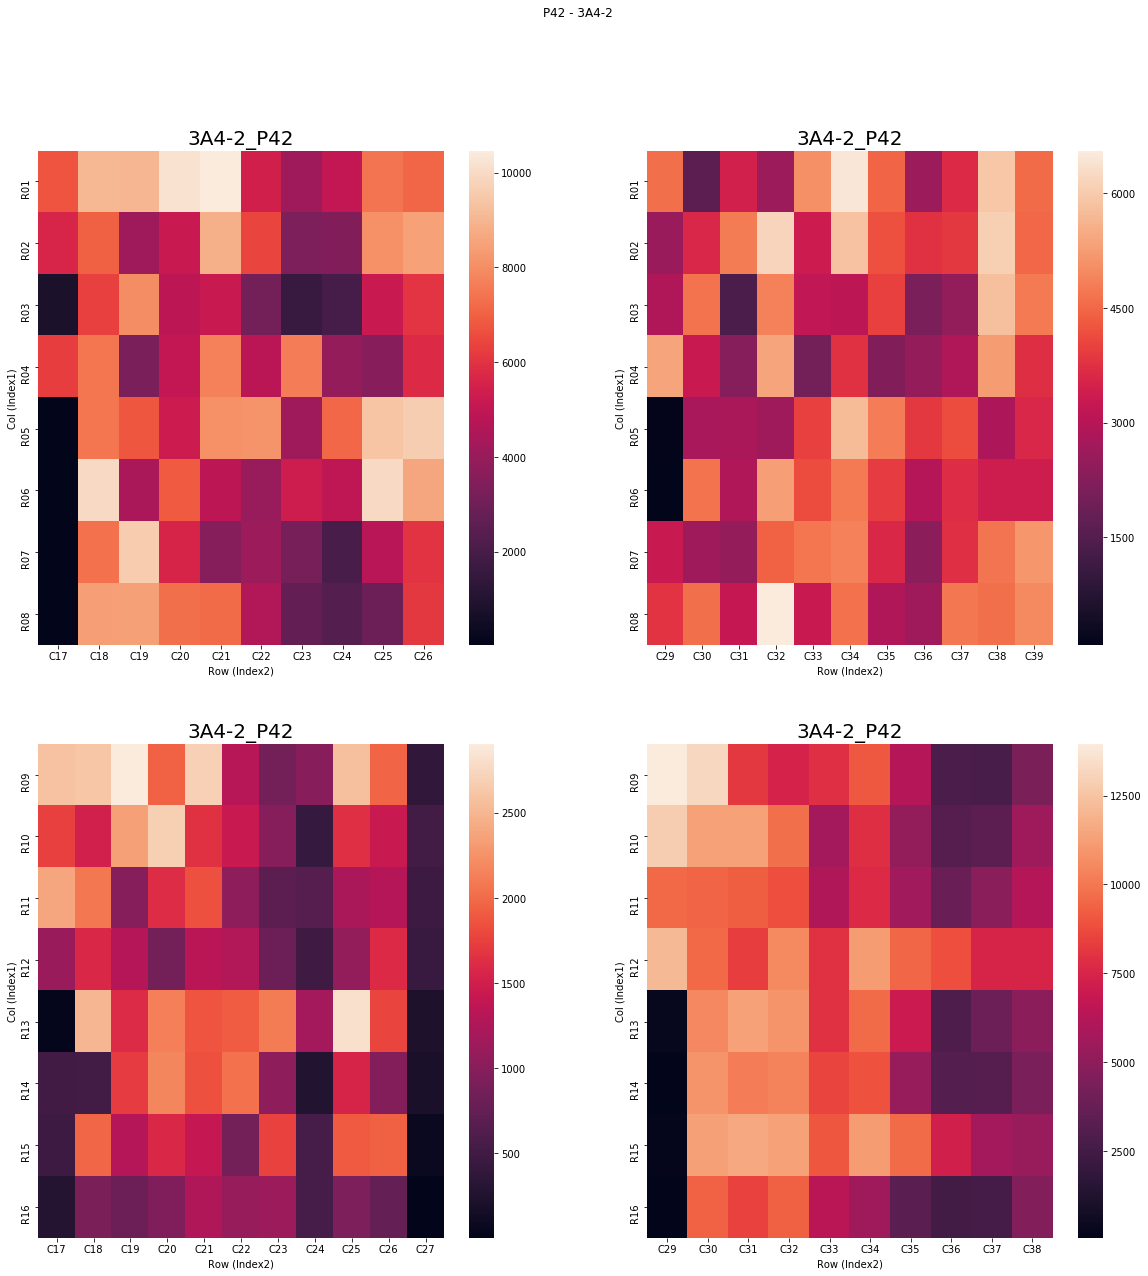

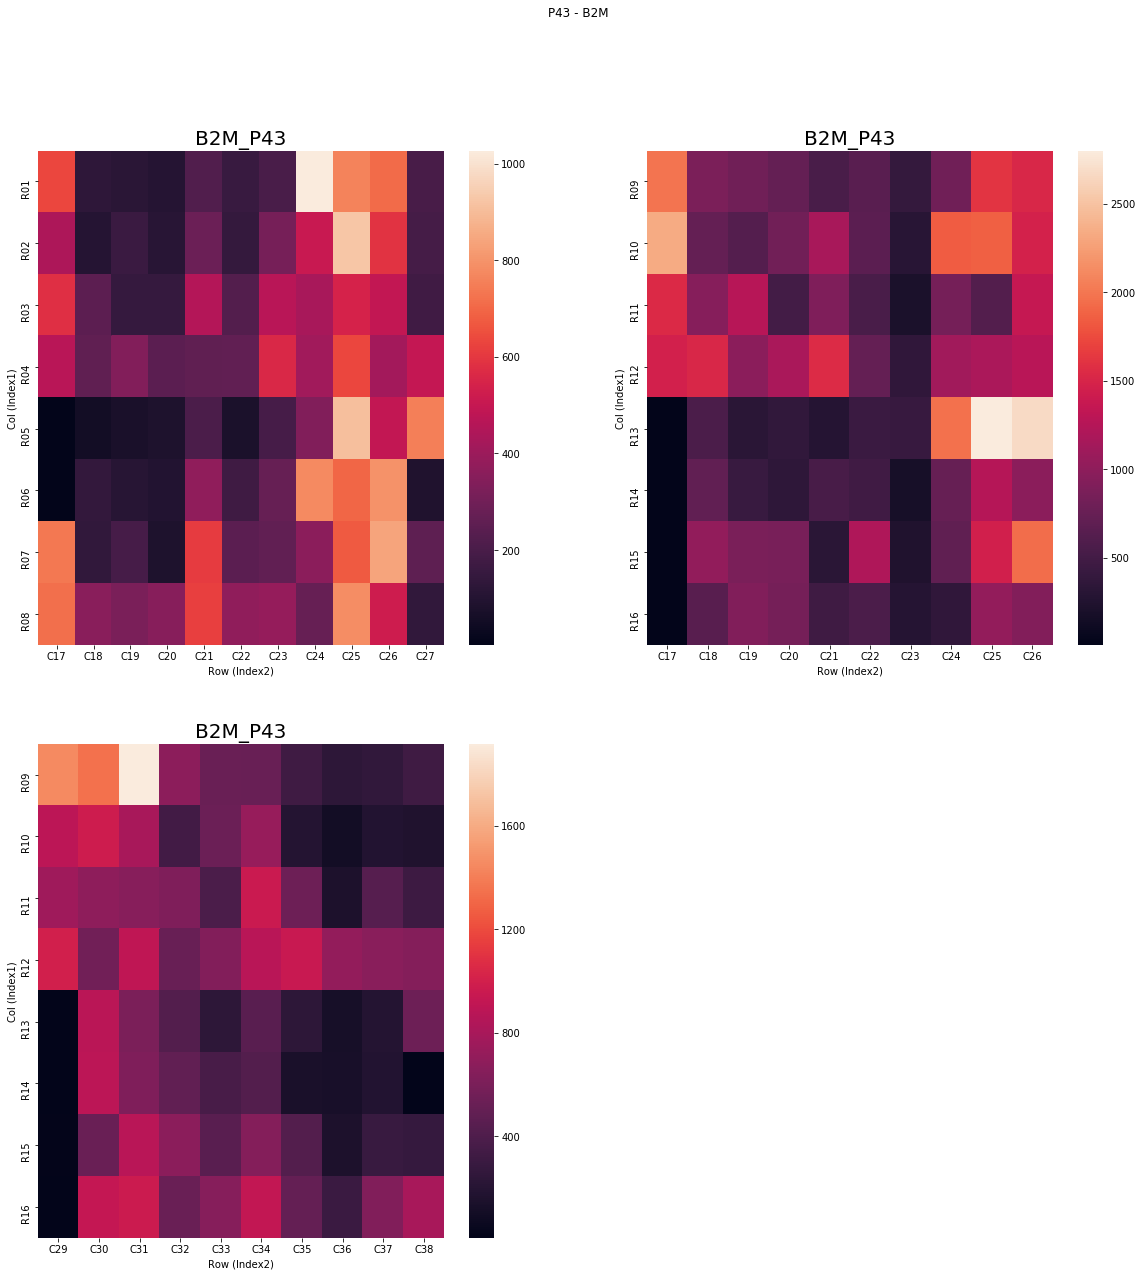

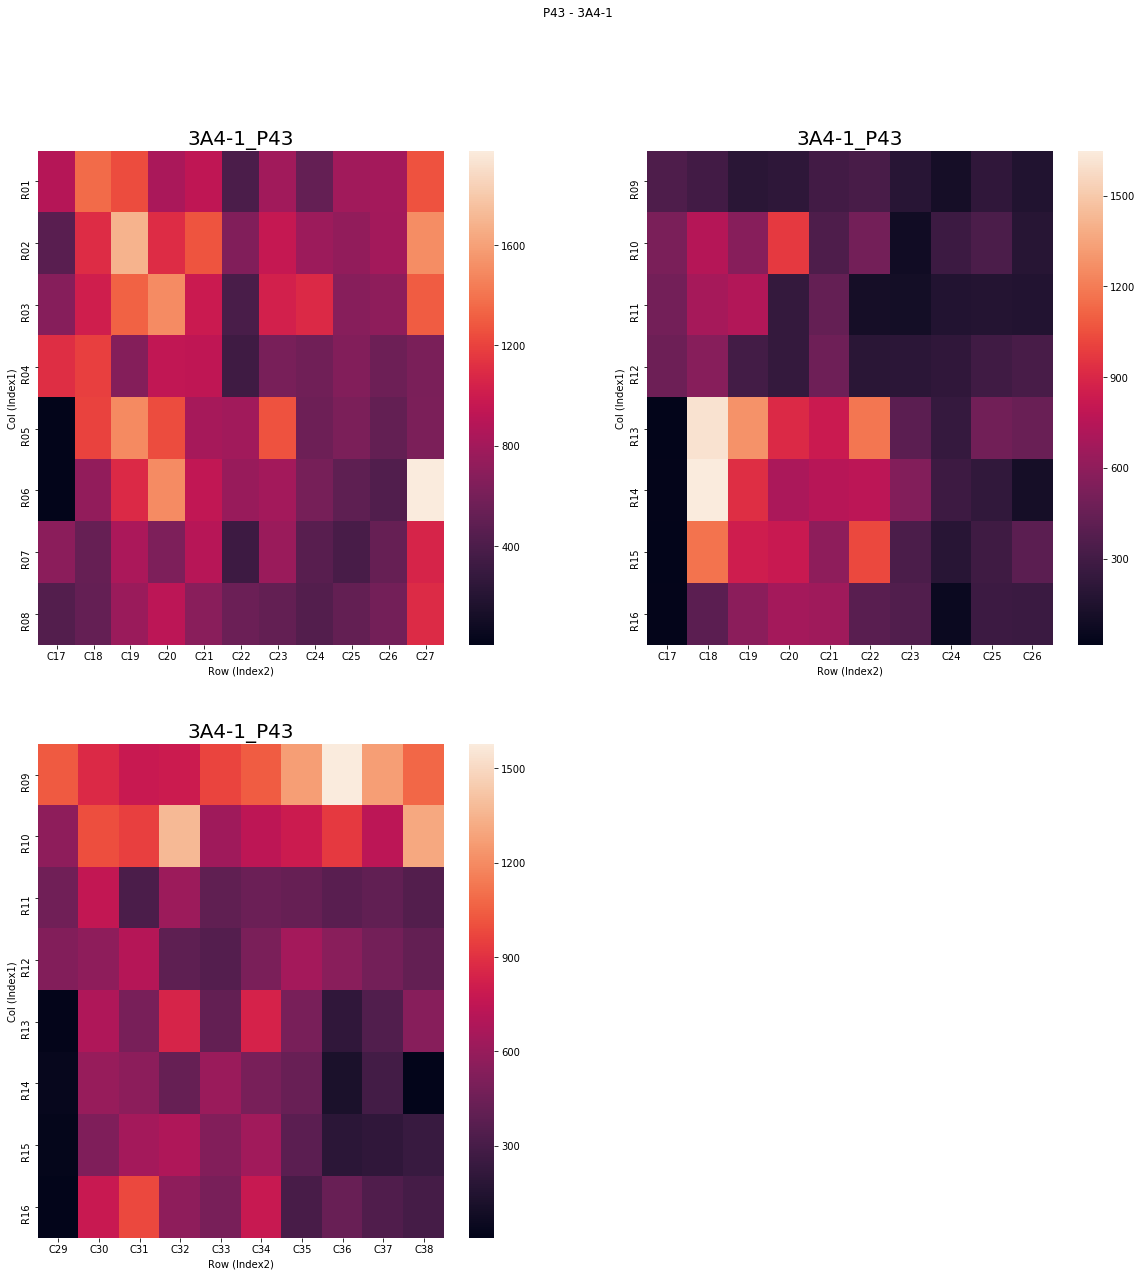

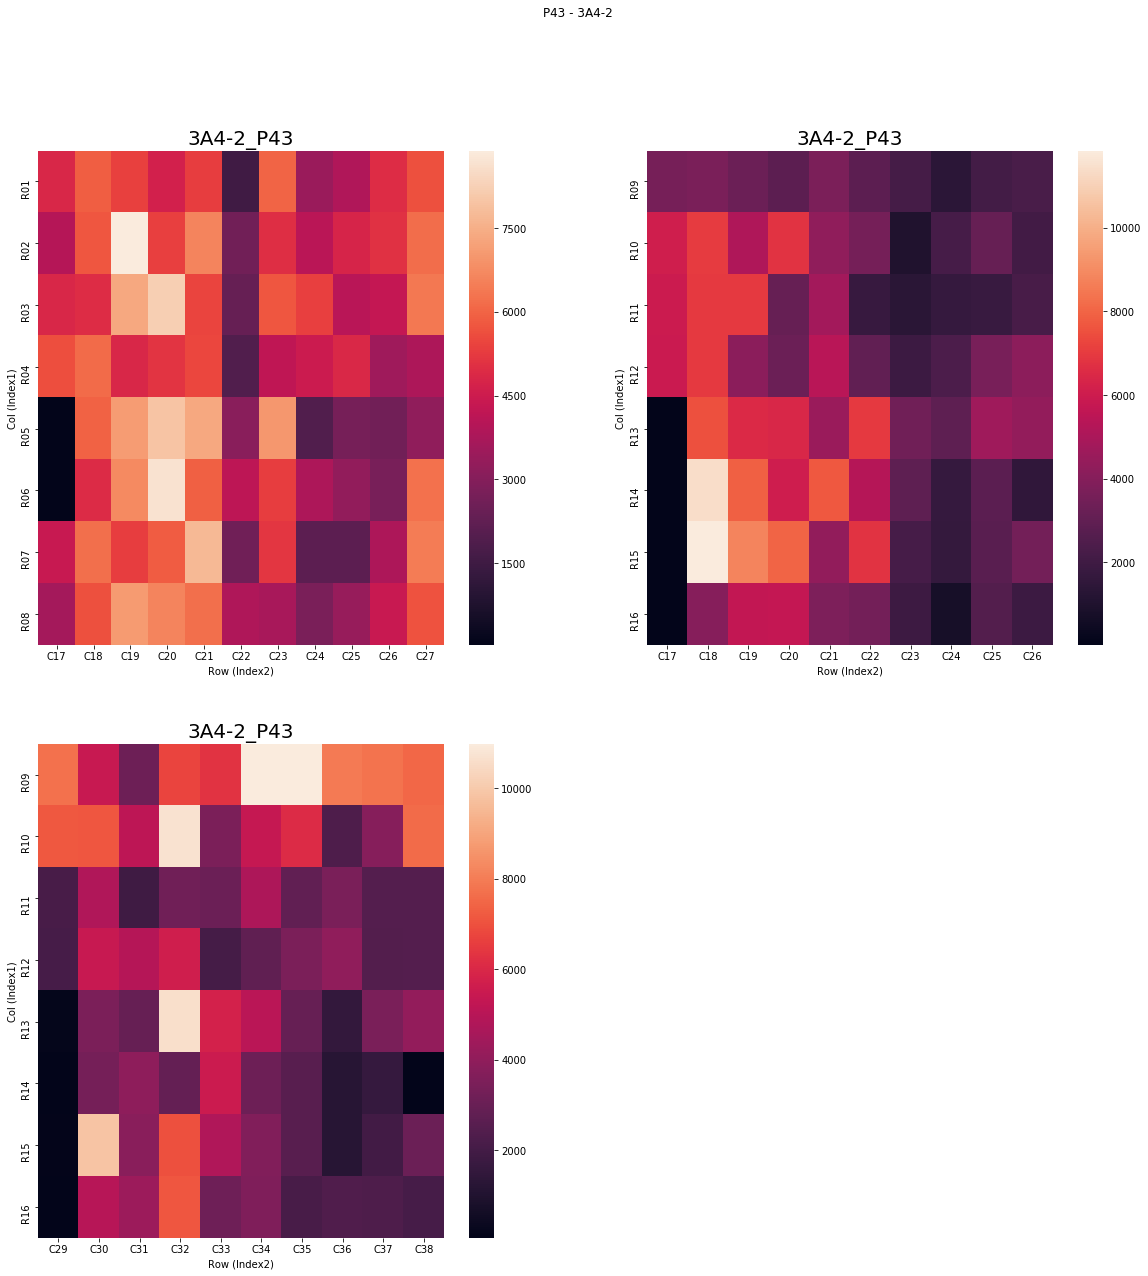

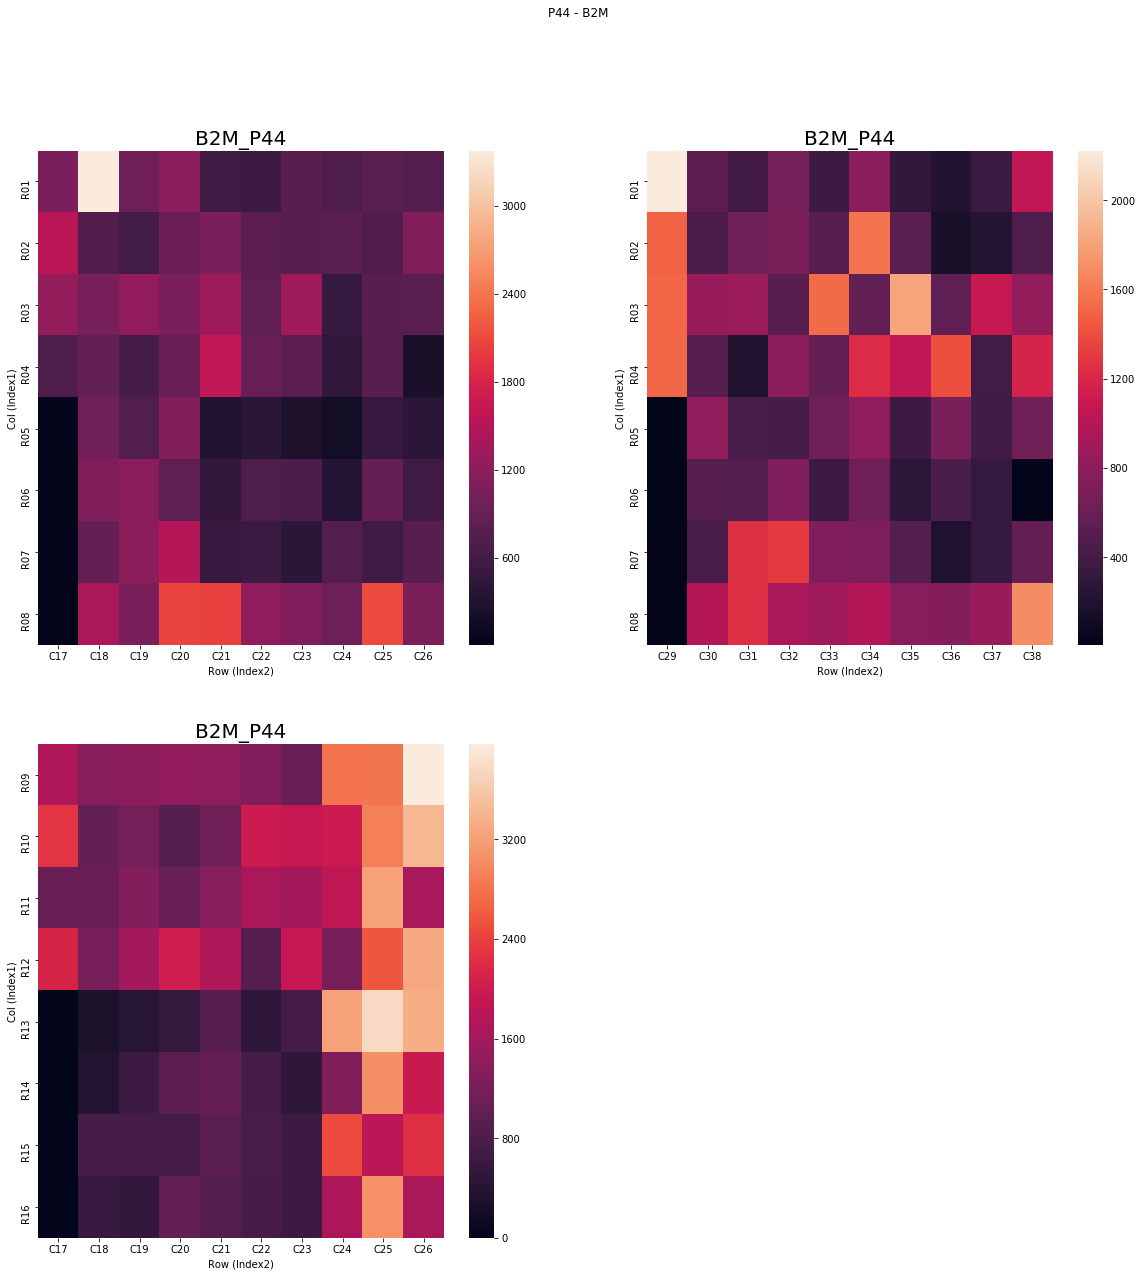

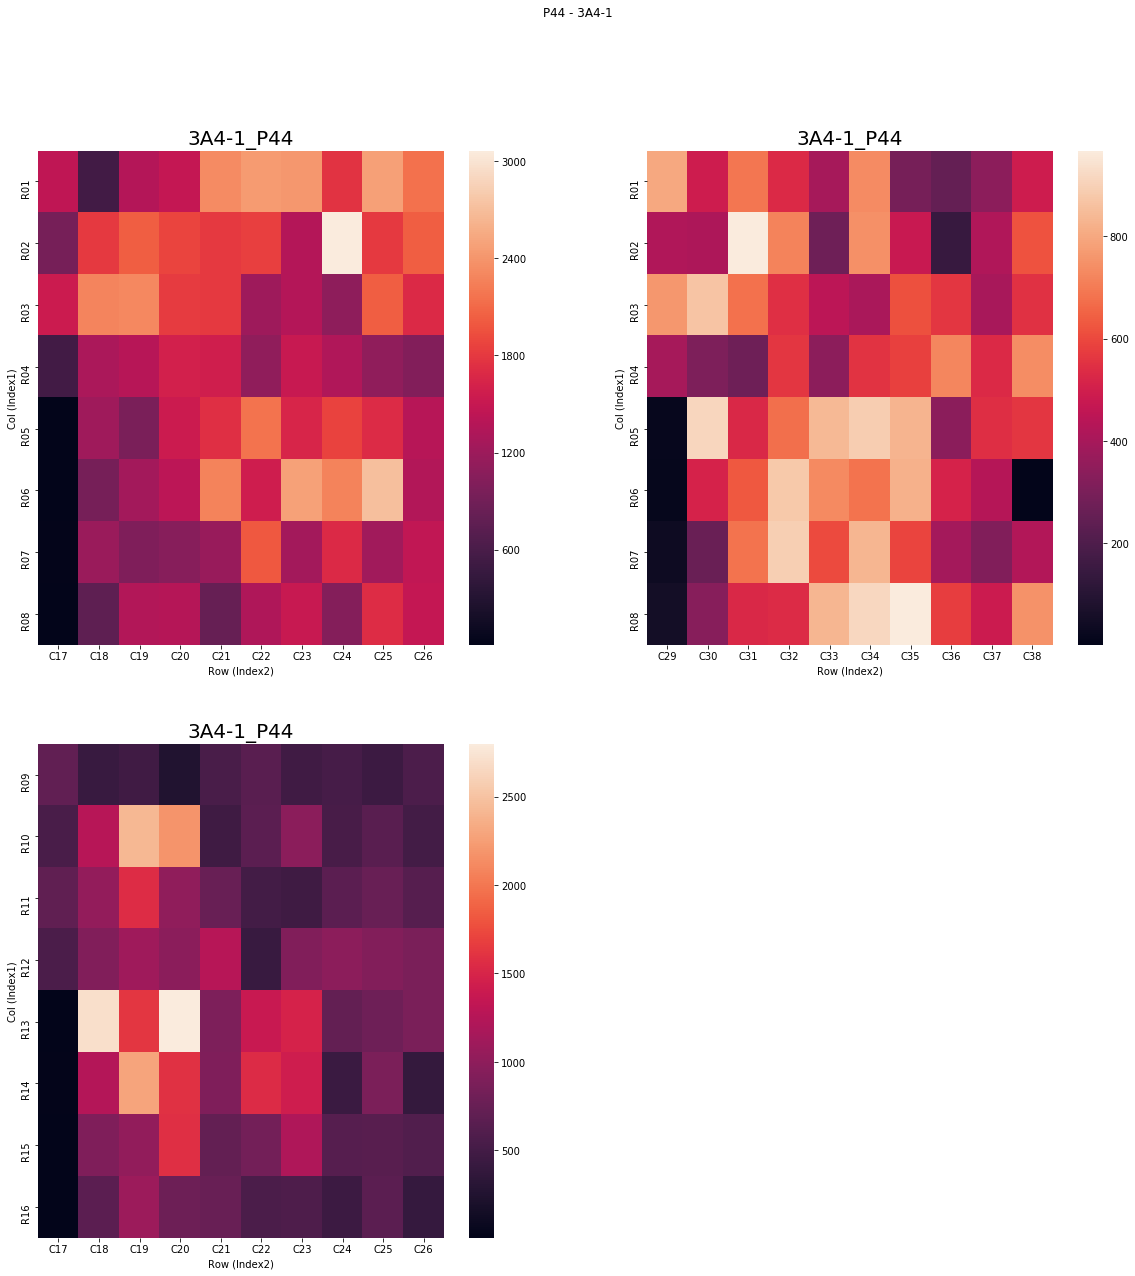

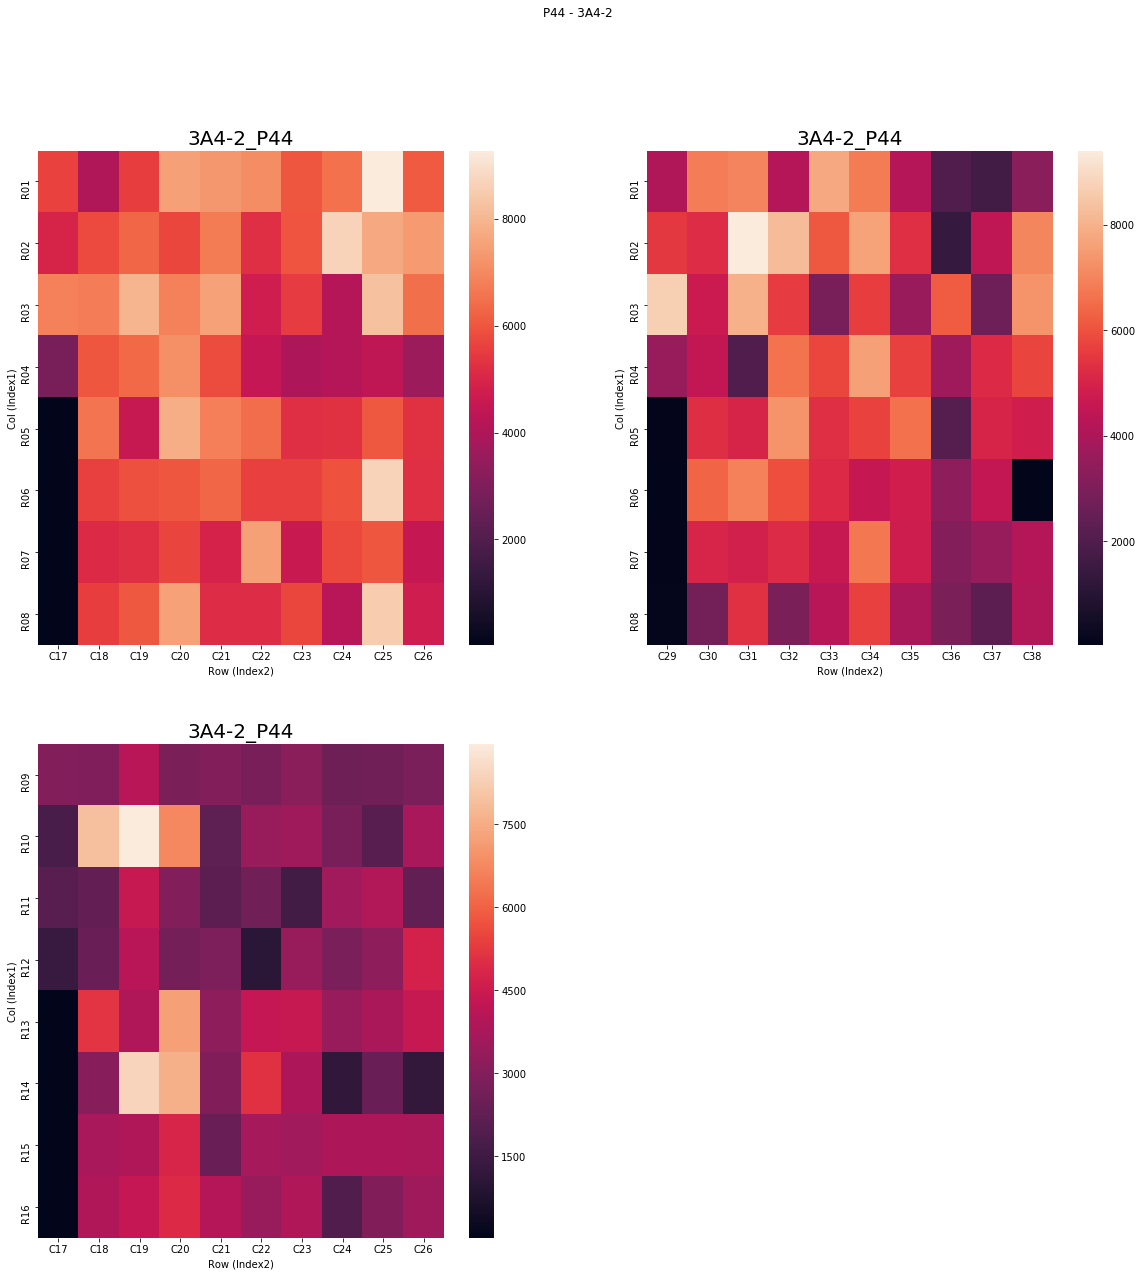

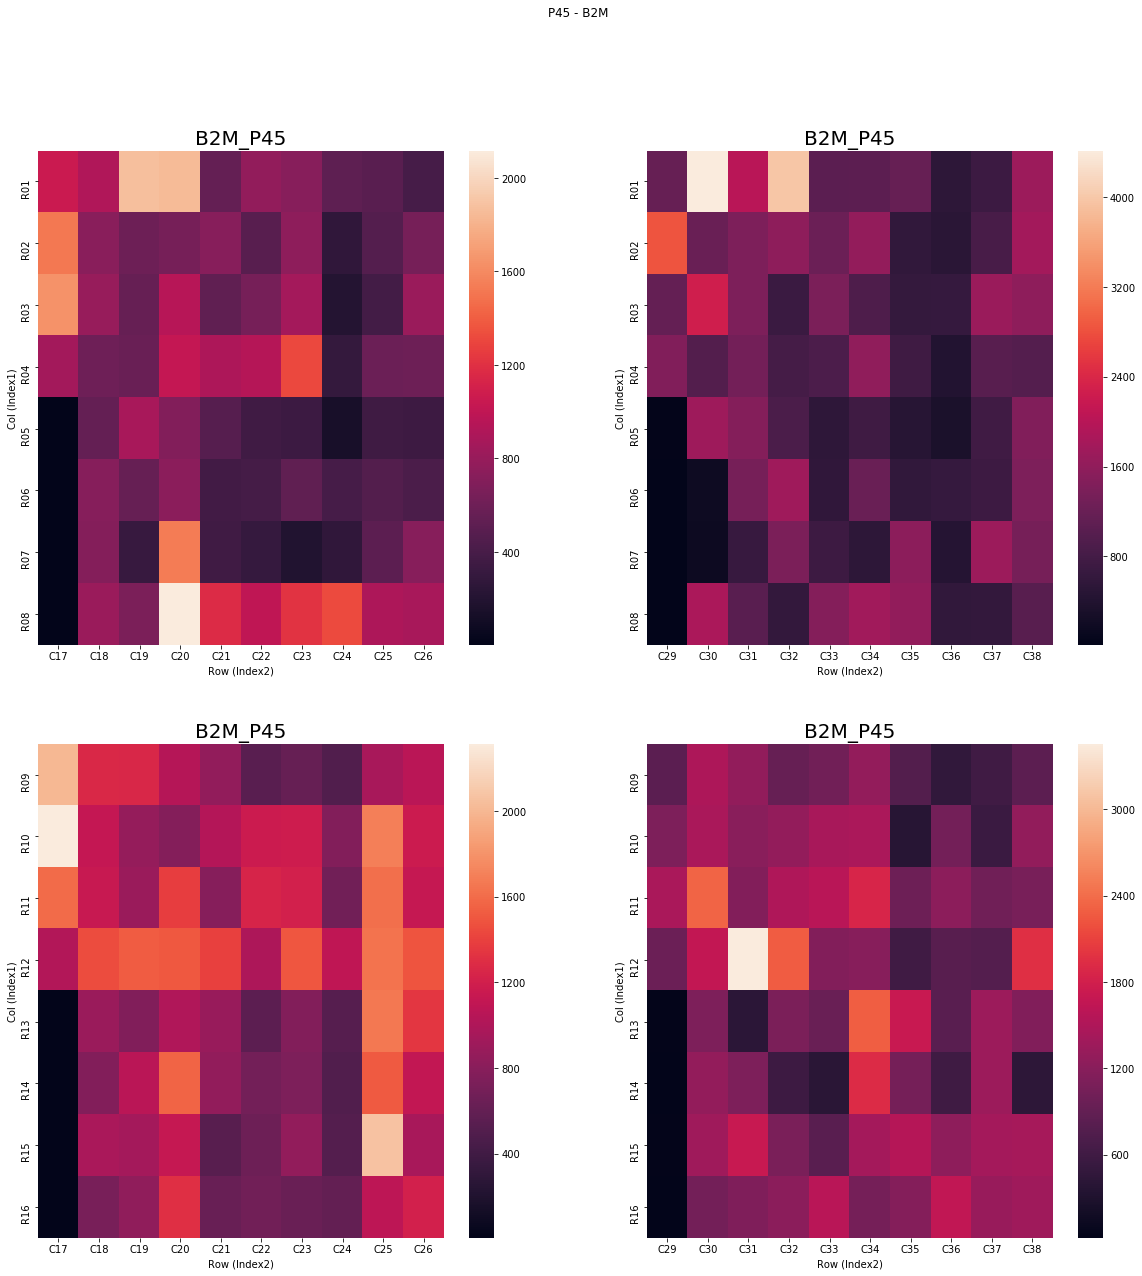

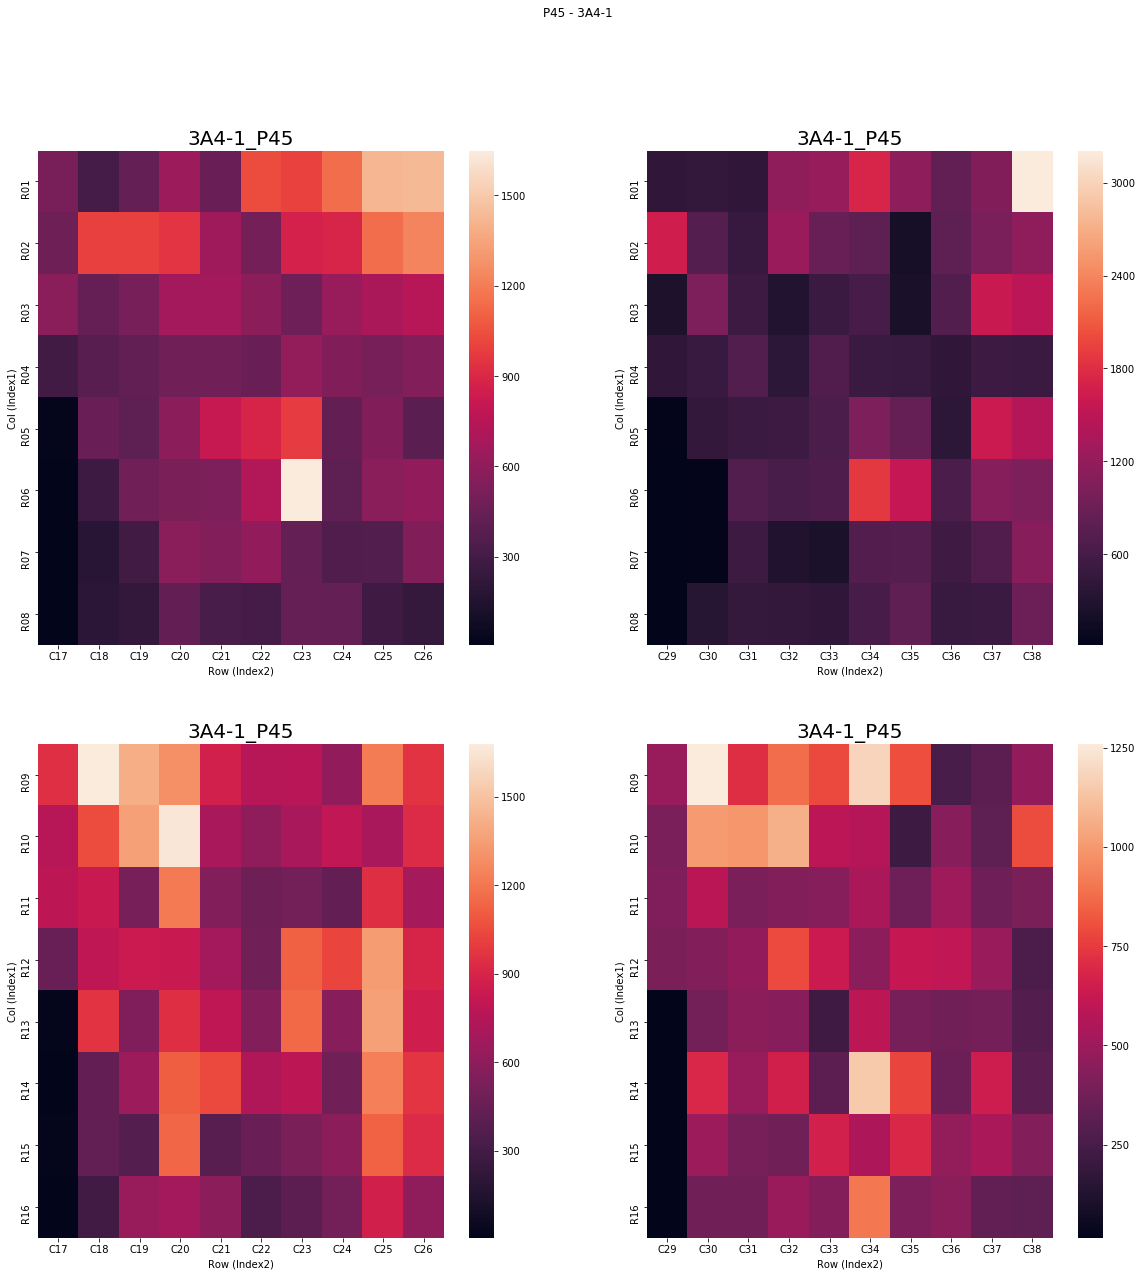

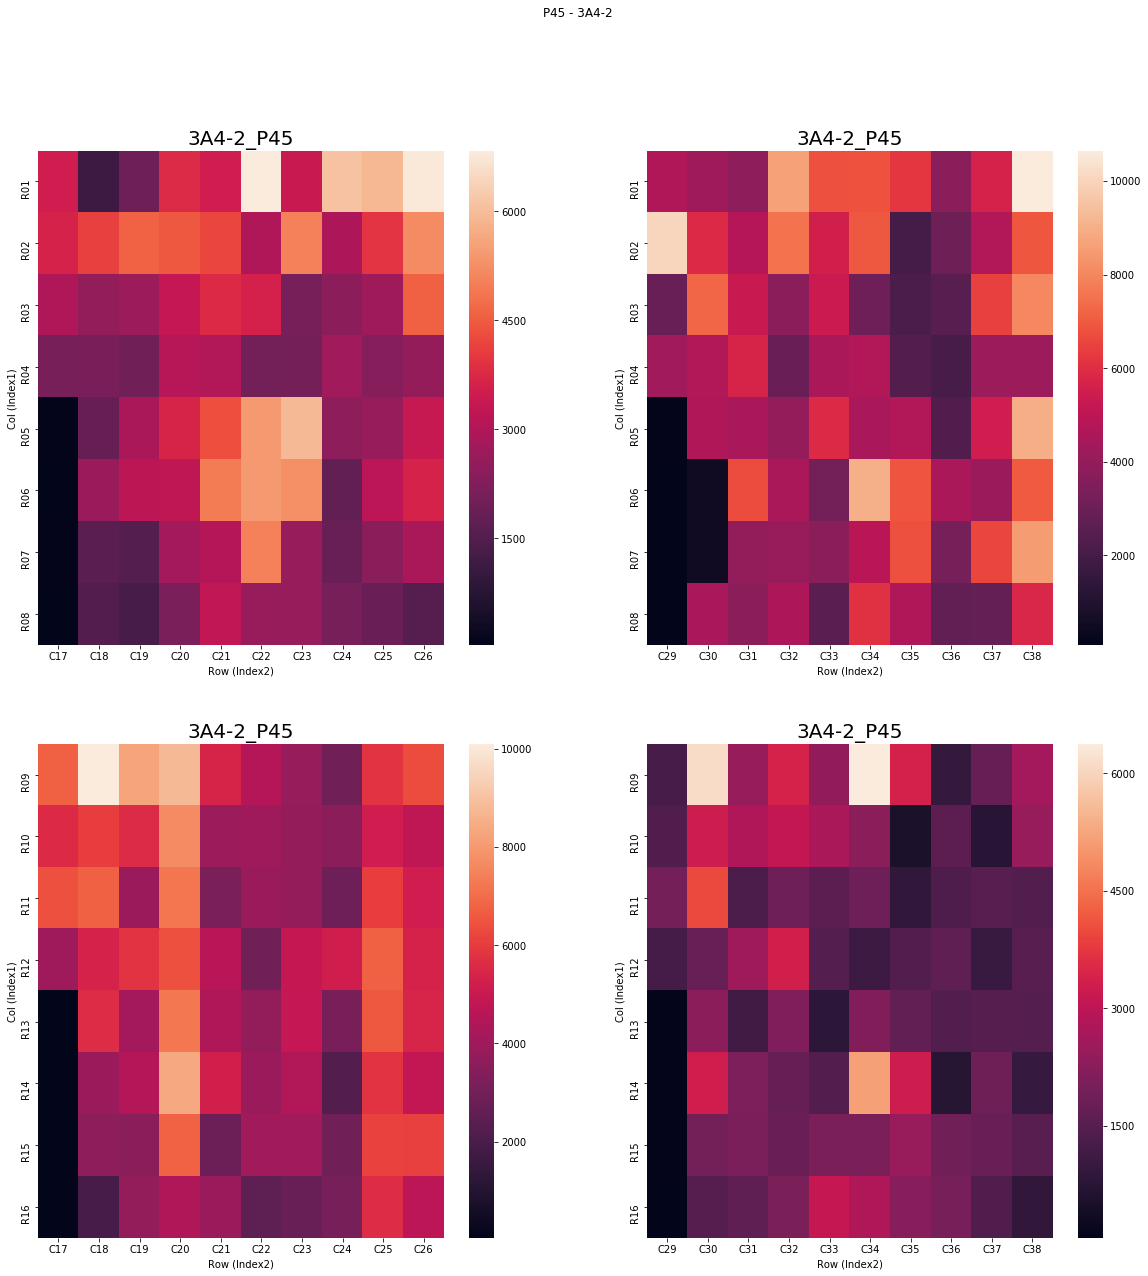

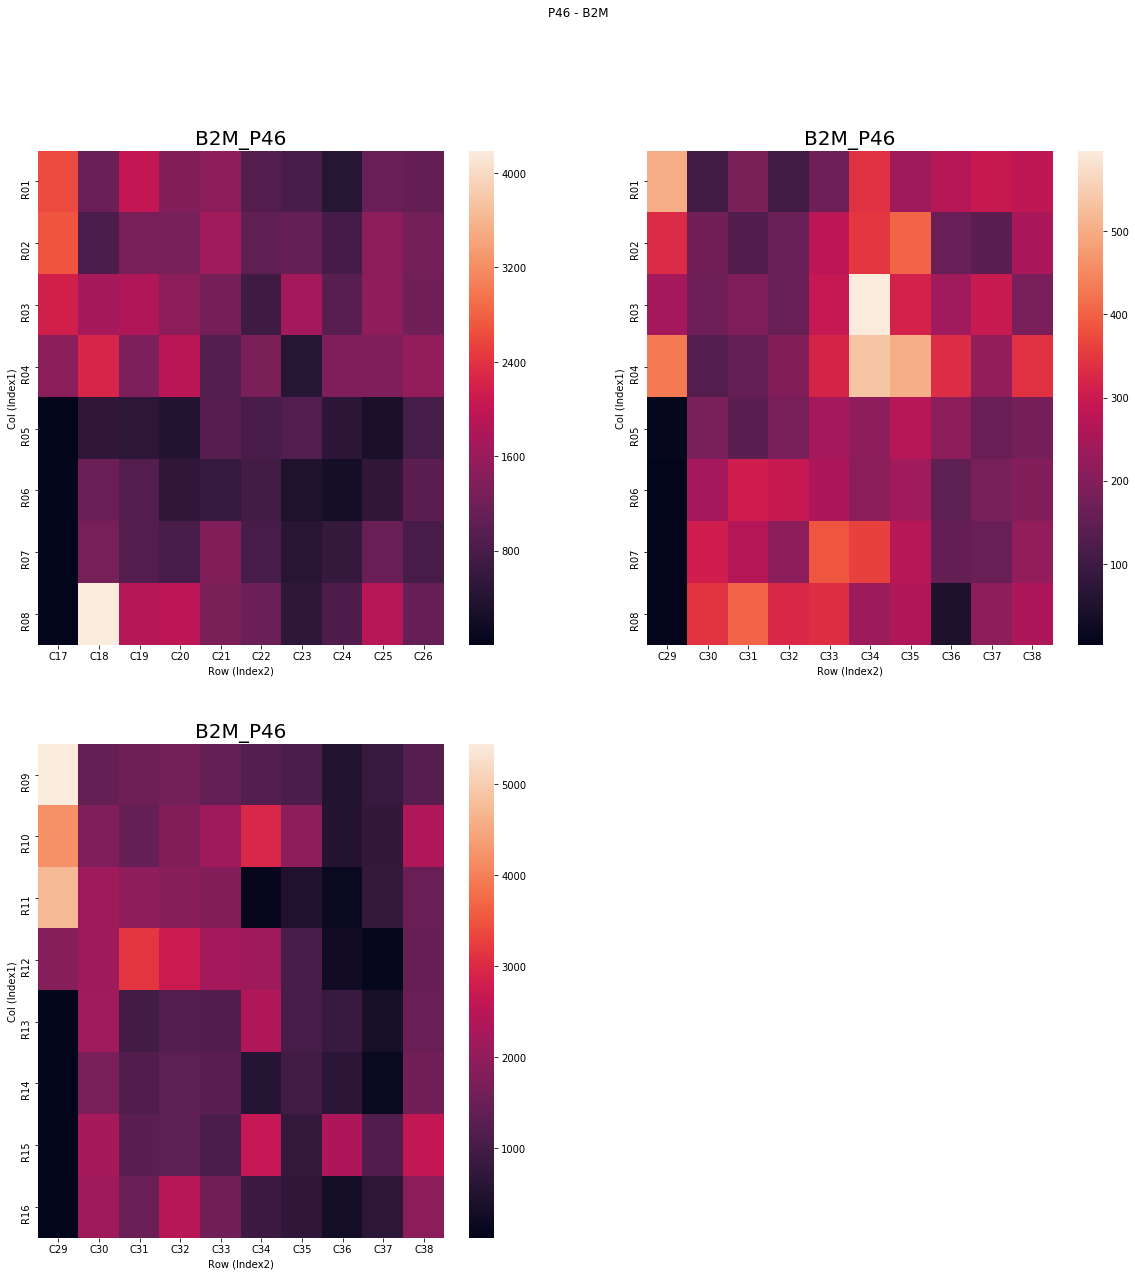

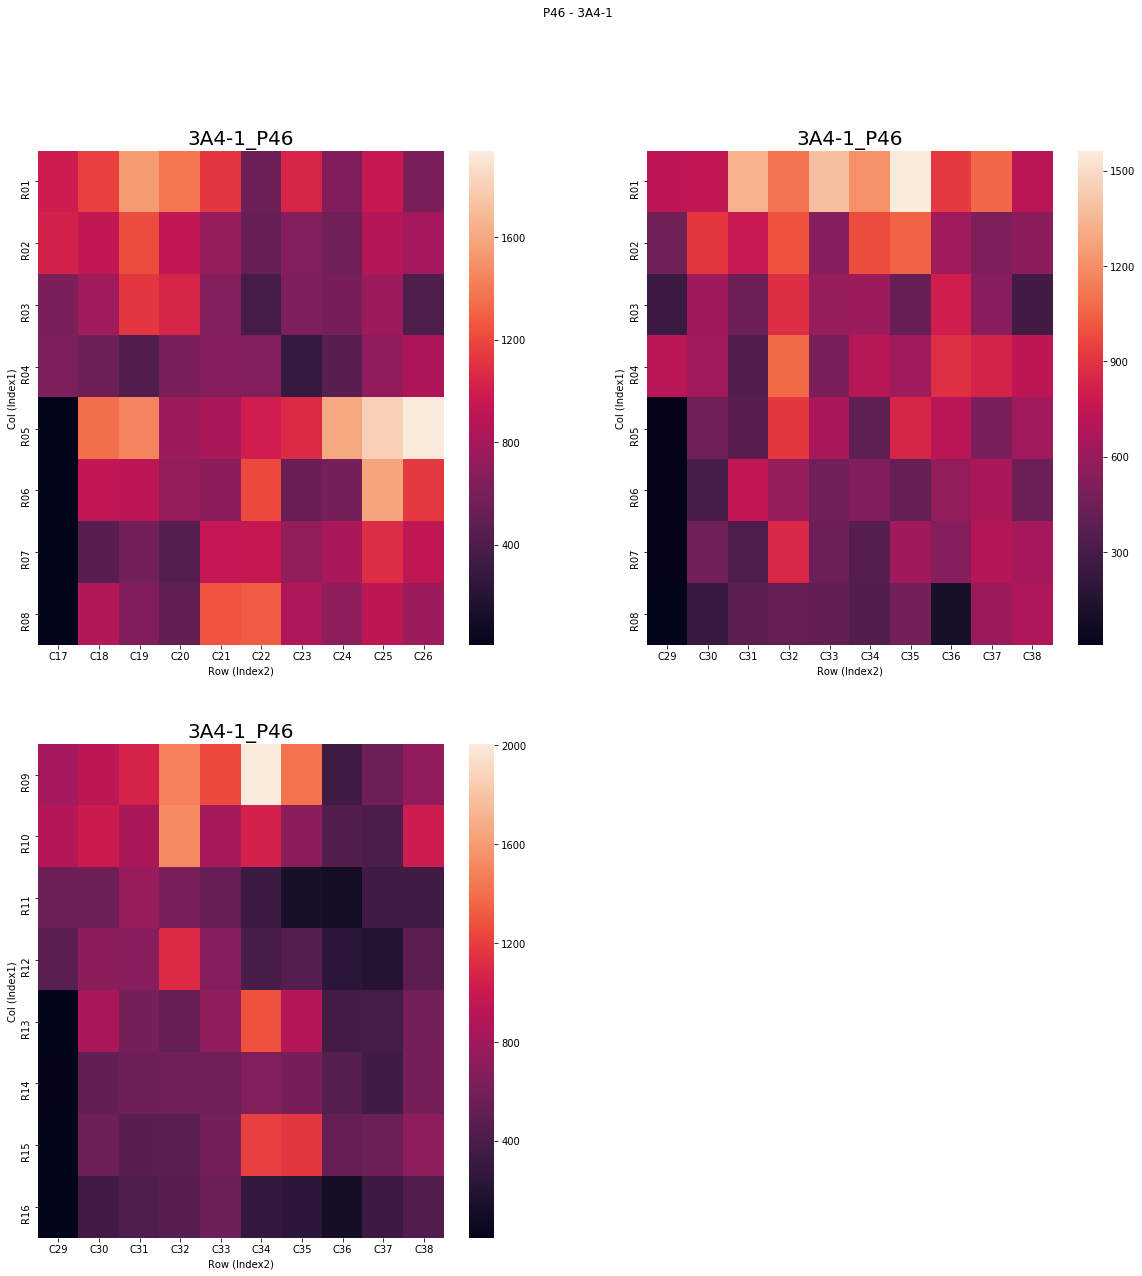

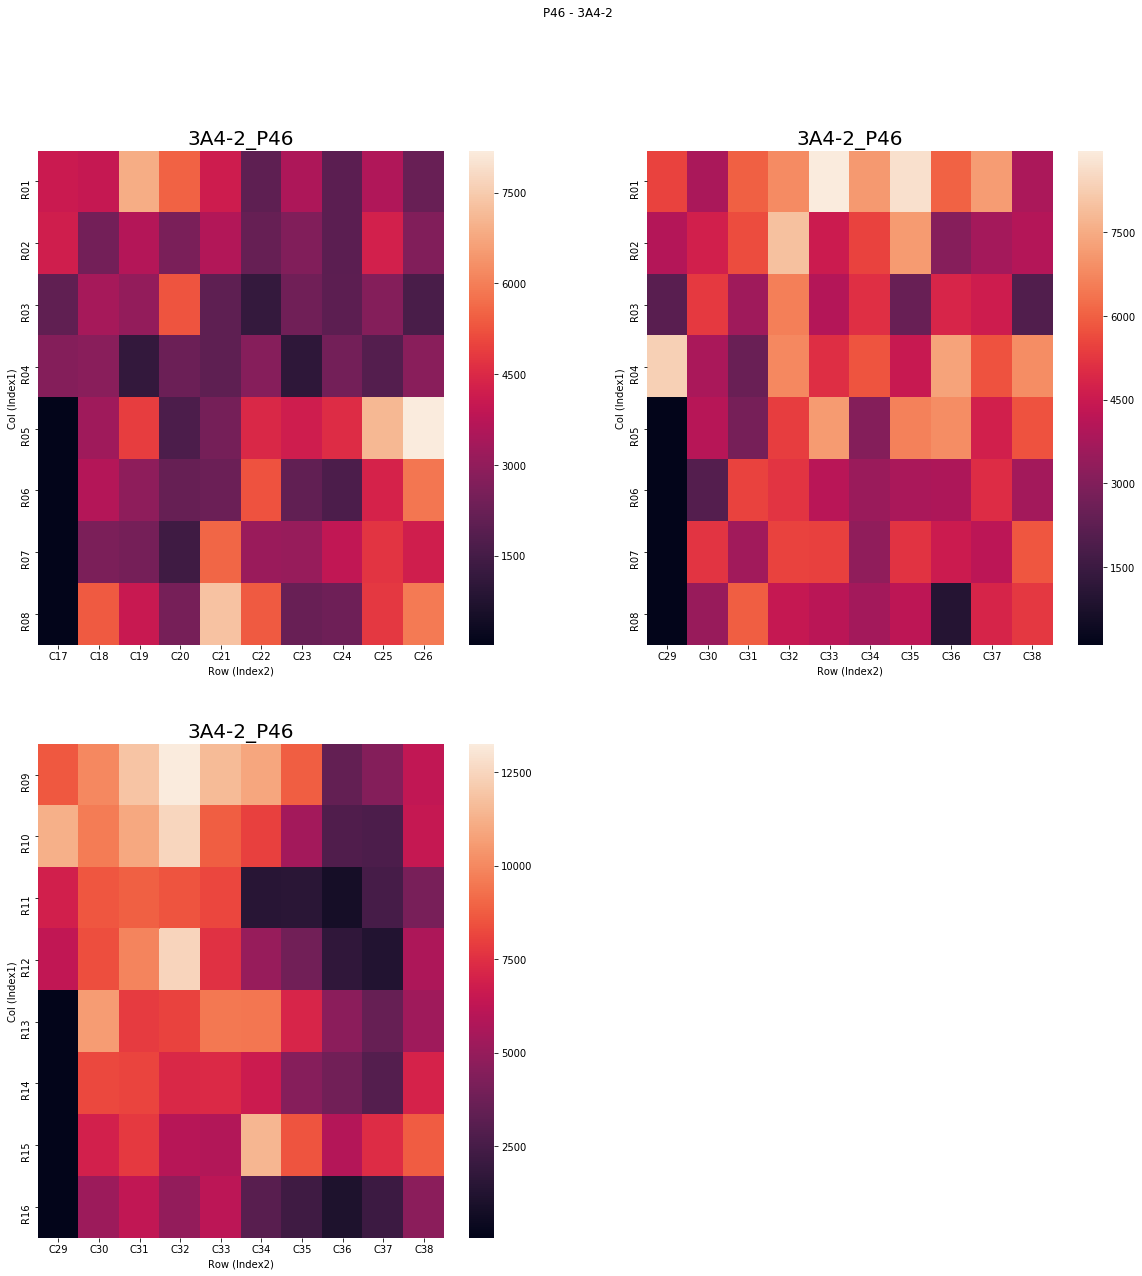

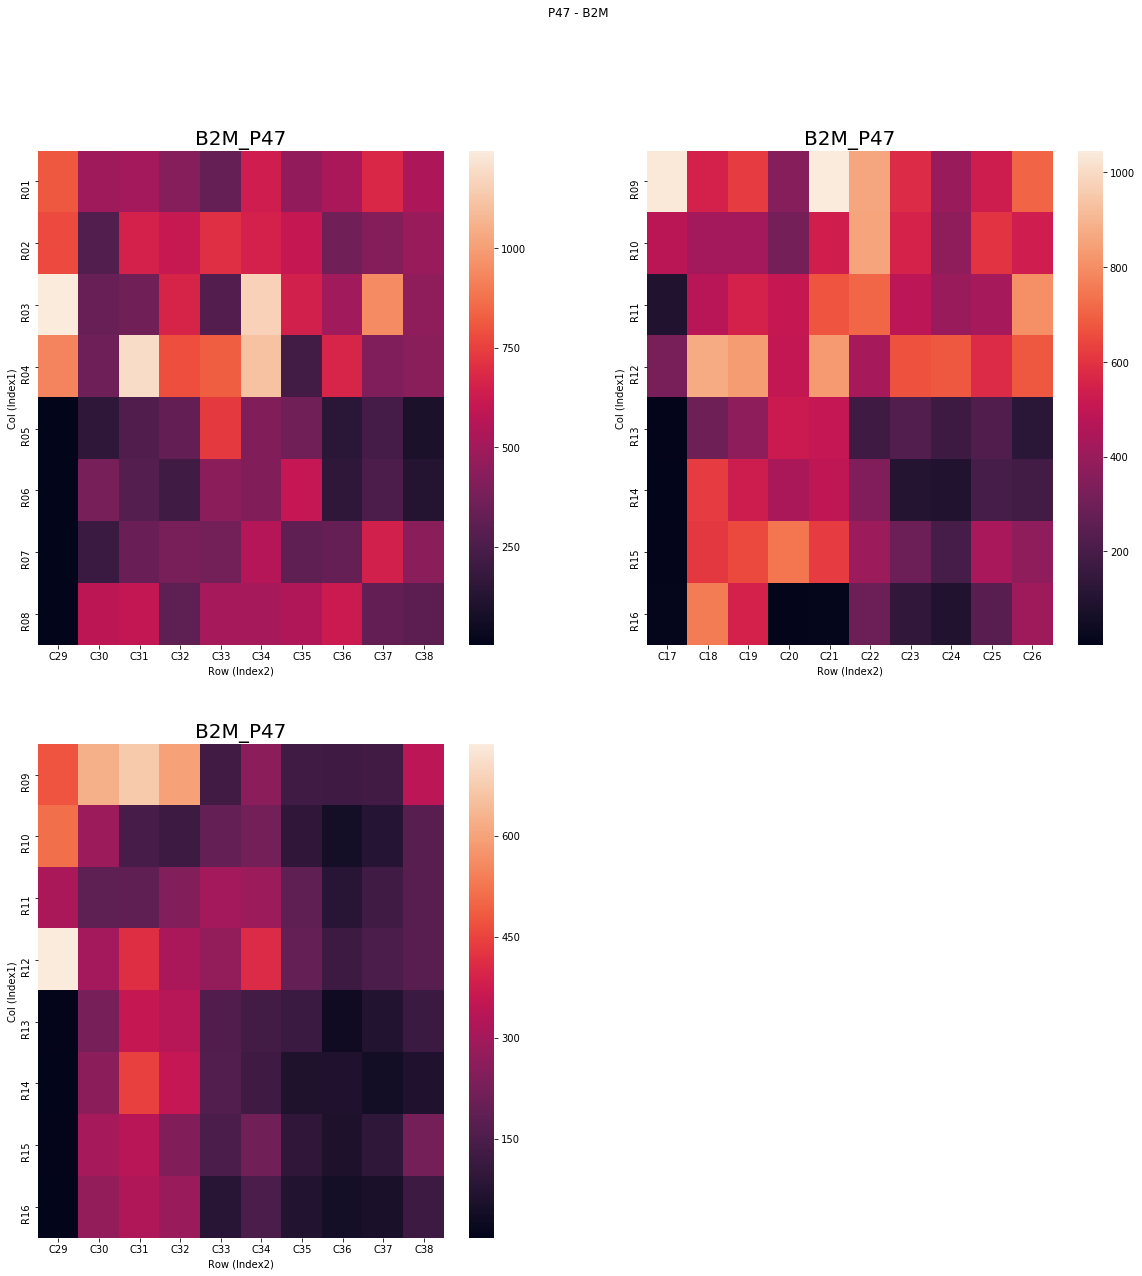

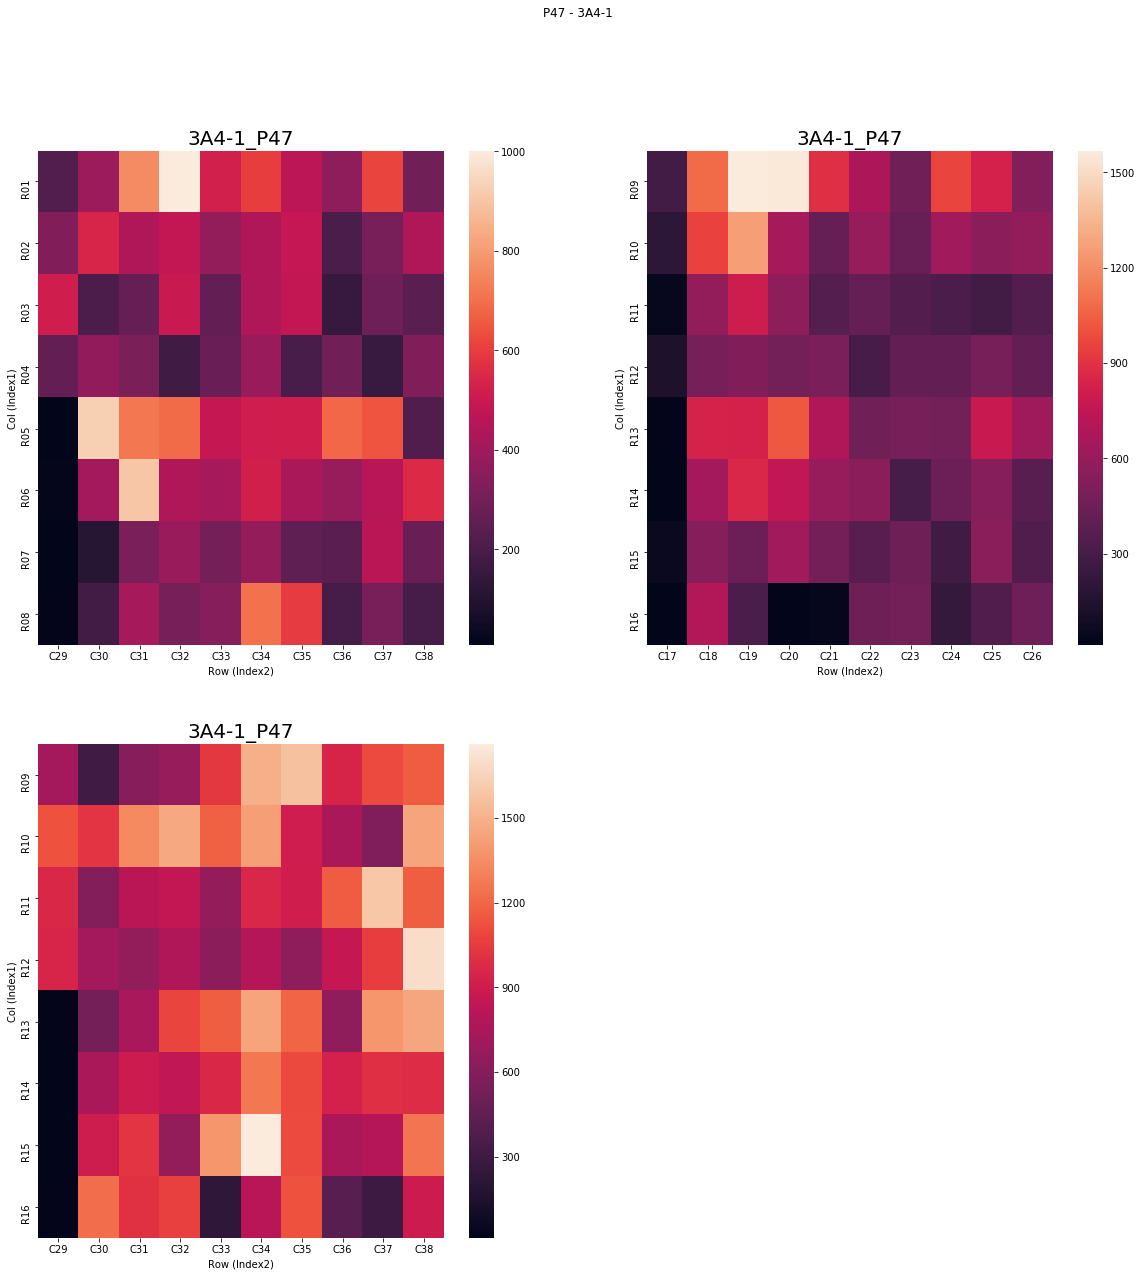

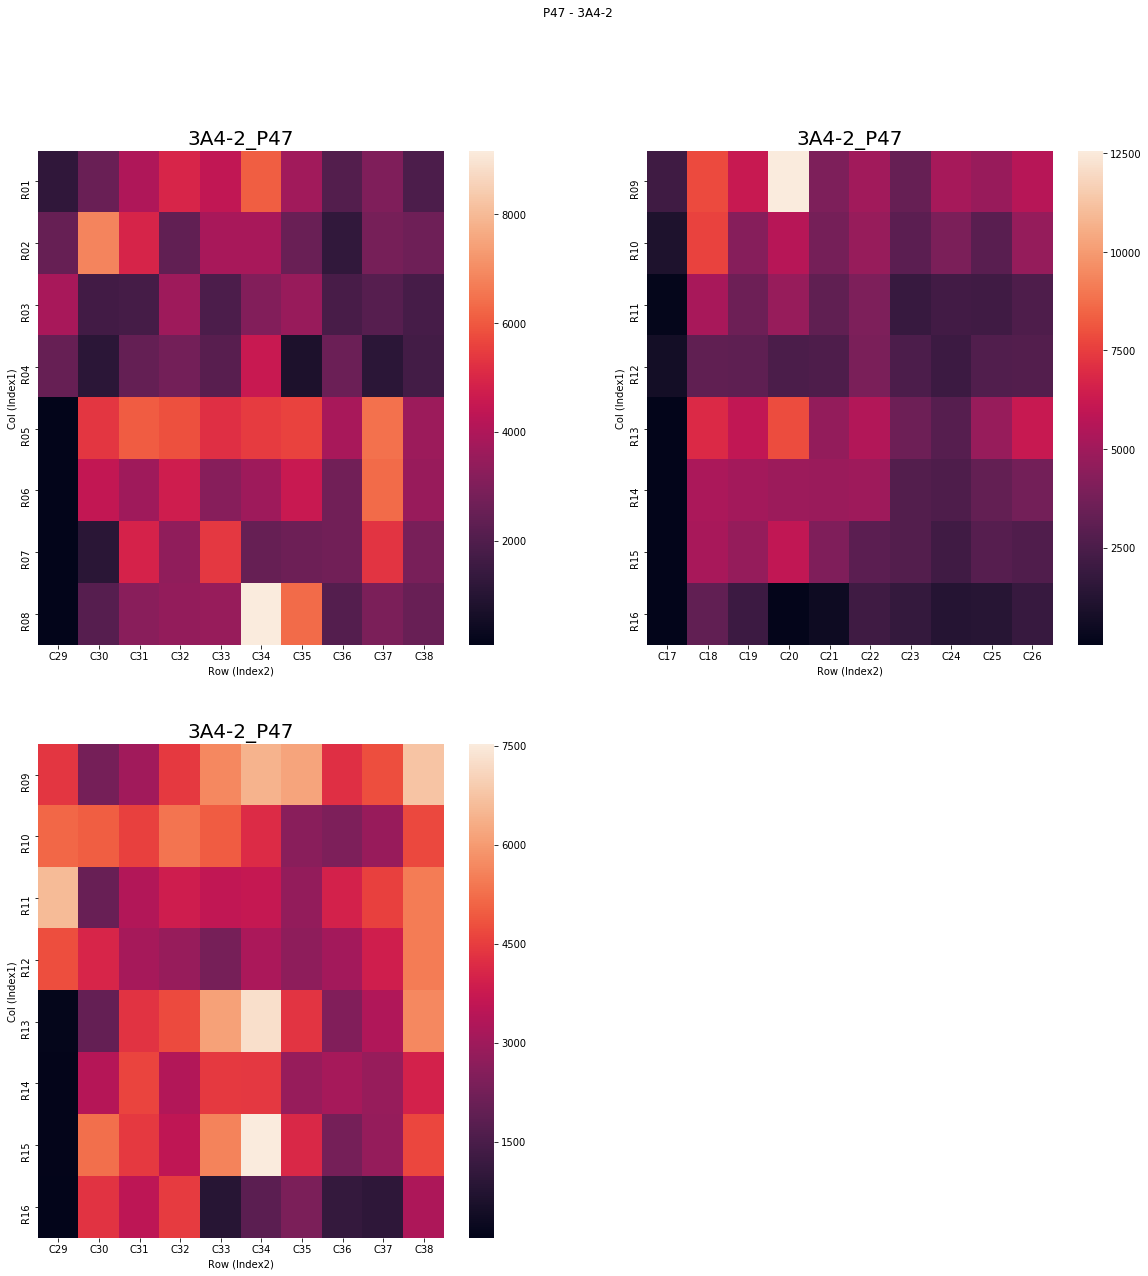

In [8]:
## Drawing one heatmap per gene (n=3) and per plate (n=24): 72 heatmaps, with UMIs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import collections
import sys
%matplotlib inline

def draw_subplot(df, x, y, n, vmin, vmax, field, title):
    specific_data = pd.pivot_table(df, values=field, index=["Row"], columns=["Column"])
    plt.subplot(x, y, n)
    plt.title(title, fontsize=20)
    ax = sns.heatmap(specific_data, vmin=vmin, vmax=vmax)
    ax.set(xlabel="Row (Index2)", ylabel="Col (Index1)")

# Importing data
data = pd.read_csv("/projects/biocompan/Finished/201609_ESPCI_Ibanez_DemultiplexHepCap_B2016/Run_L174/170614/All_filtered/L174.tsv", sep="\t", header=0)

# Indexing the plate information
genes = collections.OrderedDict()
wells = collections.OrderedDict() # {<plate_ID>: {<col_ID>: {<row_ID>: {<UMI_seq>: {<gene>: count}}}}
cols_rows_sets = collections.OrderedDict() # {<set_ID>: ["Rxx/Cxx", ..., "Rxx/Cxx"]}
plates = collections.OrderedDict() # {<plate_ID>: {"seq": XXX, "matching": ['Cxx', ..., 'Cxx', 'Rxx', ..., 'Rxx']}}
cols = collections.OrderedDict() # {<col_ID>: <col_seq>}
rows = collections.OrderedDict() # {<row_ID>: <row_seq>}
config = {}
tag = "general" # Marker to follow the progress in the config file (general > gene > col > row)
with open("/projects/biocompan/Finished/201609_ESPCI_Ibanez_DemultiplexHepCap_B2016/Run_L174/config.txt", "r") as config_file:
    for line in config_file:
        if (tag == "general") and (line.rstrip() != "##Genes"): # Getting the general config variables
            config[line.split("\t")[0]] = line.rstrip().split("\t")[1]
        elif (tag == "general") and (line.rstrip() == "##Genes"): # First line, genes part
            tag = "gene"
        elif (tag == "gene") and (line.rstrip() != "##Cols/Rows sets"): # Indexing the genes
            genes[line.split("\t")[0]] = line.rstrip().split("\t")[1]
        elif (tag == "gene") and (line.rstrip() == "##Cols/Rows sets"): # Getting to the cols/rows sets part
            tag = "sets"
        elif (tag == "sets") and (line.rstrip() != "##Plates"): # Indexing the expected cols/rows sets
            cols_rows_sets[line.split("\t")[0]] = line.strip().split("\t")[1].split(",")
        elif (tag == "sets") and (line.rstrip() == "##Plates"): # Getting to the plates part
            tag = "plate"
        elif (tag == "plate") and (line.rstrip() != "##Columns"): # Indexing the plates
            cols_rows_sets_IDs = []
            sets_list = [ids.split(",") for ids in line.rstrip().split("\t")[2:]] # List of the matching col and row barcodes per plate barcode
            for set_list in sets_list:
                new_set = []
                for col_row_id in set_list: # Transforming col/row set ID into col and row IDs list
                    new_set.append(cols_rows_sets[col_row_id])
                cols_rows_sets_IDs.append(new_set)
            plates[line.split("\t")[0]] = {"seq": line.split("\t")[1], "matching": cols_rows_sets_IDs} # Registering the expected row and col IDs for the plate
        elif (tag == "plate") and (line.rstrip() == "##Columns"): # Getting to the columns part
            tag = "col"
        elif (tag == "col") and (line.rstrip() != "##Rows"): # Indexing the columns
            cols[line.split("\t")[0]] = line.rstrip().split("\t")[1]
        elif (tag == "col") and (line.rstrip() == "##Rows"): # Getting to the rows part
            tag = "row"
        elif tag == "row": # Indexing the rows
            rows[line.split("\t")[0]] = line.rstrip().split("\t")[1]
'''
plt.figure(gene + "_" + plate_ID, figsize=(10, 10))
plt.suptitle("P42_3A4-2")
set_cols = ['C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26']
set_rows = ['R01', 'R02', 'R03', 'R04', 'R05', 'R06', 'R07', 'R08']
one_plate = data[(data["Plate"] == "P42") & (data["Column"].isin(set_cols)) & (data["Row"].isin(set_rows))]
print one_plate[["Plate", "Column", "Row", "UMI count in 3A4-2"]]
print one_plate.head(2)
draw_subplot(one_plate, 1, 1, 1, None, None, "UMI count in " + gene, plate_ID + "_" + gene)
'''

for plate_ID in plates:
#for plate_ID in ["P42"]:
    for gene in genes:
    #for gene in ["3A4-2"]:
        plt.figure(gene + "_" + plate_ID, figsize=(20, 20))
        plt.suptitle(plate_ID + " - " + gene)
        n = 1
        xs = [1, 1, 2, 2]
        ys = [1, 2, 1, 2]
        for cols_rows_set in plates[plate_ID]["matching"]:
            one_plate = data[(data["Plate"] == plate_ID) & (data["Column"].isin(cols_rows_set[0])) & (data["Row"].isin(cols_rows_set[1]))]
            #print one_plate[["Plate", "Column", "Row", "UMI count in 3A4-2"]]
            #specific_data = pd.pivot_table(one_plate, values="UMI count in B2M", index=["Row"], columns=["Column"])
            draw_subplot(one_plate, 2, 2, n, None, None, "UMI count in " + gene, gene + "_" + plate_ID)
            n += 1
        plt.savefig("/data/biocomp/bahin/" + gene + "_" + plate_ID + ".pdf", format="pdf")

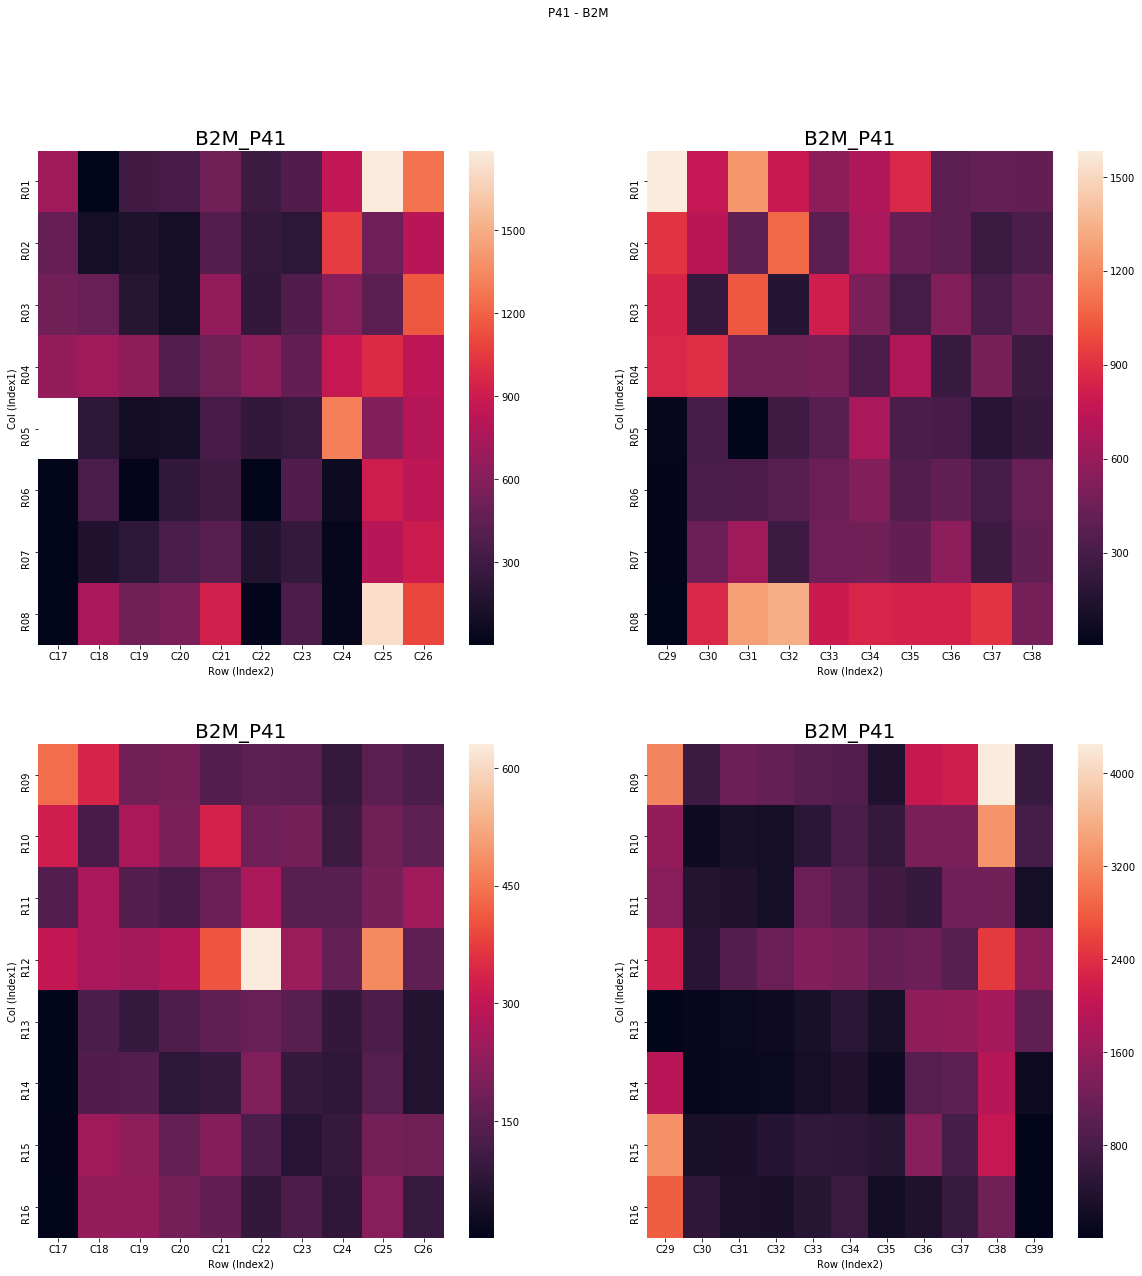

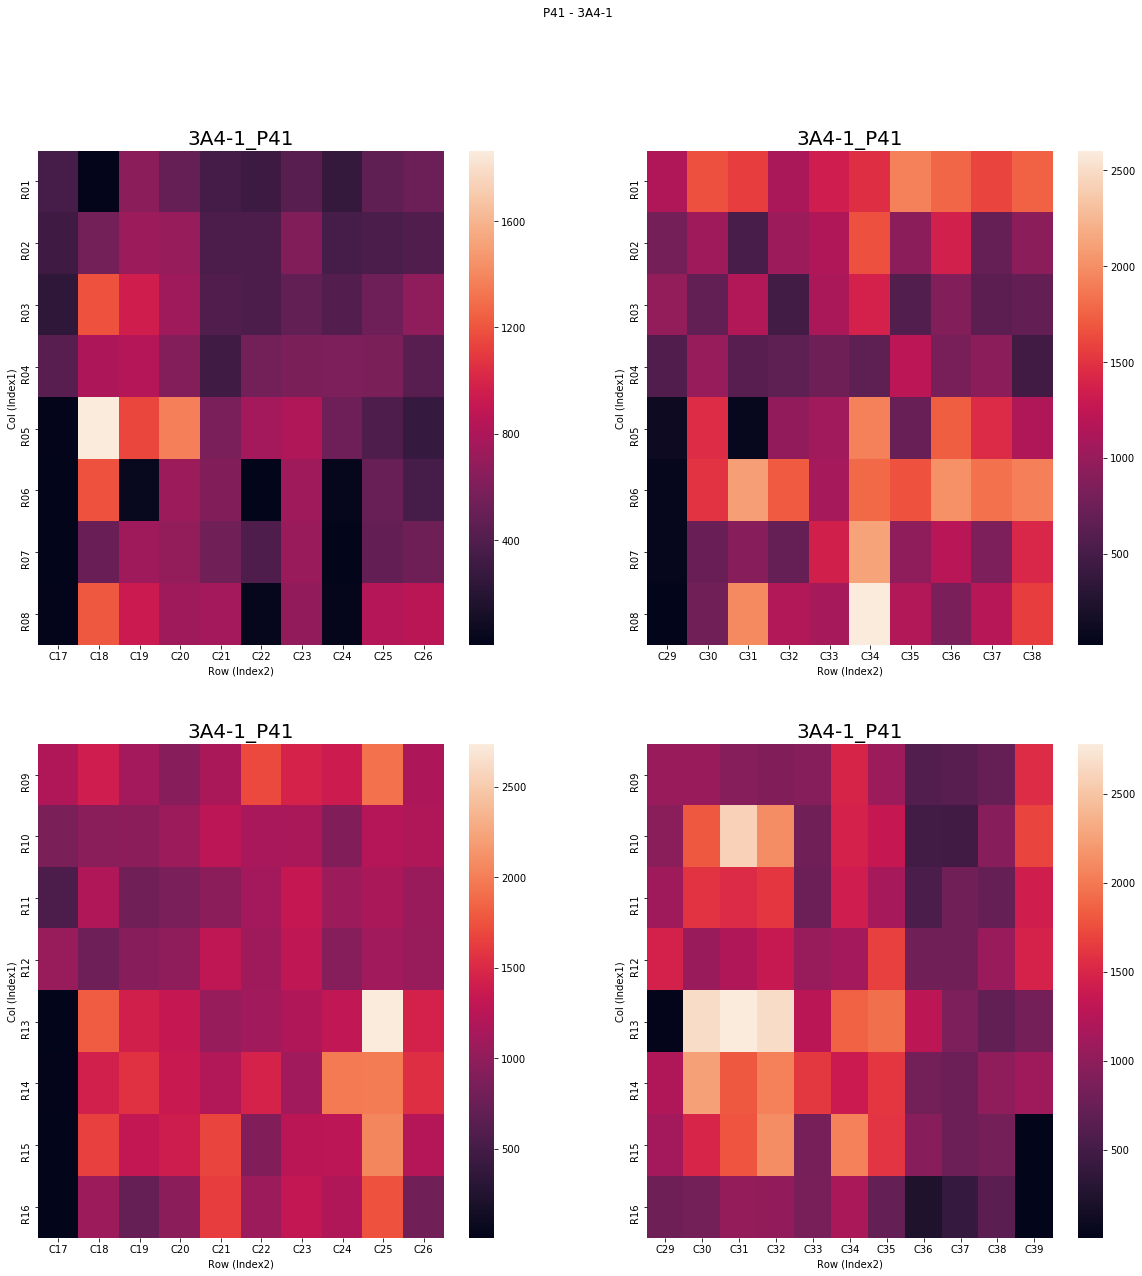

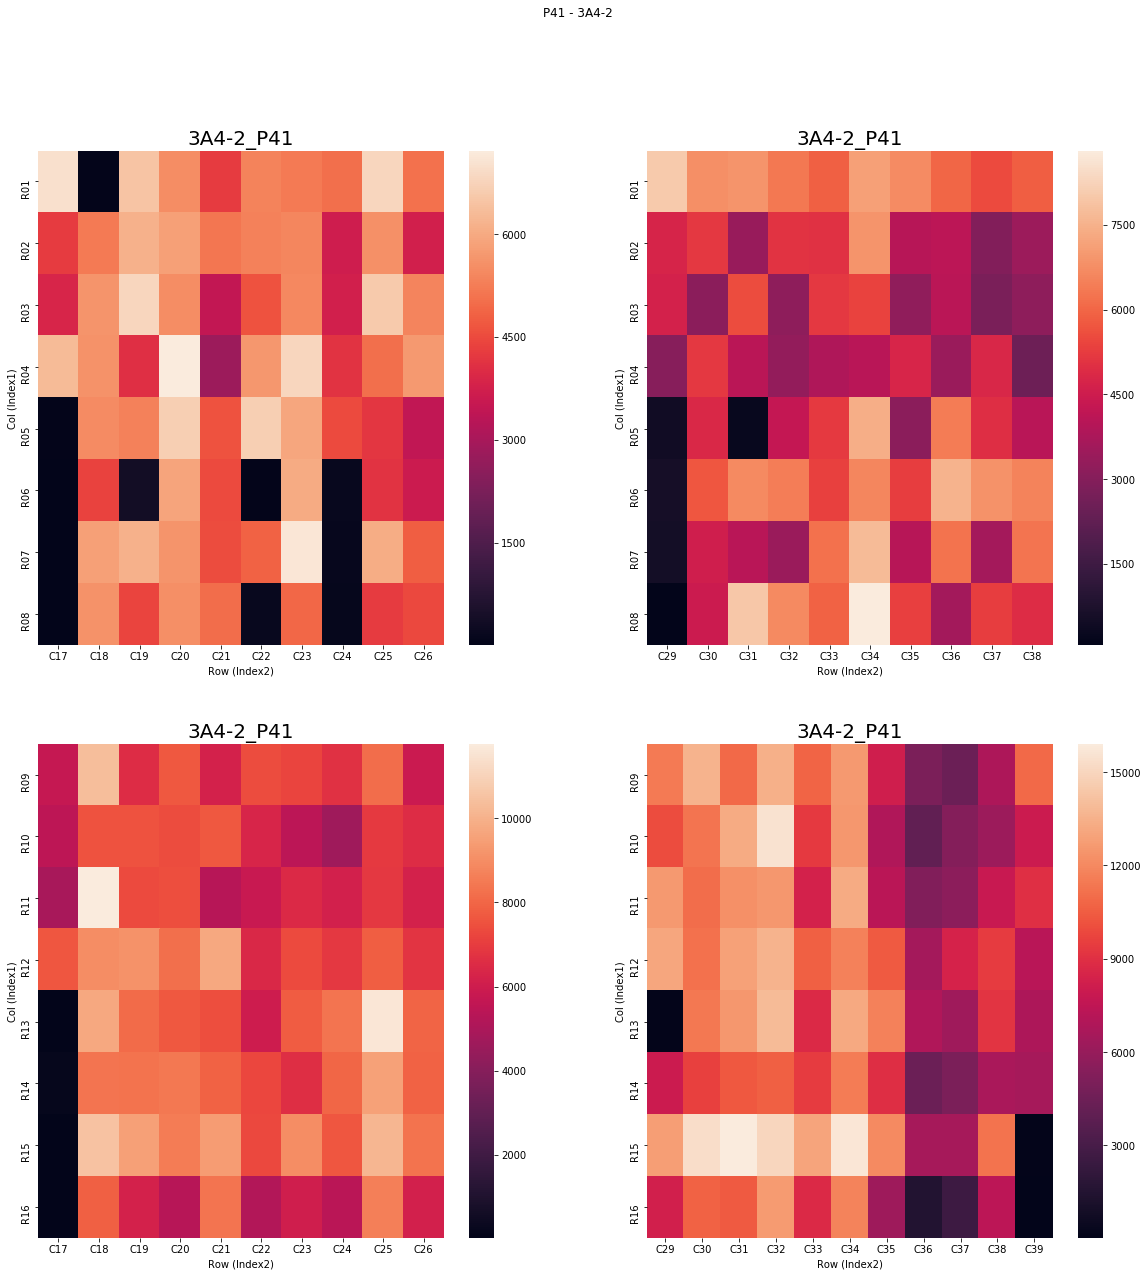

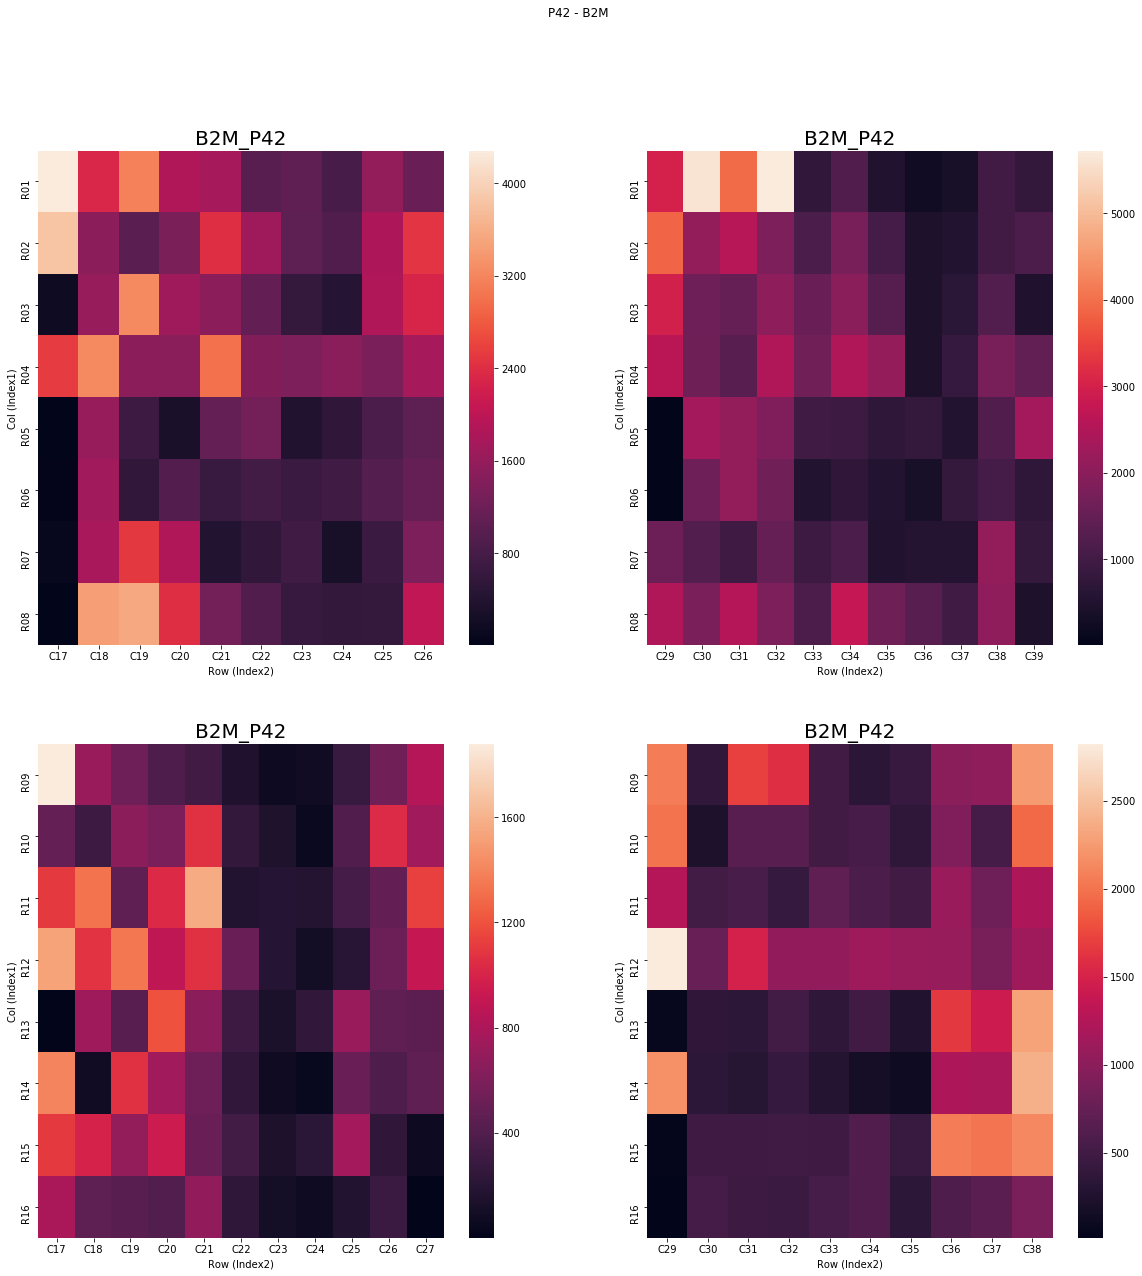

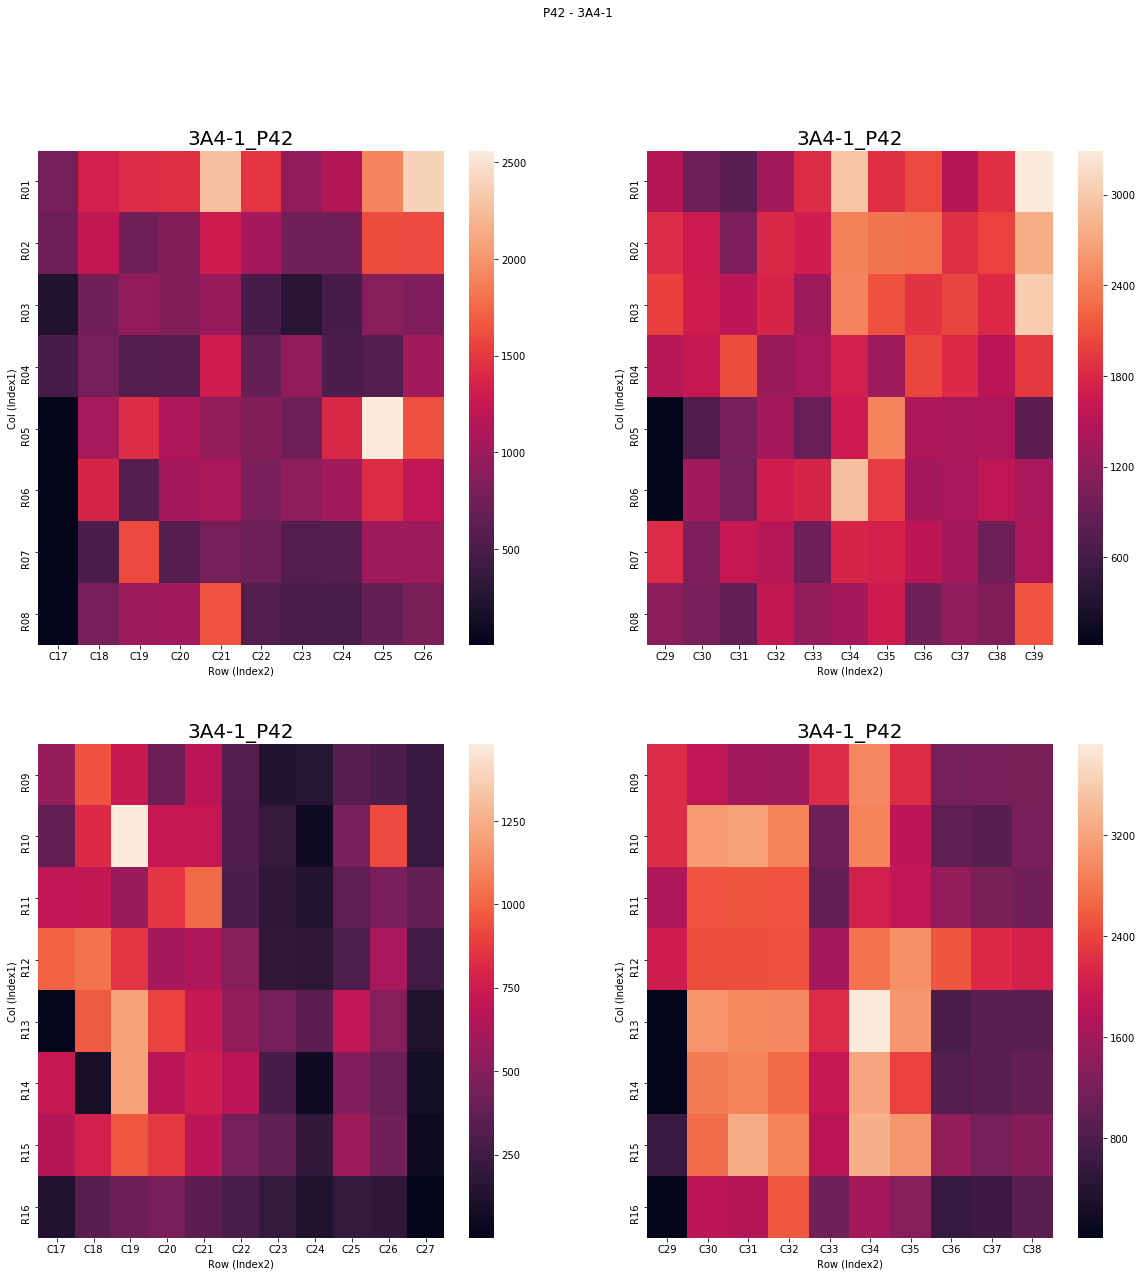

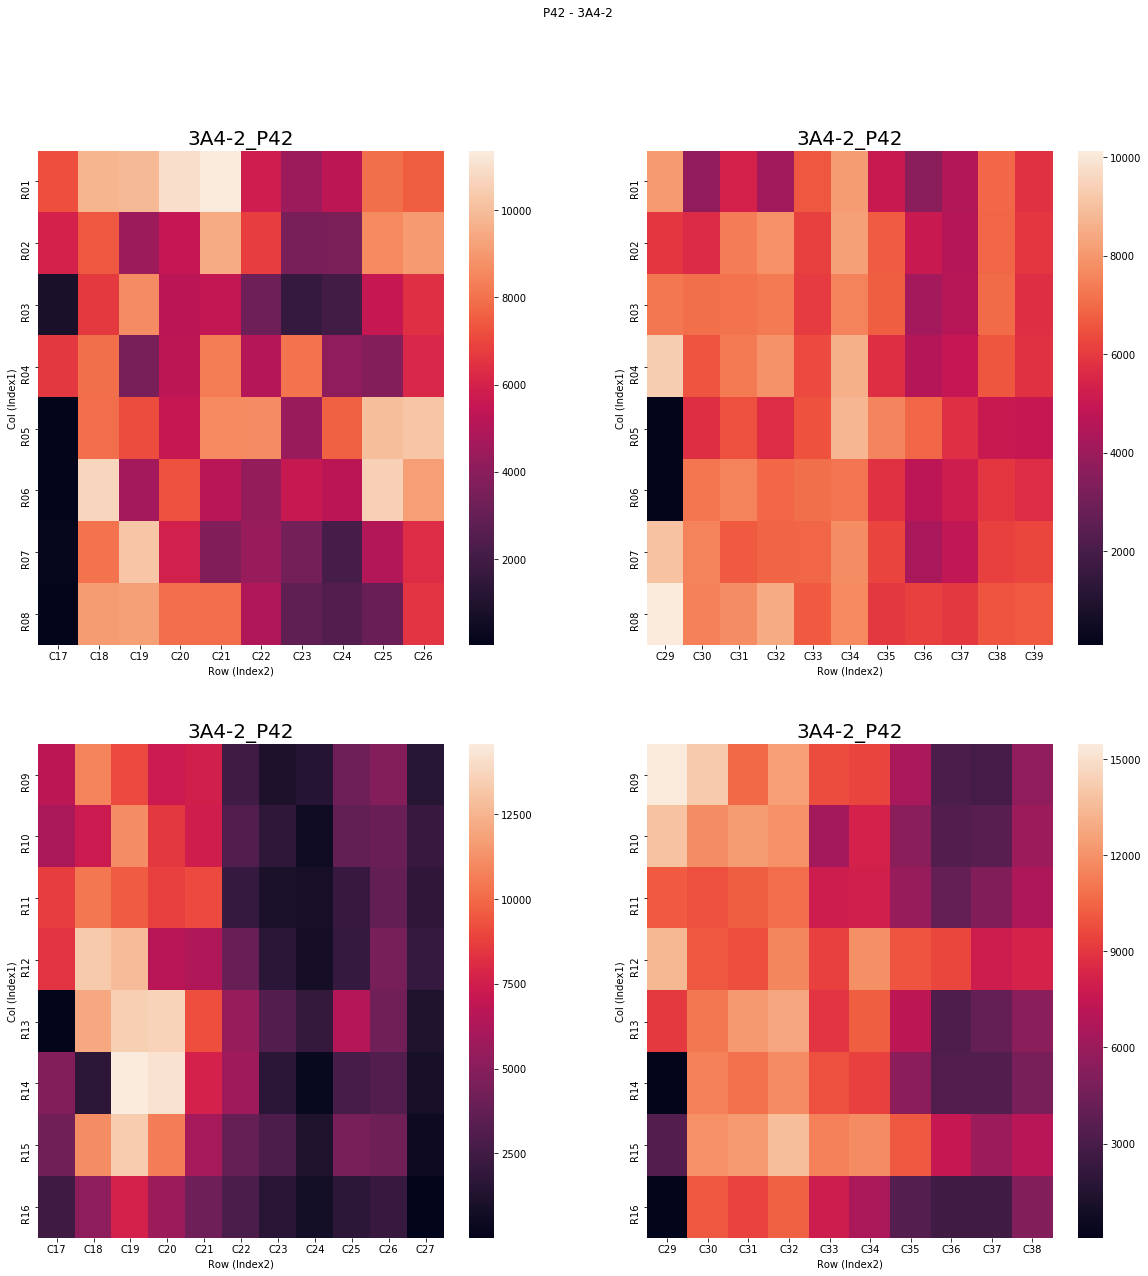

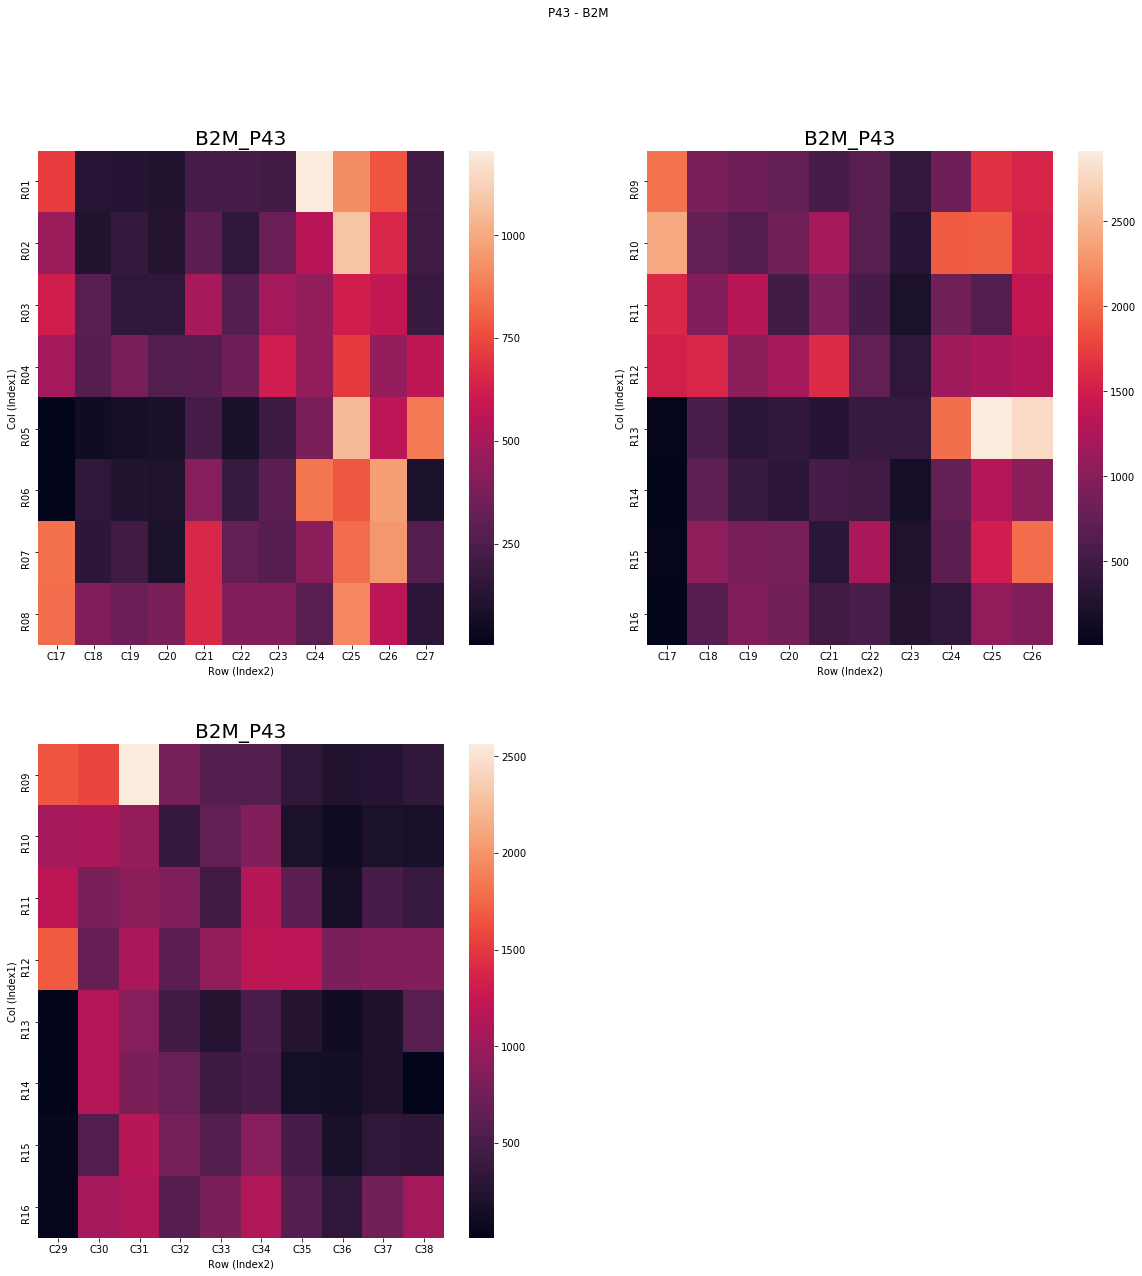

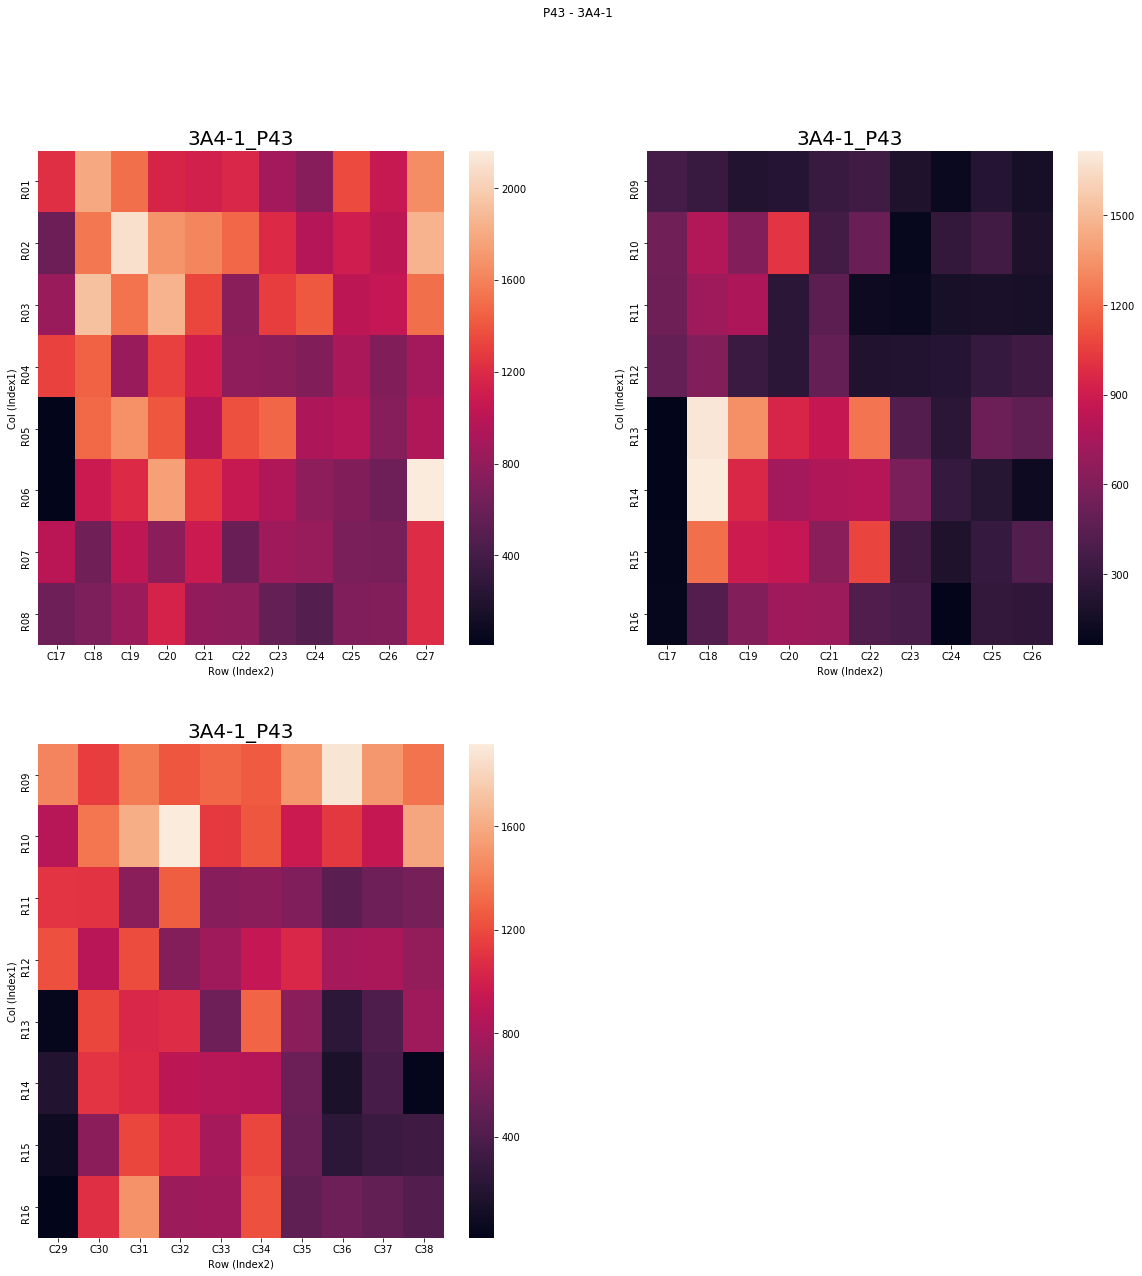

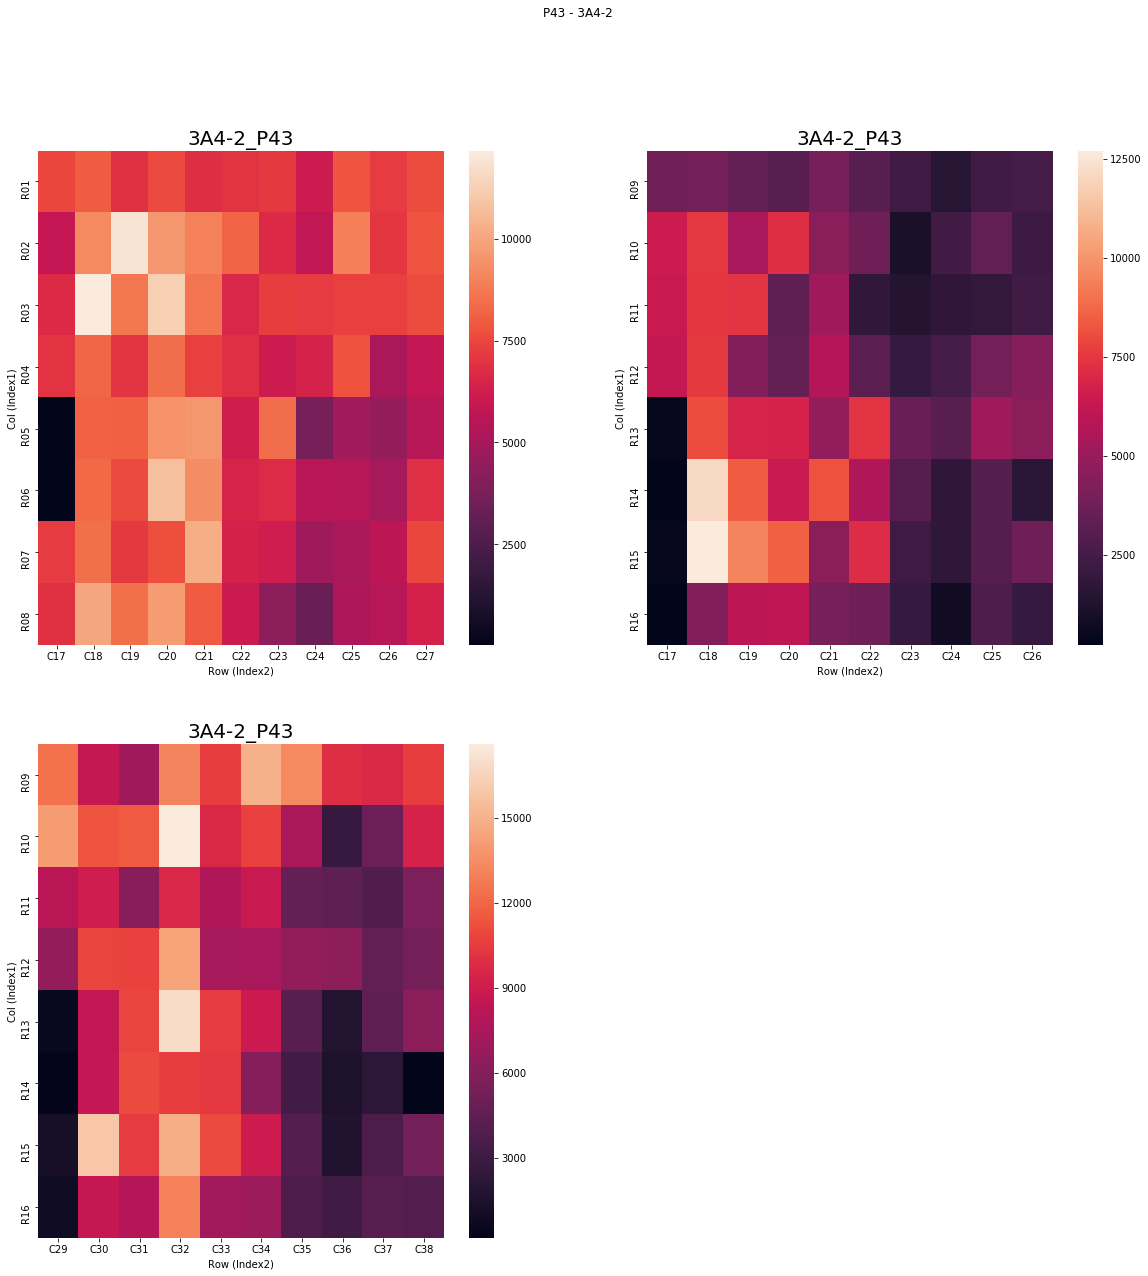

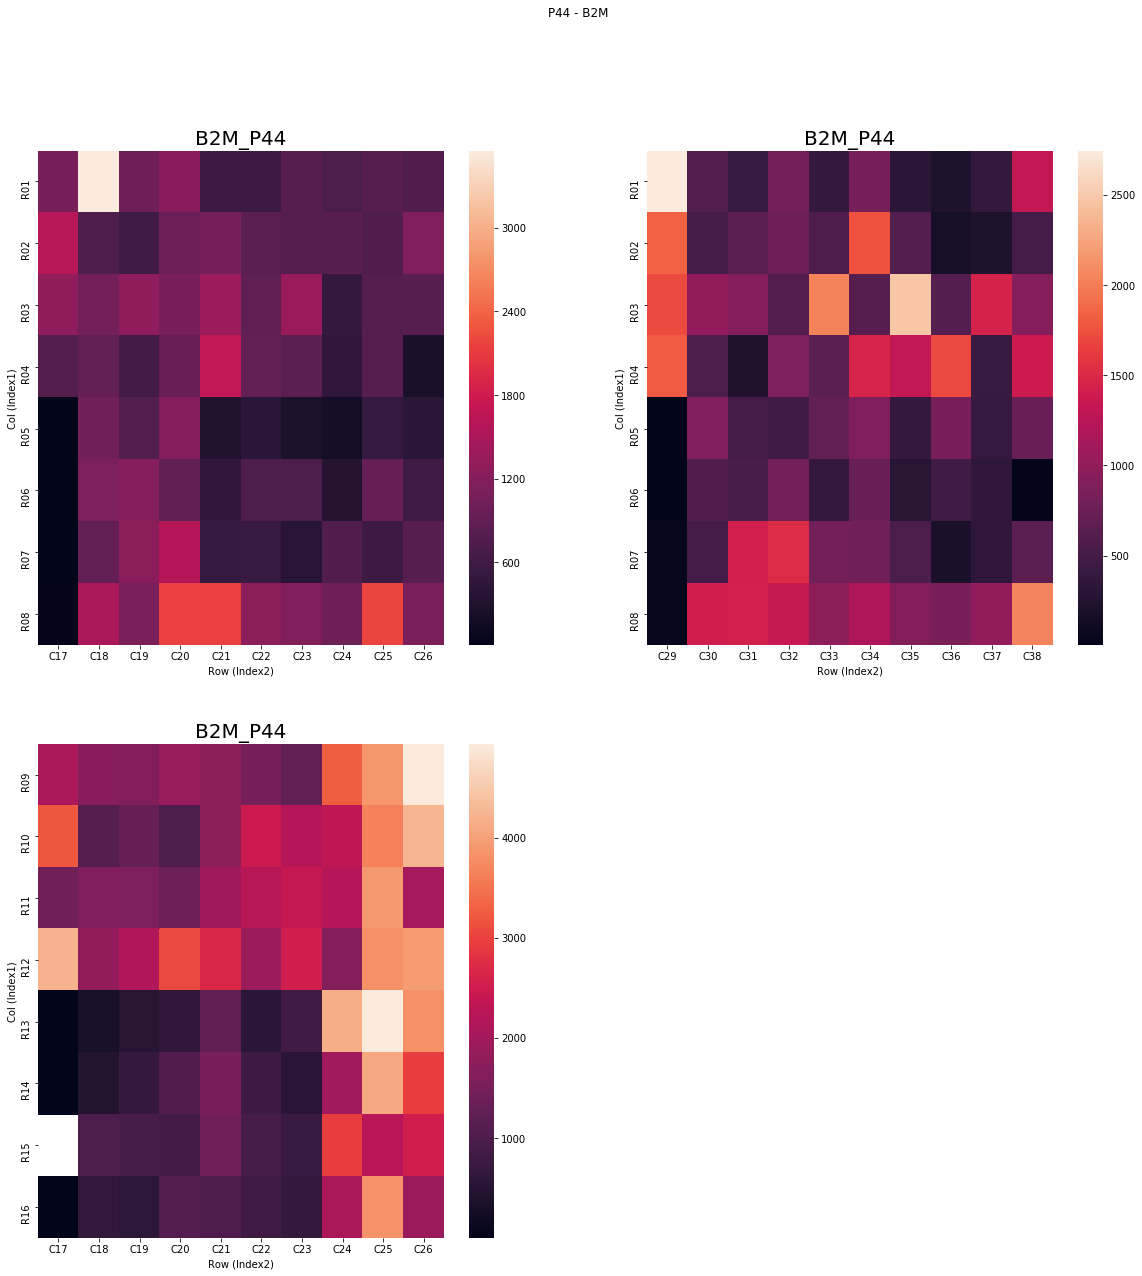

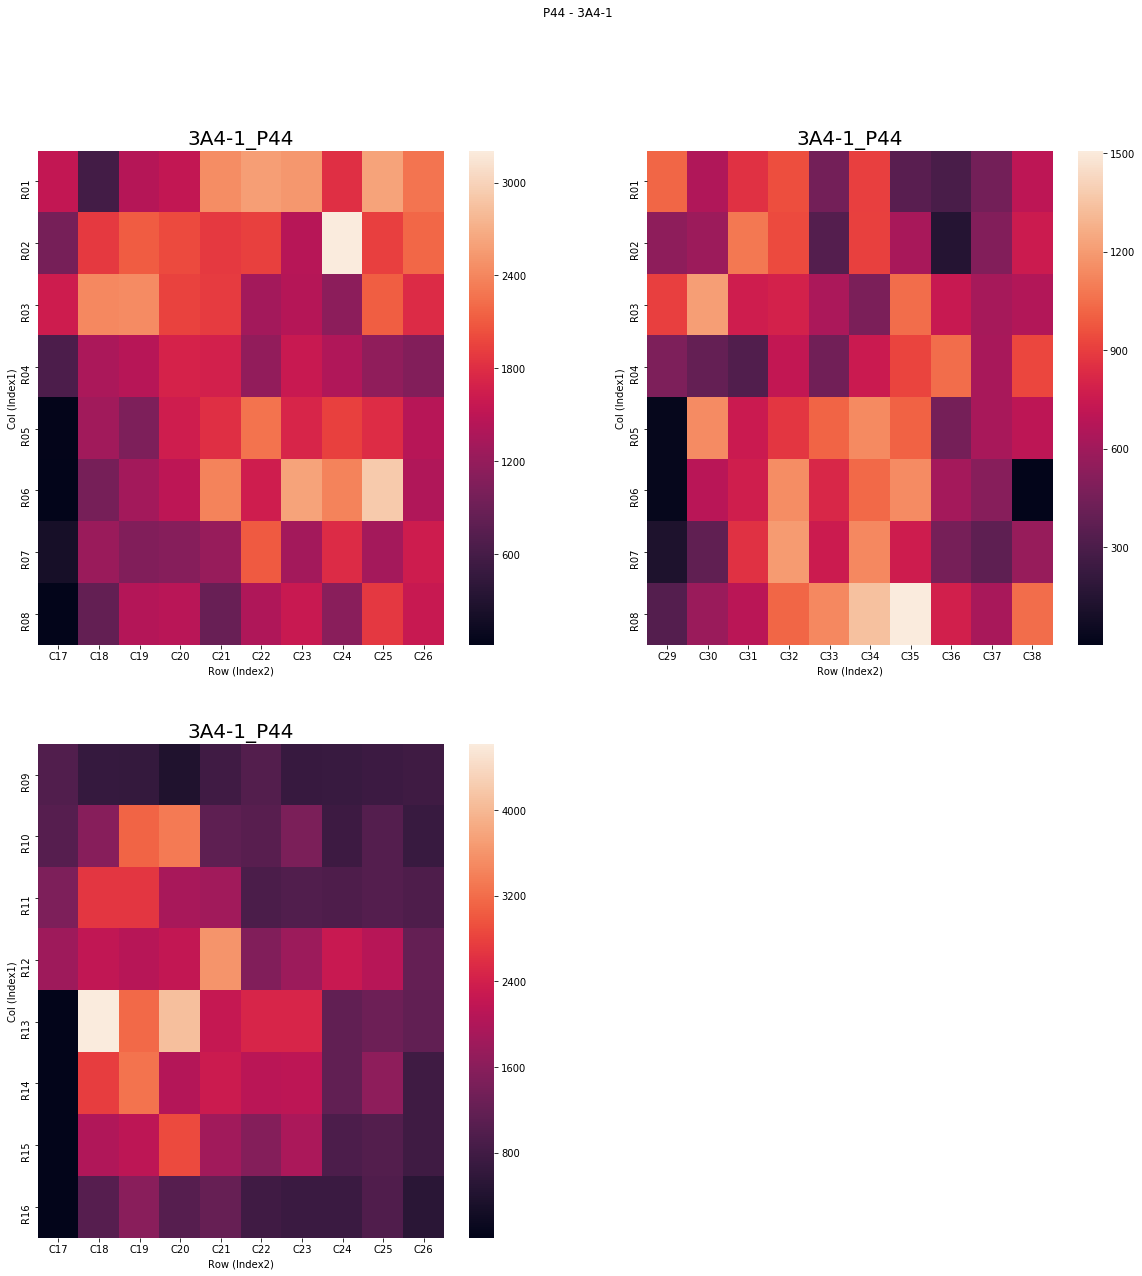

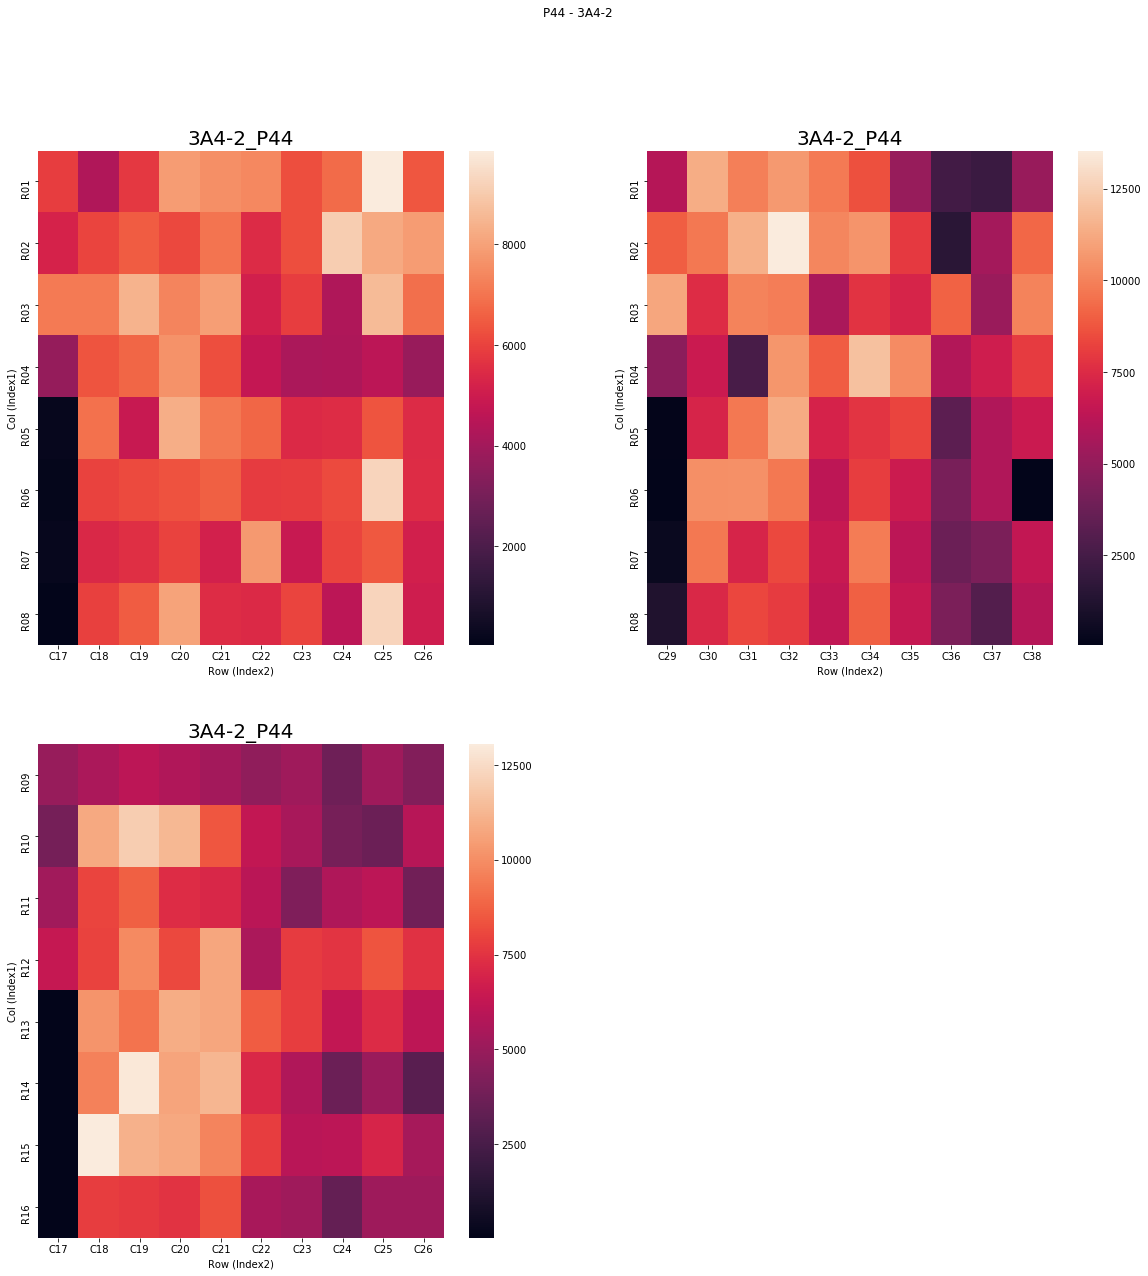

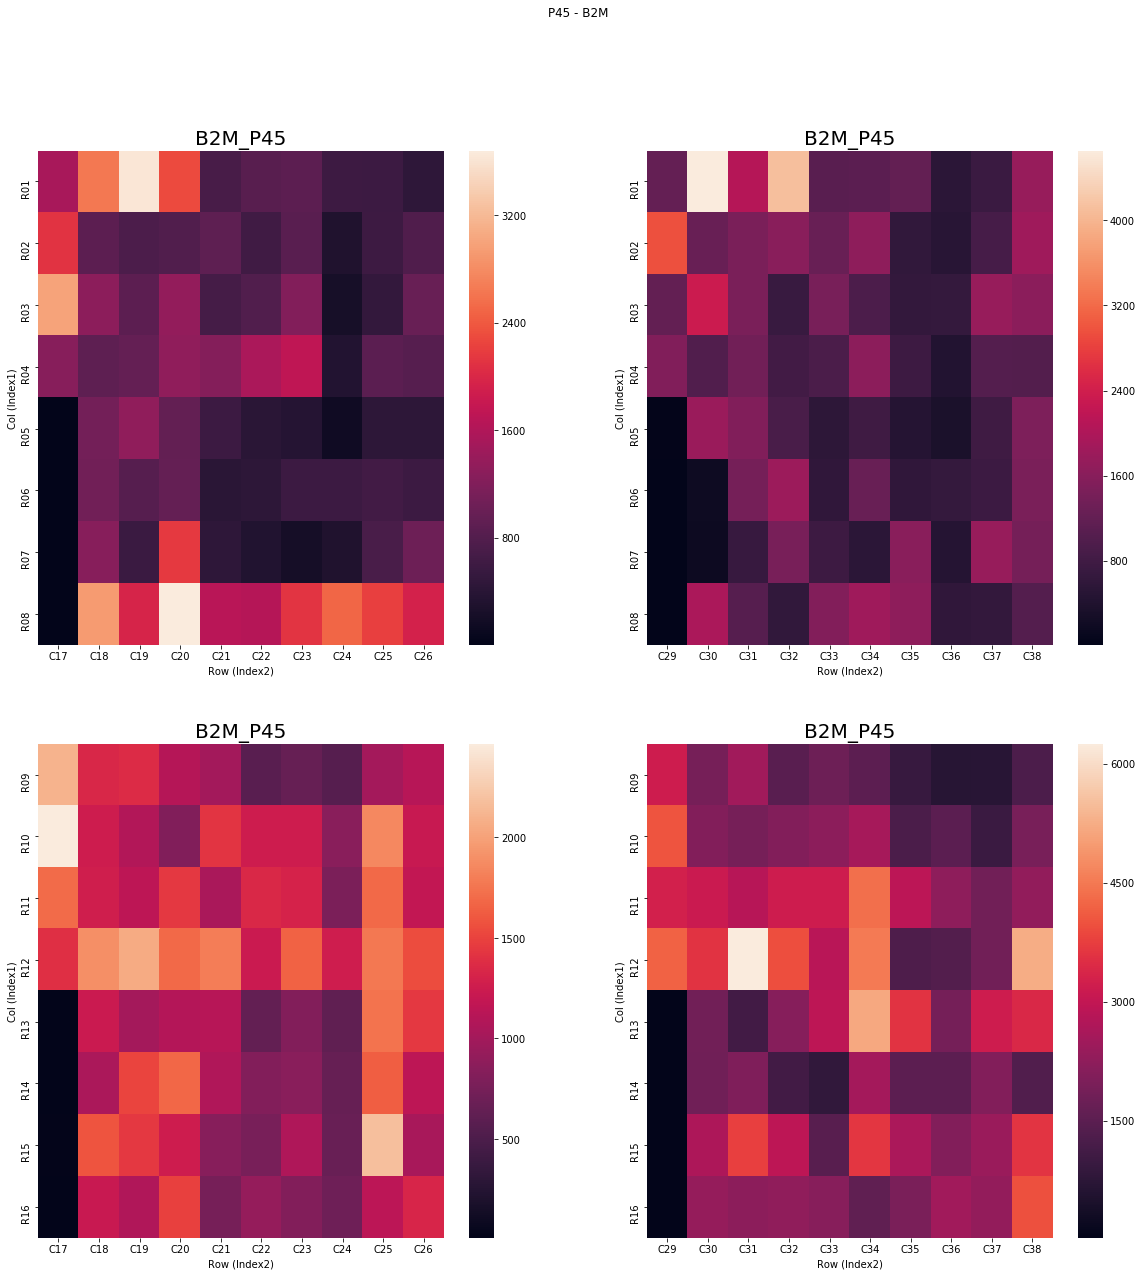

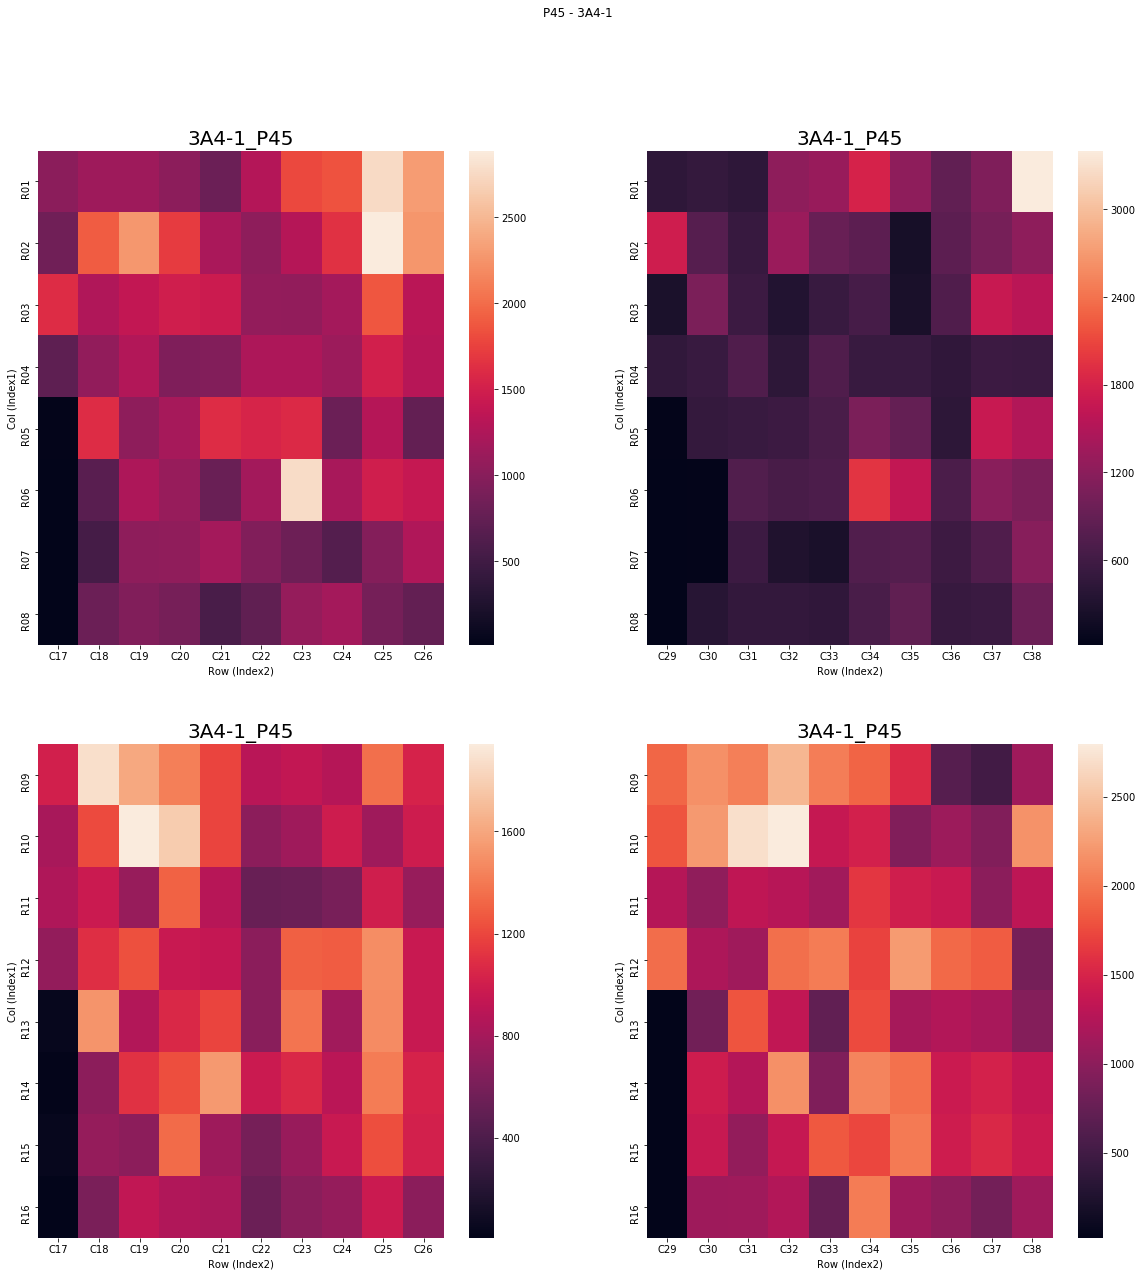

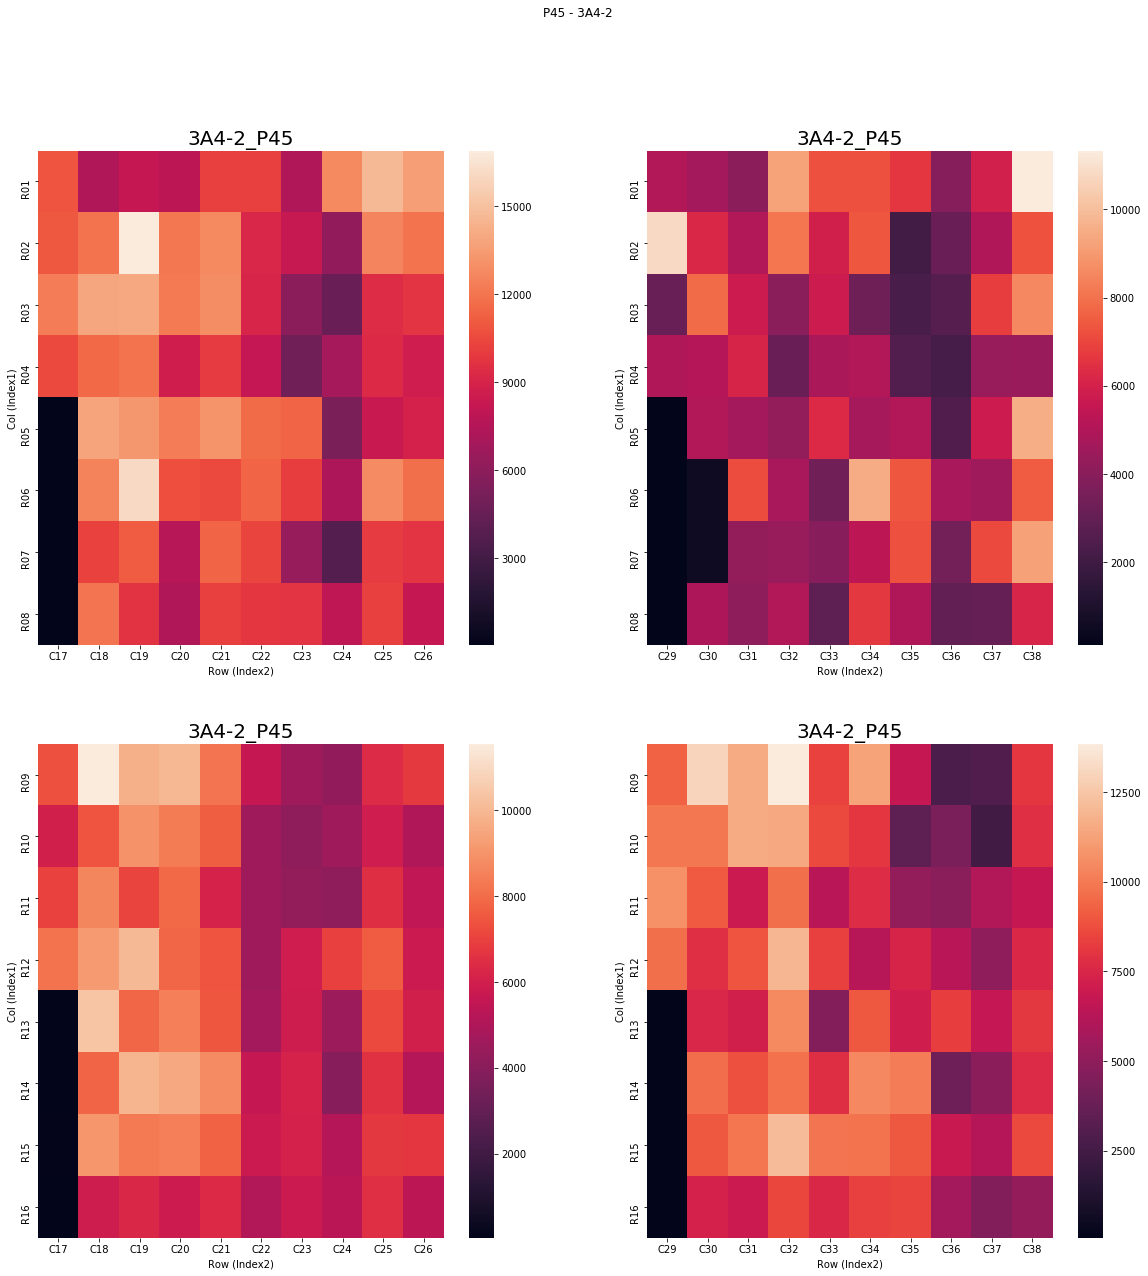

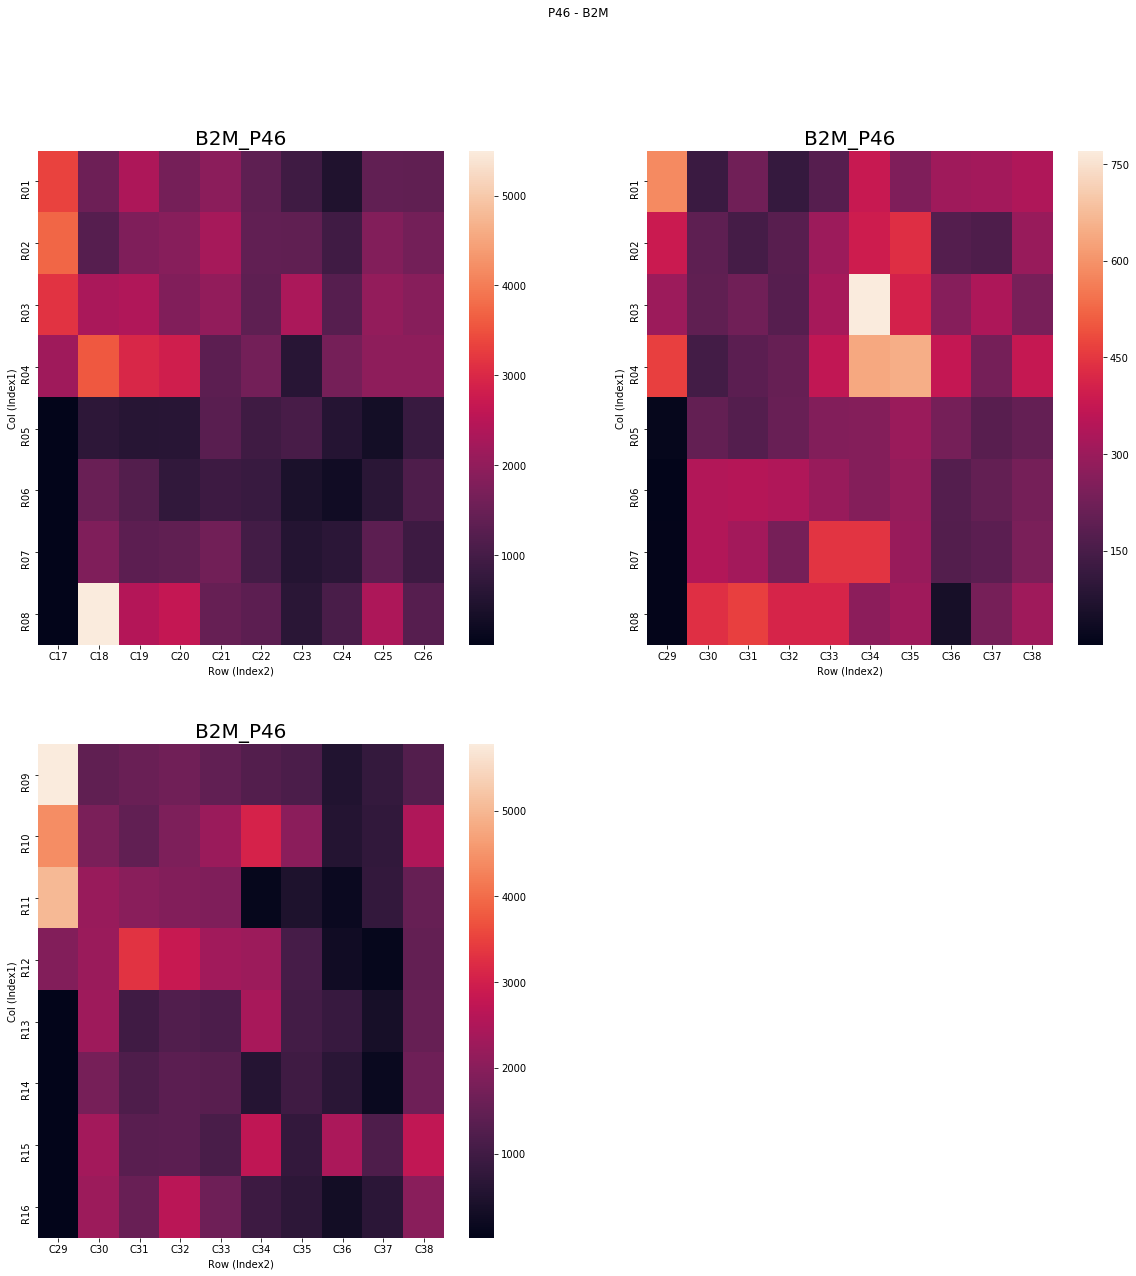

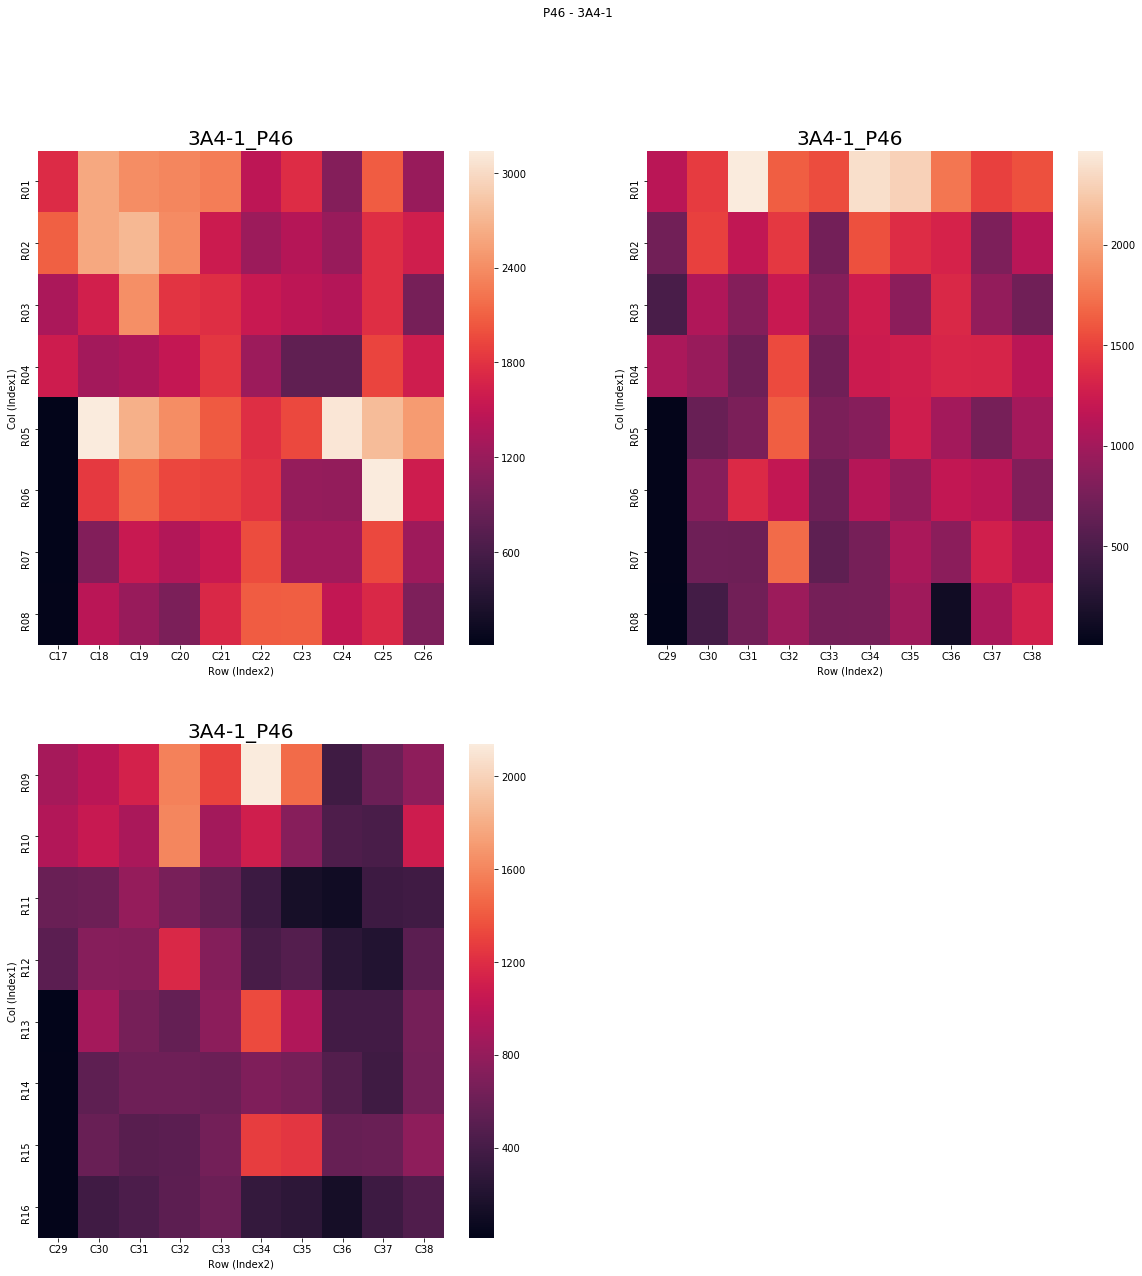

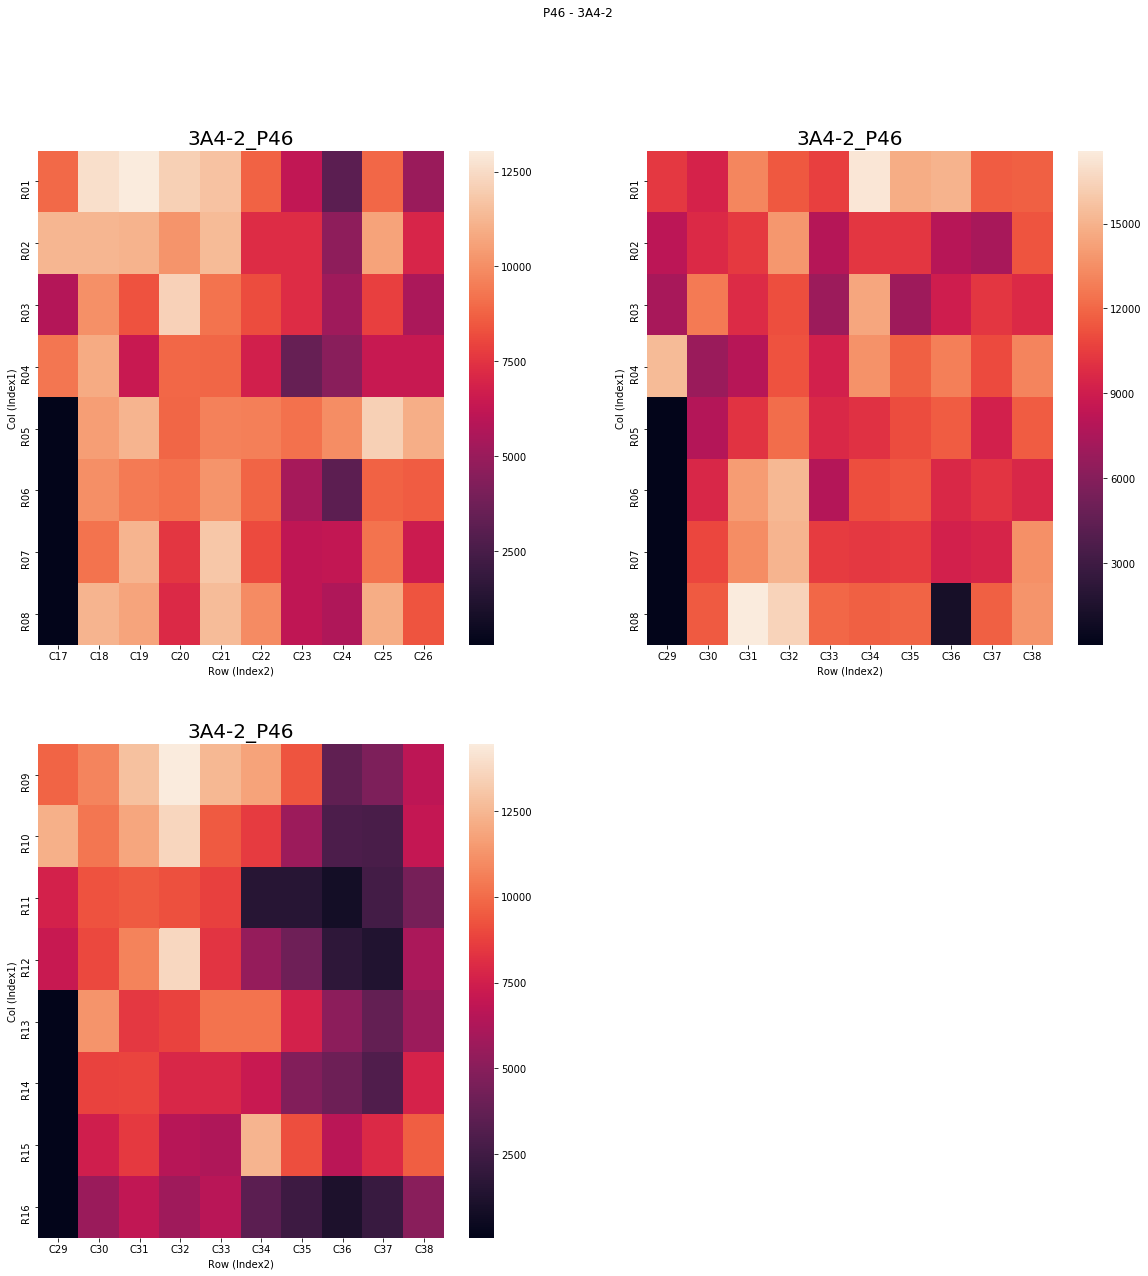

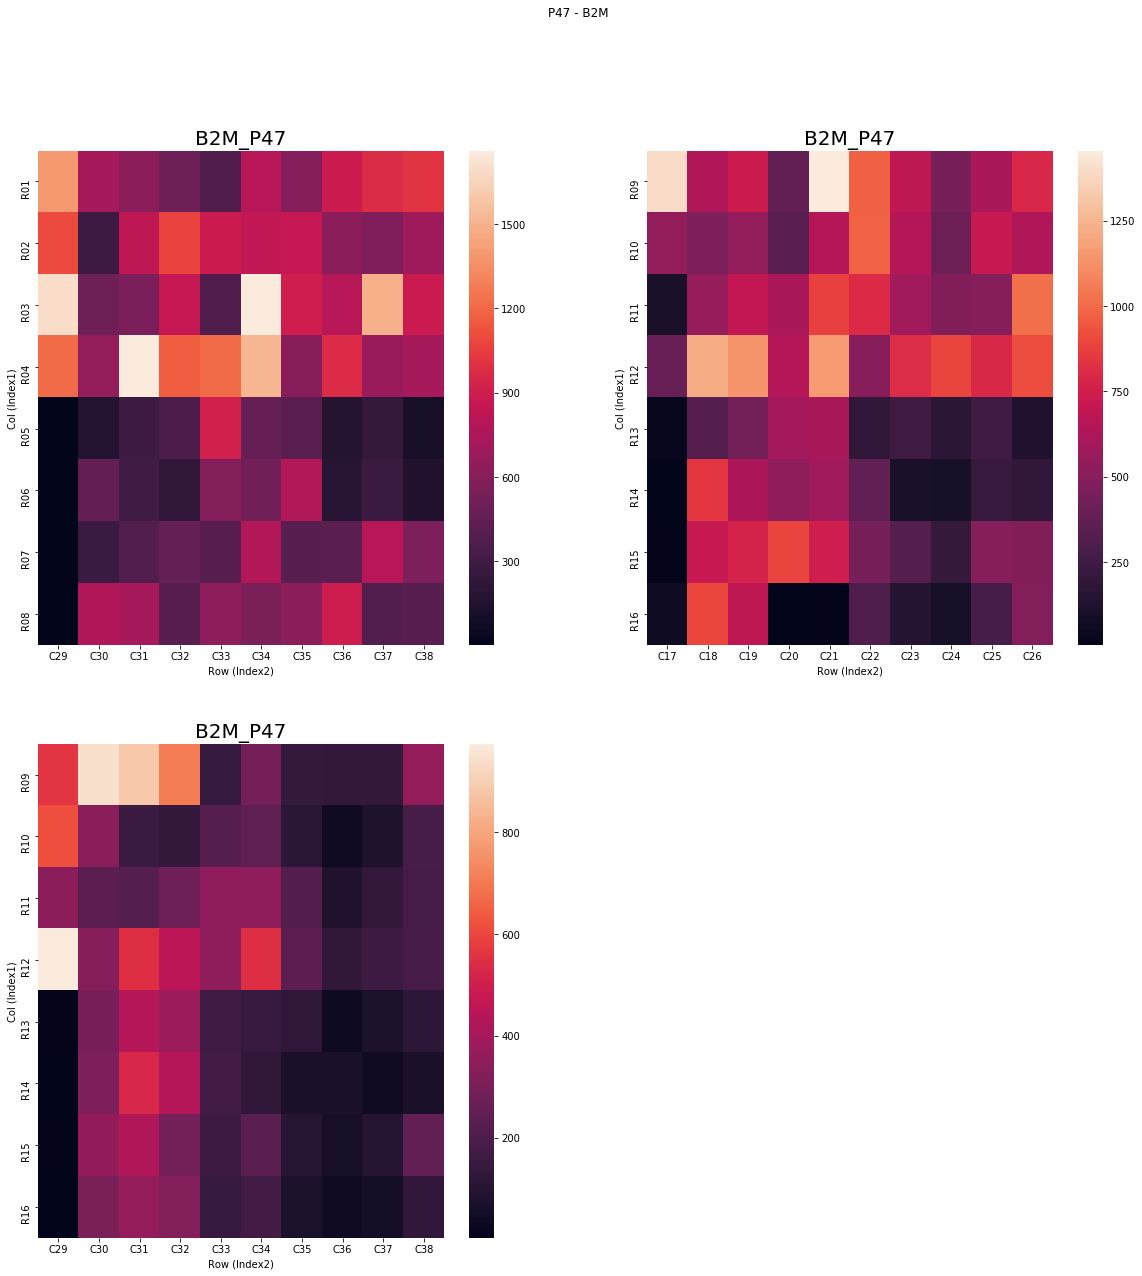

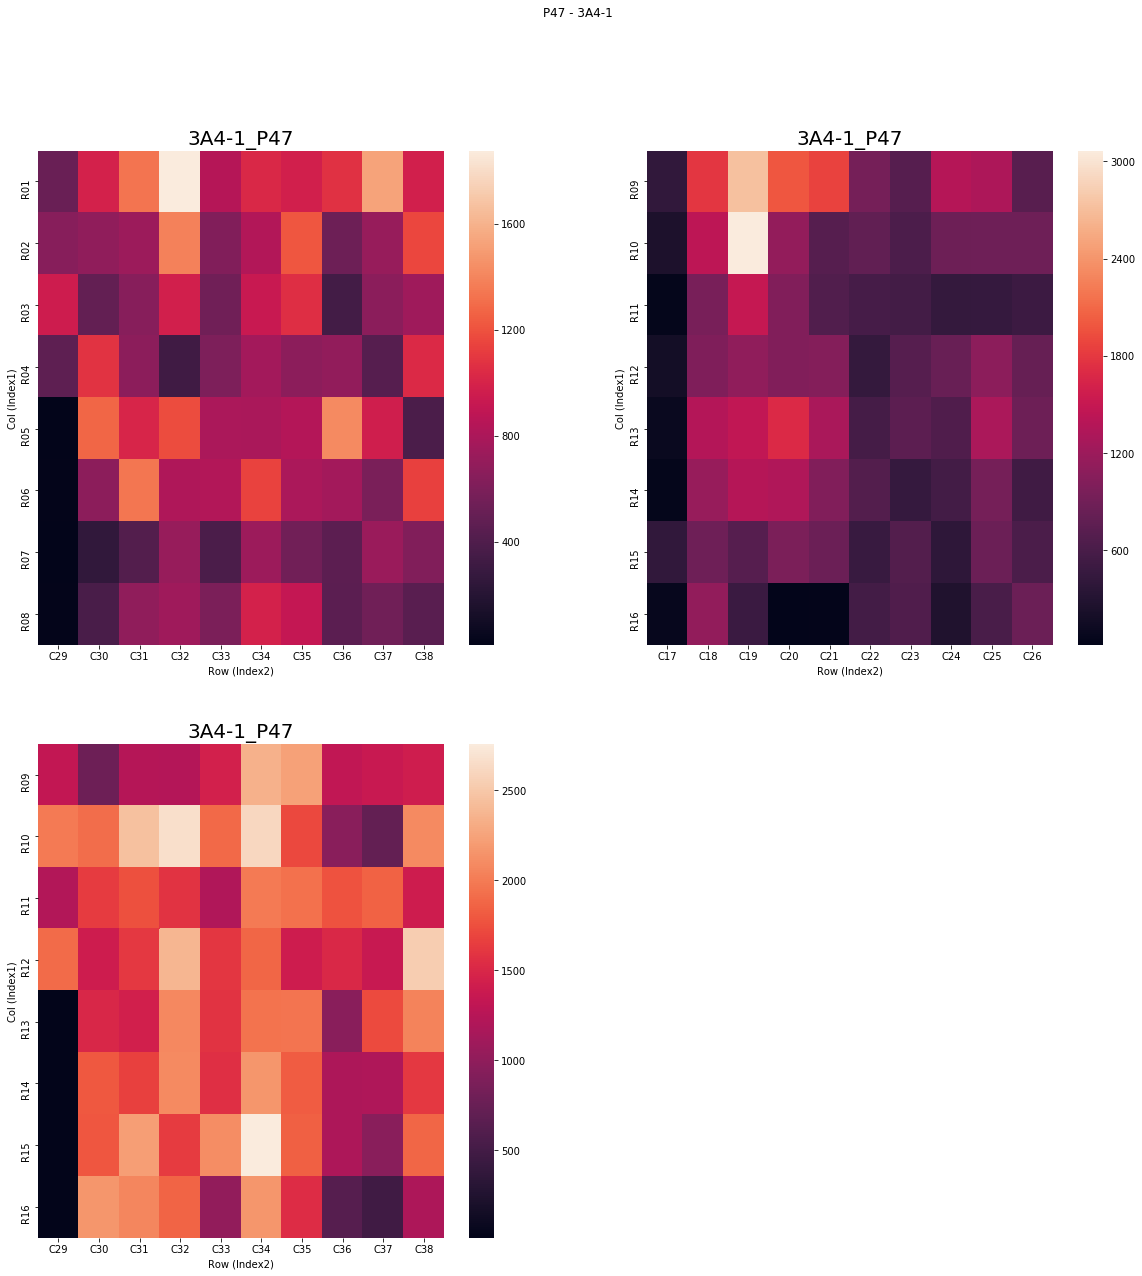

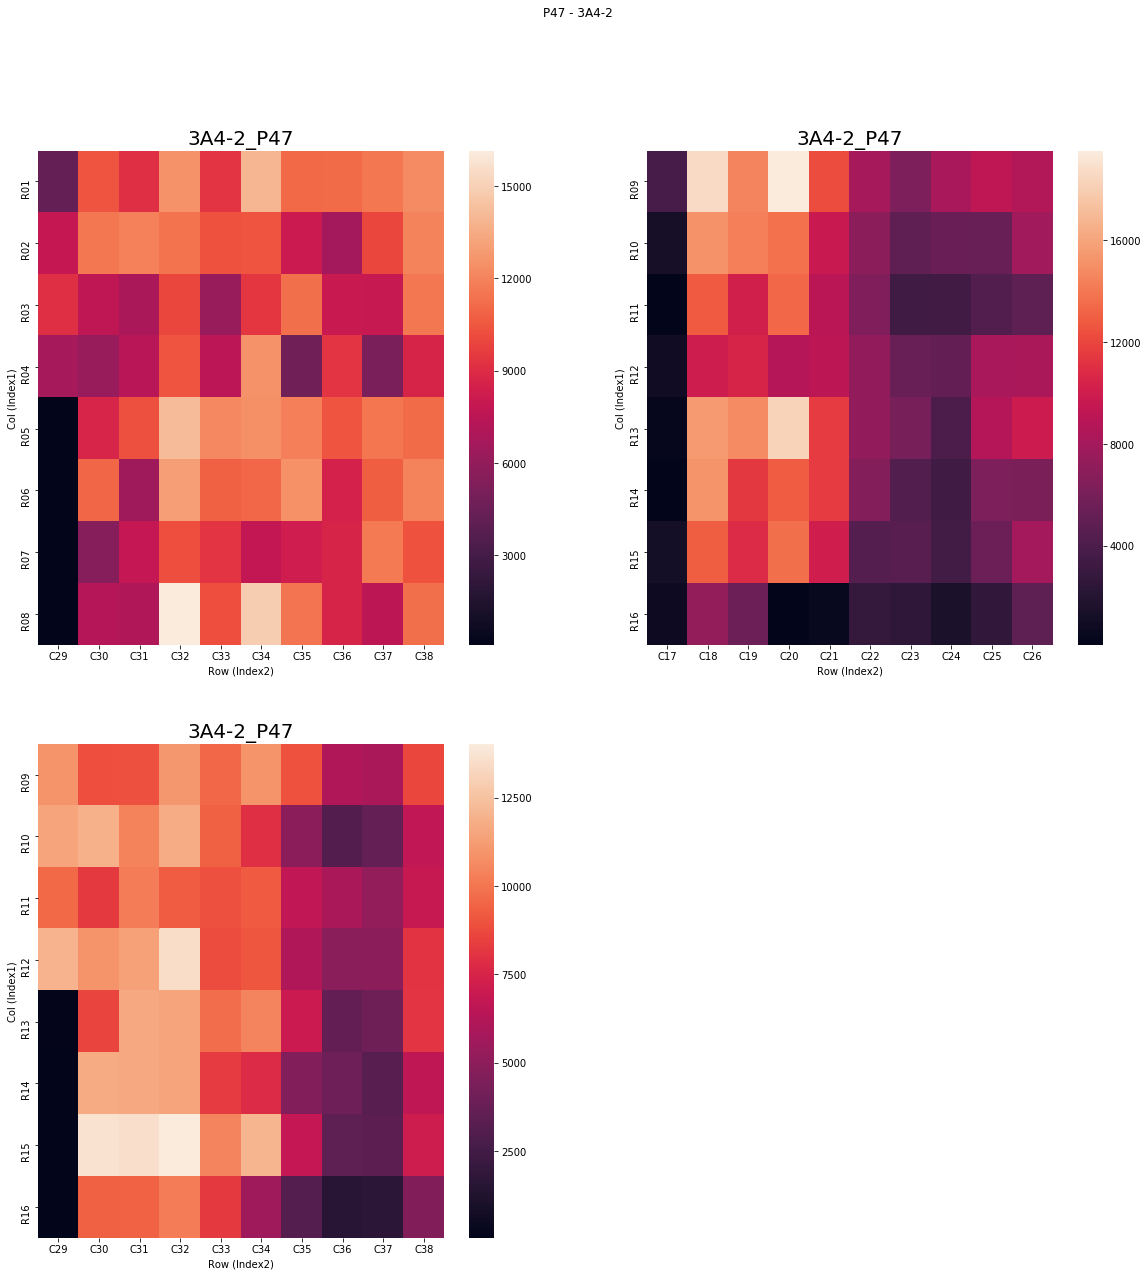

In [7]:
## Drawing one heatmap per gene (n=3) and per plate (n=24): 72 heatmaps, without UMIs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import collections
import sys
%matplotlib inline

def draw_subplot(df, x, y, n, vmin, vmax, field, title):
    specific_data = pd.pivot_table(df, values=field, index=["Row"], columns=["Column"])
    plt.subplot(x, y, n)
    plt.title(title, fontsize=20)
    ax = sns.heatmap(specific_data, vmin=vmin, vmax=vmax)
    ax.set(xlabel="Row (Index2)", ylabel="Col (Index1)")

# Importing data
#data = pd.read_csv("/projects/biocompan/Finished/201609_ESPCI_Ibanez_DemultiplexHepCap_B2016/Run_L174/170614/All_filtered/L174.tsv", sep="\t", header=0)
data = pd.read_csv("/projects/biocompan/Finished/201609_ESPCI_Ibanez_DemultiplexHepCap_B2016/Run_L174/Test_no_UMI/L174.tsv", sep="\t", header=0)

# Indexing the plate information
genes = collections.OrderedDict()
wells = collections.OrderedDict() # {<plate_ID>: {<col_ID>: {<row_ID>: {<UMI_seq>: {<gene>: count}}}}
cols_rows_sets = collections.OrderedDict() # {<set_ID>: ["Rxx/Cxx", ..., "Rxx/Cxx"]}
plates = collections.OrderedDict() # {<plate_ID>: {"seq": XXX, "matching": ['Cxx', ..., 'Cxx', 'Rxx', ..., 'Rxx']}}
cols = collections.OrderedDict() # {<col_ID>: <col_seq>}
rows = collections.OrderedDict() # {<row_ID>: <row_seq>}
config = {}
tag = "general" # Marker to follow the progress in the config file (general > gene > col > row)
with open("/projects/biocompan/Finished/201609_ESPCI_Ibanez_DemultiplexHepCap_B2016/Run_L174/config.txt", "r") as config_file:
    for line in config_file:
        if (tag == "general") and (line.rstrip() != "##Genes"): # Getting the general config variables
            config[line.split("\t")[0]] = line.rstrip().split("\t")[1]
        elif (tag == "general") and (line.rstrip() == "##Genes"): # First line, genes part
            tag = "gene"
        elif (tag == "gene") and (line.rstrip() != "##Cols/Rows sets"): # Indexing the genes
            genes[line.split("\t")[0]] = line.rstrip().split("\t")[1]
        elif (tag == "gene") and (line.rstrip() == "##Cols/Rows sets"): # Getting to the cols/rows sets part
            tag = "sets"
        elif (tag == "sets") and (line.rstrip() != "##Plates"): # Indexing the expected cols/rows sets
            cols_rows_sets[line.split("\t")[0]] = line.strip().split("\t")[1].split(",")
        elif (tag == "sets") and (line.rstrip() == "##Plates"): # Getting to the plates part
            tag = "plate"
        elif (tag == "plate") and (line.rstrip() != "##Columns"): # Indexing the plates
            cols_rows_sets_IDs = []
            sets_list = [ids.split(",") for ids in line.rstrip().split("\t")[2:]] # List of the matching col and row barcodes per plate barcode
            for set_list in sets_list:
                new_set = []
                for col_row_id in set_list: # Transforming col/row set ID into col and row IDs list
                    new_set.append(cols_rows_sets[col_row_id])
                cols_rows_sets_IDs.append(new_set)
            plates[line.split("\t")[0]] = {"seq": line.split("\t")[1], "matching": cols_rows_sets_IDs} # Registering the expected row and col IDs for the plate
        elif (tag == "plate") and (line.rstrip() == "##Columns"): # Getting to the columns part
            tag = "col"
        elif (tag == "col") and (line.rstrip() != "##Rows"): # Indexing the columns
            cols[line.split("\t")[0]] = line.rstrip().split("\t")[1]
        elif (tag == "col") and (line.rstrip() == "##Rows"): # Getting to the rows part
            tag = "row"
        elif tag == "row": # Indexing the rows
            rows[line.split("\t")[0]] = line.rstrip().split("\t")[1]
'''
plt.figure(gene + "_" + plate_ID, figsize=(10, 10))
plt.suptitle("P42_3A4-2")
set_cols = ['C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26']
set_rows = ['R01', 'R02', 'R03', 'R04', 'R05', 'R06', 'R07', 'R08']
one_plate = data[(data["Plate"] == "P42") & (data["Column"].isin(set_cols)) & (data["Row"].isin(set_rows))]
print one_plate[["Plate", "Column", "Row", "UMI count in 3A4-2"]]
print one_plate.head(2)
draw_subplot(one_plate, 1, 1, 1, None, None, "UMI count in " + gene, plate_ID + "_" + gene)
'''

for plate_ID in plates:
#for plate_ID in ["P42"]:
    for gene in genes:
    #for gene in ["3A4-2"]:
        plt.figure(gene + "_" + plate_ID, figsize=(20, 20))
        plt.suptitle(plate_ID + " - " + gene)
        n = 1
        xs = [1, 1, 2, 2]
        ys = [1, 2, 1, 2]
        for cols_rows_set in plates[plate_ID]["matching"]:
            one_plate = data[(data["Plate"] == plate_ID) & (data["Column"].isin(cols_rows_set[0])) & (data["Row"].isin(cols_rows_set[1]))]
            #print one_plate[["Plate", "Column", "Row", "UMI count in 3A4-2"]]
            draw_subplot(one_plate, 2, 2, n, None, None, "Average count per UMI in " + gene, gene + "_" + plate_ID)
            n += 1
        plt.savefig("/data/biocomp/bahin/" + gene + "_" + plate_ID + ".pdf", format="pdf")